In [ ]:
import numpy as np
np.random.seed(1337)#for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt #visable
# create some data
X = np.linspace(-1,1,200)
np.random.shuffle(X) #randomize the data
Y = 0.5*X + 2 +np.random.normal(0,0.05, (200, ))
# plot data
plt.scatter(X,Y)
plt.show()

X_train,Y_train = X[:160],Y[:160] #160 data point infront of train
X_test, Y_test = X[160:], Y[160:] #40 data point behind test 

#build a neural network from 1st layer to the last layer
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1))
# choose loss function and optimizing method
model.compile(loss='mse',optimizer='sgd')
# training
print("training~")
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print("train cost", cost)
# test
print("\nTesting~")
cost = model.evaluate(X_test,Y_test,batch_size=40)
print("test cost:",cost)
W, b = model.layers[0].get_weights()
print("Weights=",W,"\nbiases=",b)

#plotting prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test, Y_pred)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# 解決了。

In [8]:
# 數字分類集
import numpy as np
np.random.seed(1337)
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import RMSprop
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(X_train,y_train),(X_test,y_test) = mnist.load_data()

# data pre-processing
X_train = X_train.reshape(X_train.shape[0],-1)/255. #normalize
X_test = X_test.reshape(X_test.shape[0],-1)/255. #normalize
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)
# anthor way to build your neural net
model = Sequential([
Dense(32,input_dim=784),
Activation("relu"),
Dense(10),
Activation("softmax"),
])
# Another way to define your optimizer
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# We add metrics to get more results you want to see.
model.compile(
  optimizer=rmsprop,
  loss="categorical_crossentropy",
  metrics=["accuracy"],
)
print("training~~~~")
# Another way to train the model
model.fit(X_train,y_train,epochs=4,batch_size=32)
print("\nTesting~~~")

loss,accuracy = model.evaluate(X_test,y_test)
print("test loss",loss)
print("test accuracy",accuracy)

training~~~~
Epoch 1/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3555 - accuracy: 0.9023
Epoch 2/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2002 - accuracy: 0.9420
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1637 - accuracy: 0.9536
Epoch 4/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1427 - accuracy: 0.9599

Testing~~~
313/313 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9588
test loss 0.1506219208240509
test accuracy 0.9588000178337097


In [6]:
import numpy as np
np.random.seed(1337)
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Convolution2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(X_train,y_train),(X_test,y_test) = mnist.load_data()

# data pre-processing
X_train = X_train.reshape(-1,1,28,28)
X_test = X_test.reshape(-1,1,28,28)
y_train = np_utils.to_categorical(y_train, num_classes = 10)
y_test = np_utils.to_categorical(y_test,num_classes = 10)

# Another way to build your CNN
model = Sequential()
# Conv layer 1 output shape (32,28,28)
model.add(Convolution2D(
    nb_filter=32,
    nb_row=5,
    nb_col=5,
    border_mode='same', #padding method
    input_shape=(1,28,28),
))
model.add(Activation("relu"))

# Pooling layer 1(max pooling) output shape (32,14,14)

model.add(MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2),
    border_mode='same', # padding method
    
))

# Conv layer 2 output shape (64,14,14)

model.add(Convolution2D(64,5,5,border_mode="same",))
model.add(Activation("relu"))

# Pooling layer 1(max pooling) output shape (64,7,7)

model.add(MaxPooling2D(pool_size=(2,2), border_mode="same"))

# Fully connected layer1 input shape (64*7*7)=(3136).output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
# Fully connected layer2 to shape(10) for 10 classes
model.add(Dense(10))
model.add(Activation("softmax"))
# Another way to define your optimizer
adam = Adam(lr = 1e-4)

# We add metrics to get more results you want to see 
model.compile(optimizer = adam,
             loss="categorical_crossentropy",
             metrics=["accuracy"])
print("training~~~~")
# Another way to train the model
model.fit(X_train,y_train,epochs = 1,batch_size = 32)
print("testing~~~")
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test,y_test)
print("\ntest loss",loss)
print("\ntest accuracy",accuracy)



TypeError: __init__() missing 2 required positional arguments: 'filters' and 'kernel_size'

In [7]:
# 上面程式微改良
import numpy as np
np.random.seed(1337)
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import Adam
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(X_train,y_train),(X_test,y_test) = mnist.load_data()
# data pre-processing
X_train = X_train.reshape(-1,1,28,28)
X_test = X_test.reshape(-1,1,28,28)
y_train = np_utils.to_categorical(y_train, num_classes = 10)
y_test = np_utils.to_categorical(y_test,num_classes = 10)

# Another way to build your CNN
model = Sequential()
# Conv layer 1 output shape (32,28,28)
model.add(Conv2D(
    filters=32,
    kernel_size=(5,5),
    padding='same', #padding method
    input_shape=(1,28,28),
))
model.add(Activation("relu"))

# Pooling layer 1(max pooling) output shape (32,14,14)

model.add(MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2),
    padding='same', # padding method
    
))

# Conv layer 2 output shape (64,14,14)

model.add(Conv2D(64,(5,5),padding="same",))
model.add(Activation("relu"))

# Pooling layer 1(max pooling) output shape (64,7,7)

model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

# Fully connected layer1 input shape (64*7*7)=(3136).output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
# Fully connected layer2 to shape(10) for 10 classes
model.add(Dense(10))
model.add(Activation("softmax"))
# Another way to define your optimizer
adam = Adam(lr = 1e-4)

# We add metrics to get more results you want to see 
model.compile(optimizer = adam,
             loss="categorical_crossentropy",
             metrics=["accuracy"])
print("training~~~~")
# Another way to train the model
model.fit(X_train,y_train,epochs = 1,batch_size = 32)
print("testing~~~")
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test,y_test)
print("\ntest loss",loss)
print("\ntest accuracy",accuracy)

training~~~~
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3014 - accuracy: 0.9161
testing~~~
313/313 [==============================] - 1s 2ms/step - loss: 0.1063 - accuracy: 0.9670

test loss 0.10631756484508514

test accuracy 0.9670000076293945


In [ ]:
# practice RNN
import numpy as np
np.random.seed(1337)
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN,Activation,Dense
from keras.optimizers import Adam

TIME_STEPS = 28 #same as the height of the image
INPUT_SIZE = 28 #same as the width of the image
BATCH_SIZE = 50
BATCH_INDEX = 0
OUTPUT_SIZE = 10
CELL_SIZE = 50
LR = 0.001
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(X_train,y_train),(X_test,y_test) = mnist.load_data()
# data pre-processing
X_train = X_train.reshape(-1,28,28)/255
X_test = X_test.reshape(-1,28,28)/255
y_train = np_utils.to_categorical(y_train, num_classes = 10)
y_test = np_utils.to_categorical(y_test,num_classes = 10)
# build RNN model
model = Sequential()
# RNN cell
model.add(SimpleRNN(# for batch_input_shape, if using tensorflow as the backend, we have to put None for the batch_size.
    # Otherwise, model.evaluate() will get error.
    batch_input_shape=(None,TIME_STEPS,INPUT_SIZE),
    output_dim =CELL_SIZE,
    unroll = True
))
# output layer
model.add(Dense(OUTPUT_SIZE))
model.add(Activation("softmax"))
# optimizer
adam = Adam(LR)
model.compile(optimizer = adam,
             loss="categorical_crossentropy",
             metrics=["accuracy"])
# training
for step in range(4001):
    #data shape = (batch_num,steps , inputs/outputs) 
    X_batch = X_train[BATCH_INDEX:BATCH_SIZE+BATCH_INDEX,:,:]
    Y_batch = y_train[BATCH_INDEX:BATCH_SIZE+BATCH_INDEX,:]
    cost = model.train_on_batch(X_batch,Y_batch)
    
    BATCH_INDEX += BATCH_SIZE
    BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX
    
    if step % 500 == 0:
        cost, accuracy = model.evaluate(X_test,y_test, batch_size = y_test.shape[0],verbose = False)
        print("test cost:",cost,"test accuracy:",accuracy)

In [ ]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense
from keras.optimizers import Adam

TIME_STEPS = 28     # same as the height of the image
INPUT_SIZE = 28     # same as the width of the image
BATCH_SIZE = 50
BATCH_INDEX = 0
OUTPUT_SIZE = 10
CELL_SIZE = 50
LR = 0.001

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# data pre-processing
X_train = X_train.reshape(-1, 28, 28) / 255.      # normalize
X_test = X_test.reshape(-1, 28, 28) / 255.        # normalize
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

# build RNN model
model = Sequential()

# RNN cell
model.add(SimpleRNN(
    # for batch_input_shape, if using tensorflow as the backend, we have to put None for the batch_size.
    # Otherwise, model.evaluate() will get error.
    batch_input_shape=(None, TIME_STEPS, INPUT_SIZE),       # Or: input_dim=INPUT_SIZE, input_length=TIME_STEPS,
    output_dim=CELL_SIZE,
    unroll=True,
))

# output layer
model.add(Dense(OUTPUT_SIZE))
model.add(Activation('softmax'))

# optimizer
adam = Adam(LR)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# training
for step in range(4001):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch = X_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :, :]
    Y_batch = y_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :]
    cost = model.train_on_batch(X_batch, Y_batch)
    BATCH_INDEX += BATCH_SIZE
    BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

    if step % 500 == 0:
        cost, accuracy = model.evaluate(X_test, y_test, batch_size=y_test.shape[0], verbose=False)
        print('test cost: ', cost, 'test accuracy: ', accuracy)

C:\Users\a2823\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(50, 20, 1..., return_sequences=True, stateful=True, units=20)`


training~~


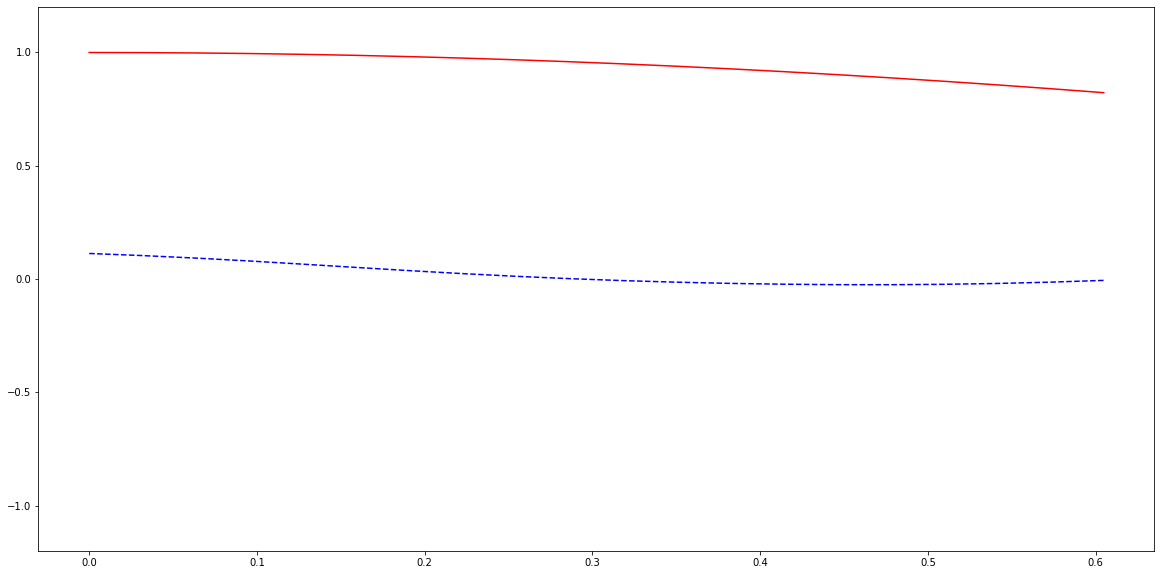

time cost: 0.5126373


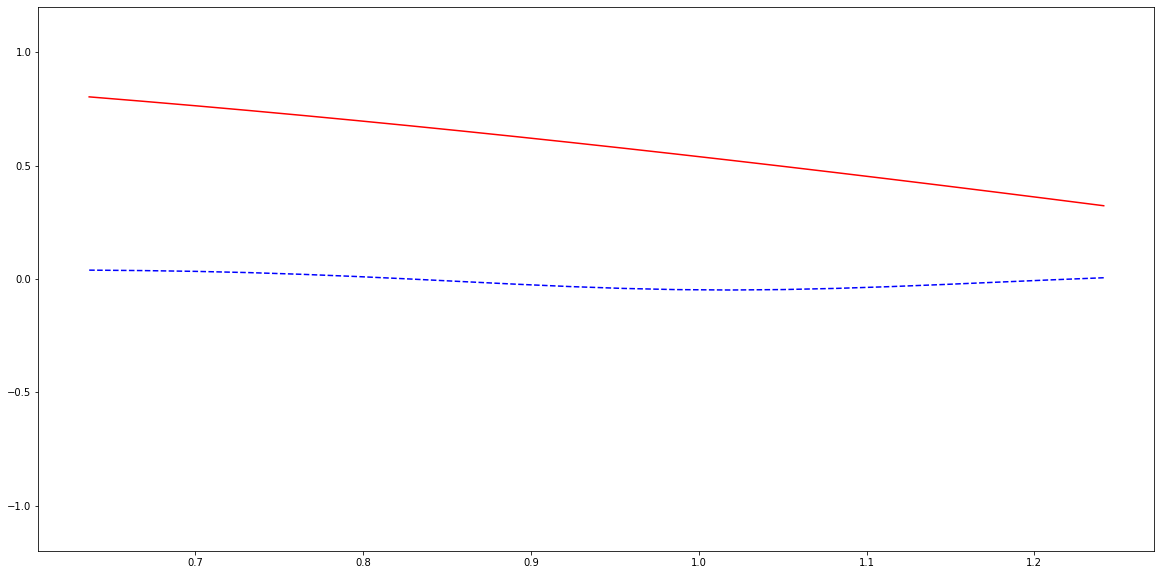

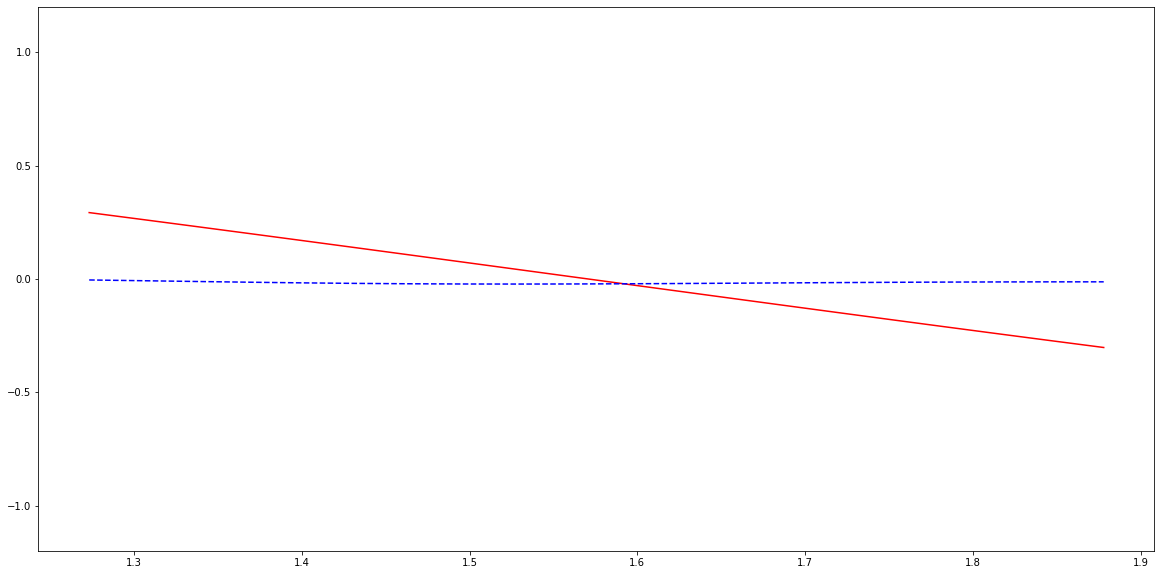

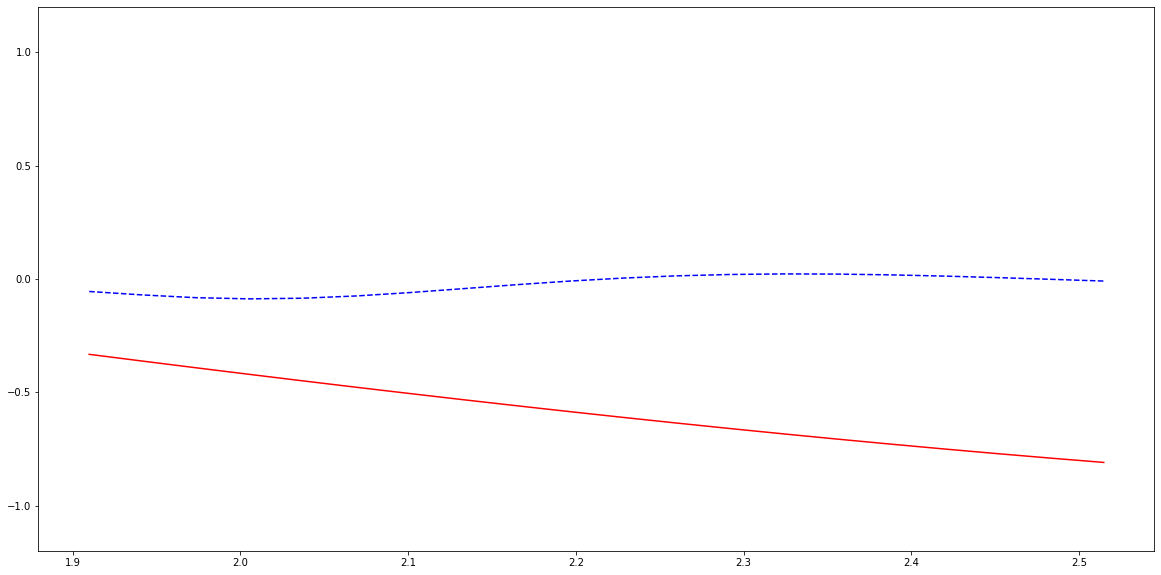

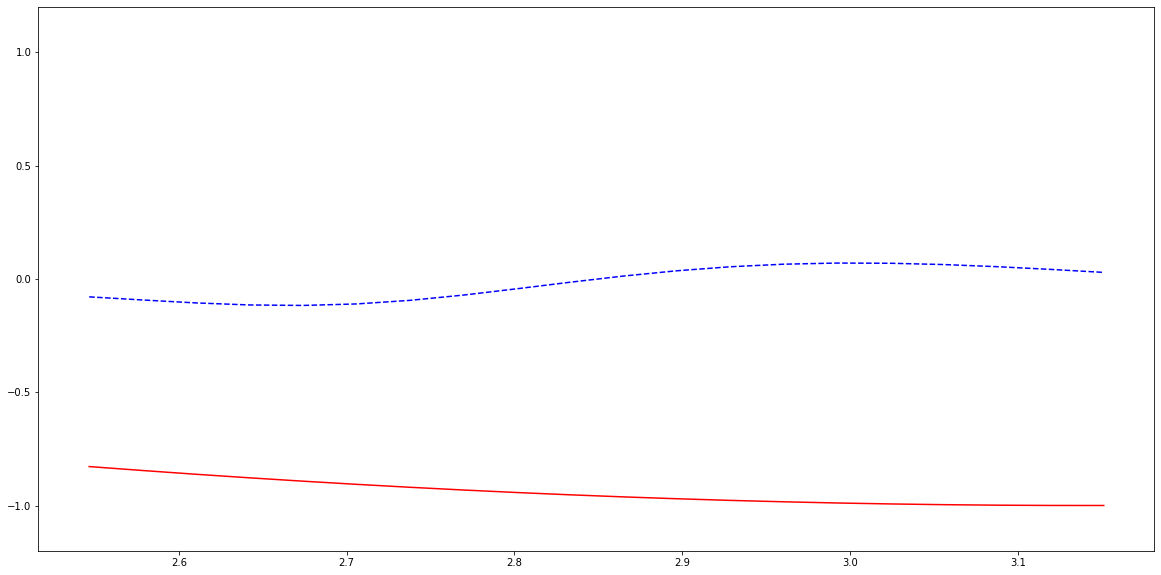

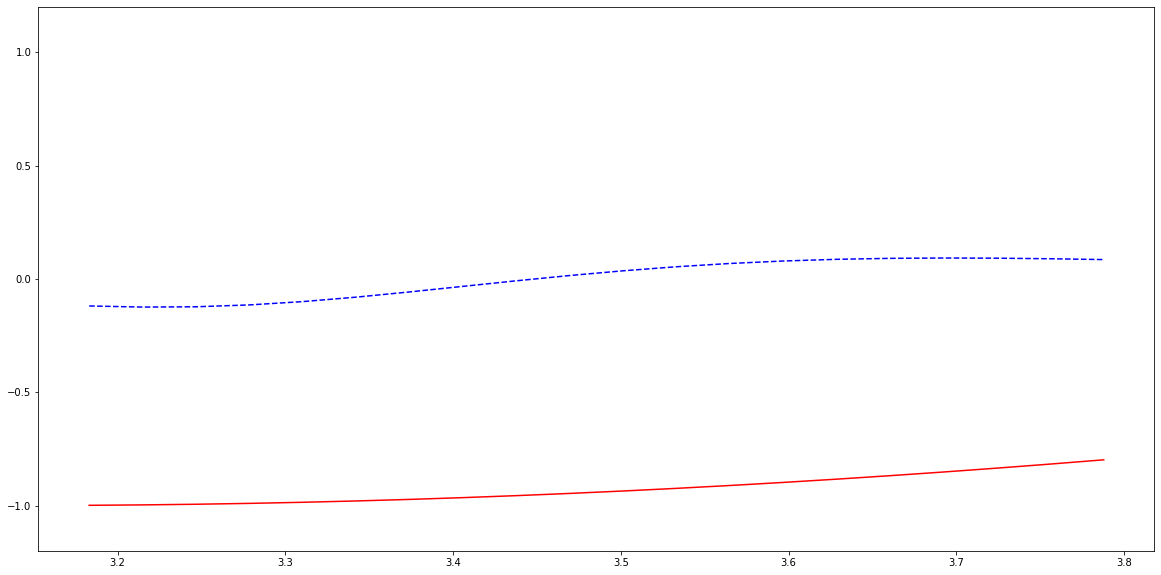

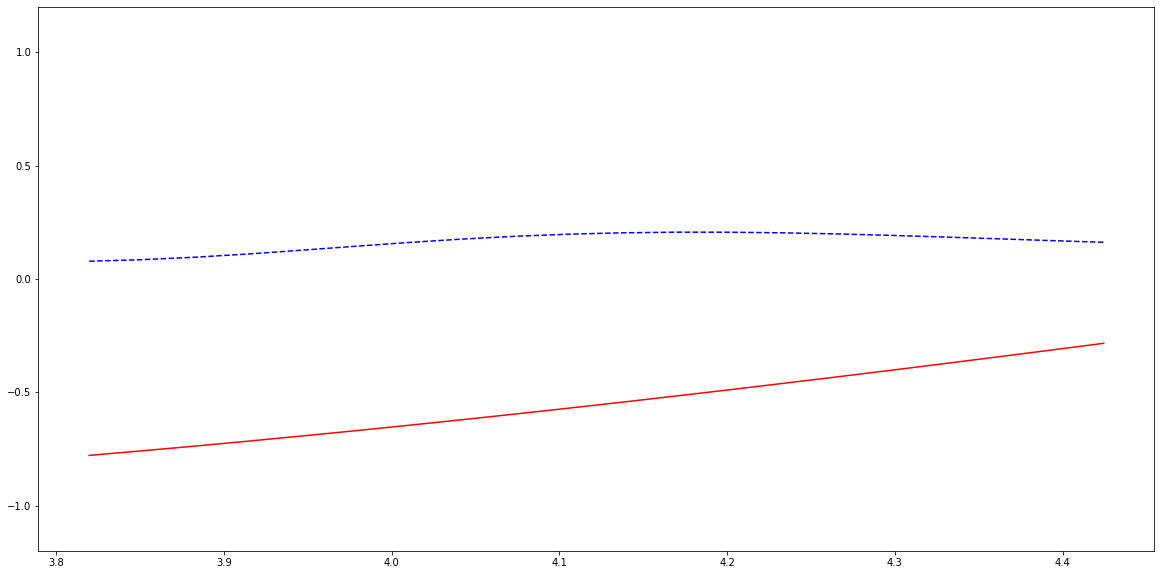

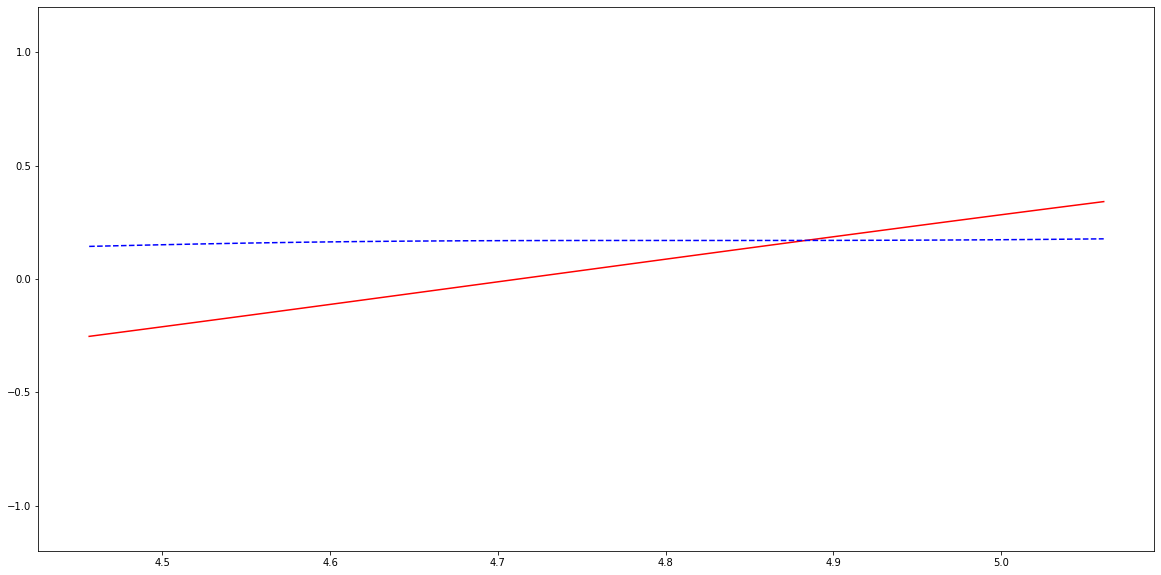

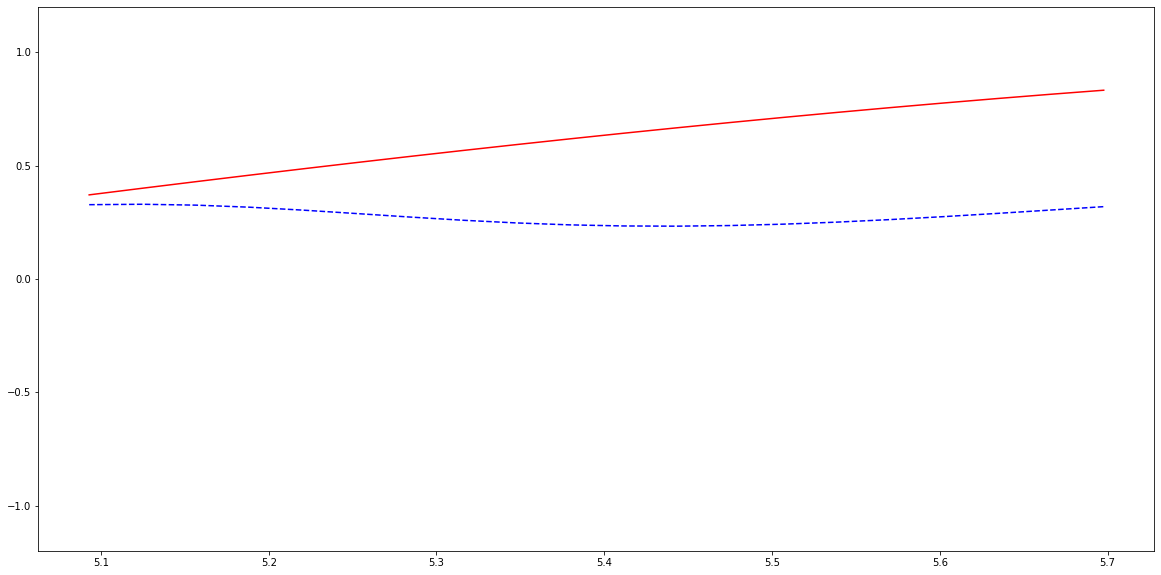

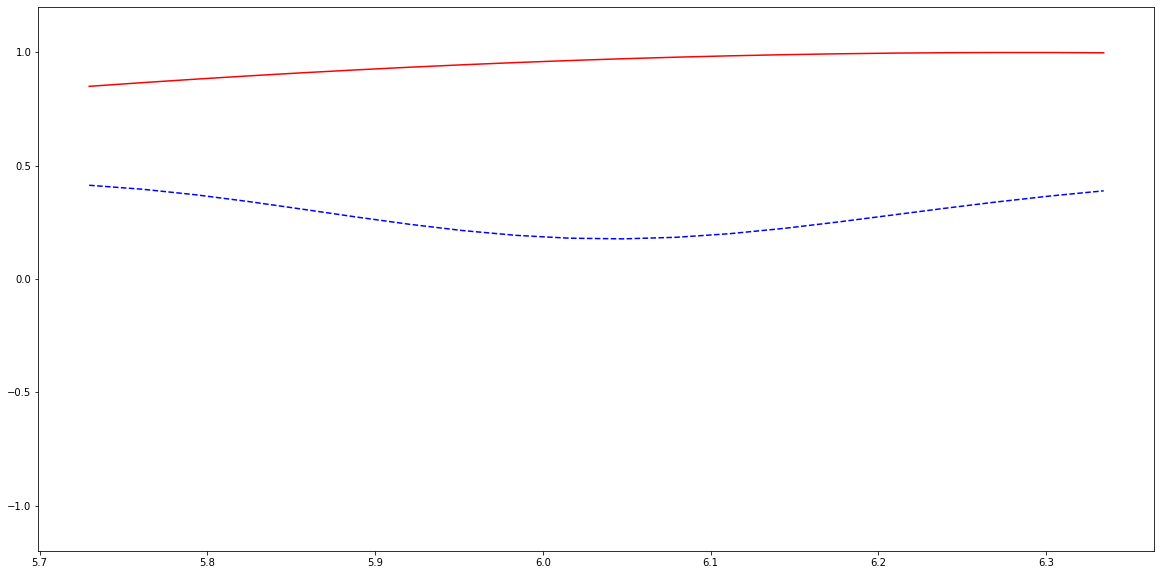

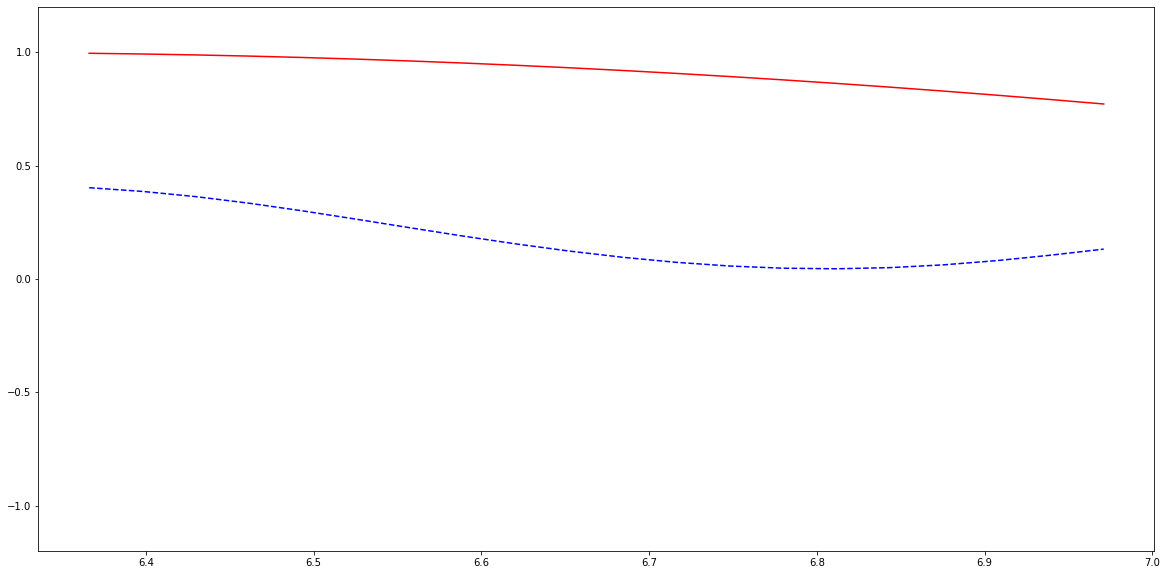

time cost: 0.2577091


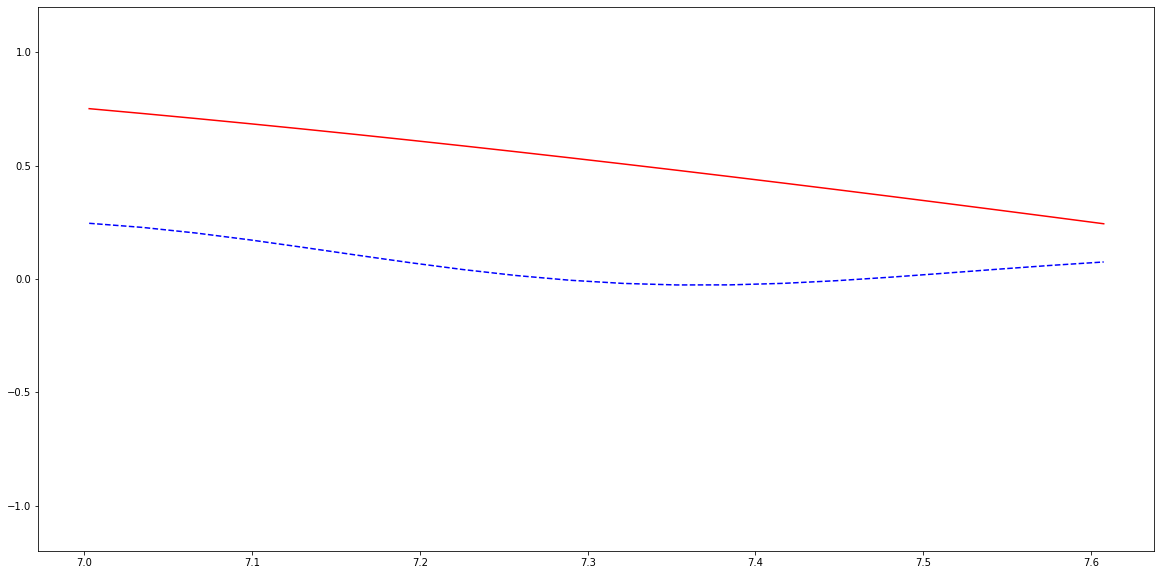

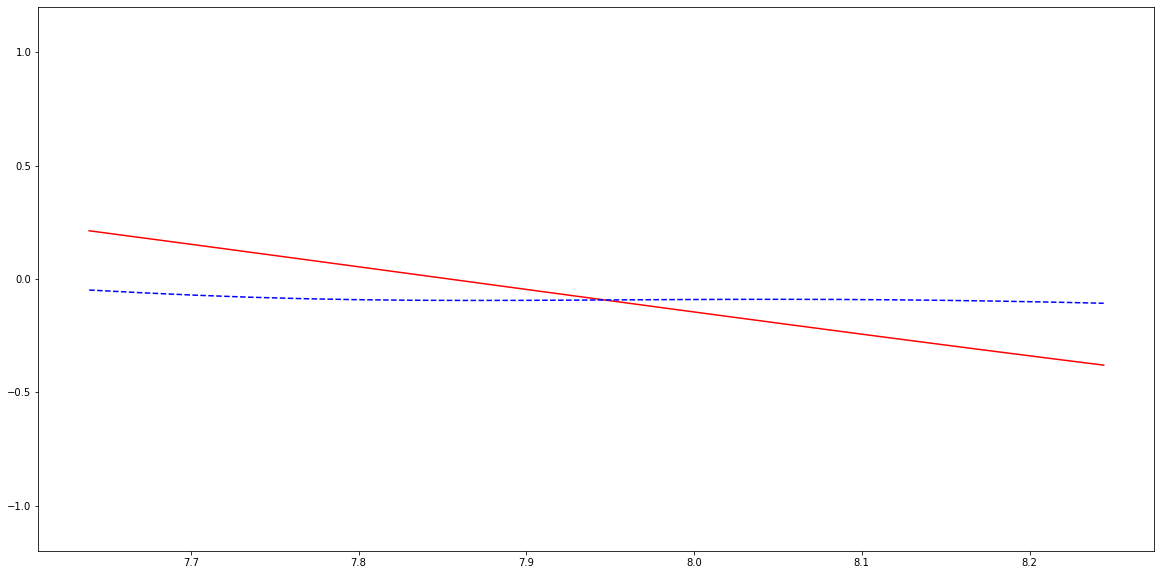

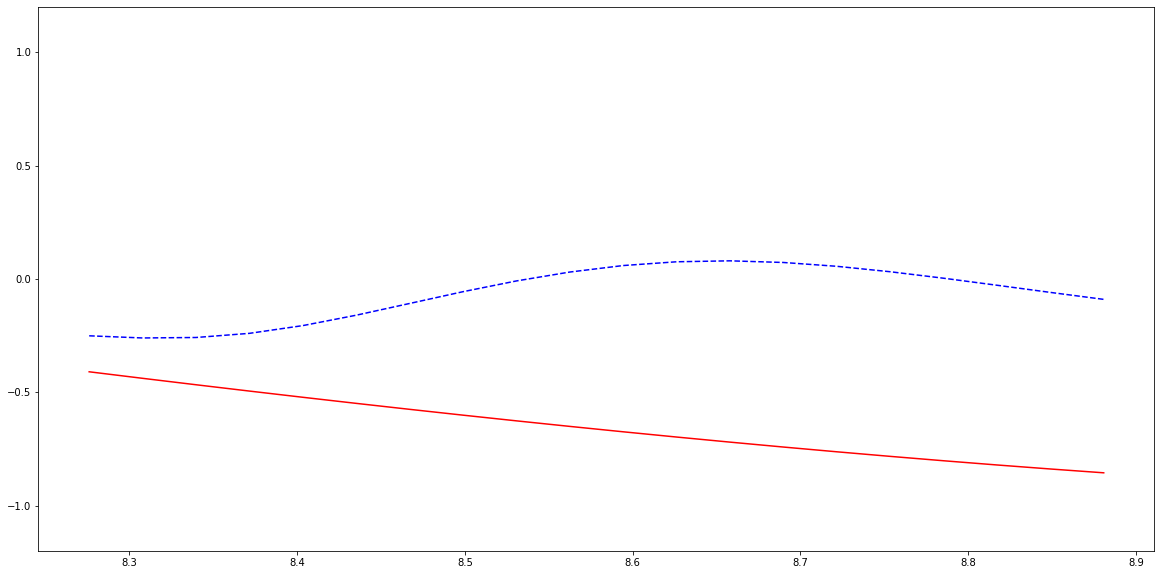

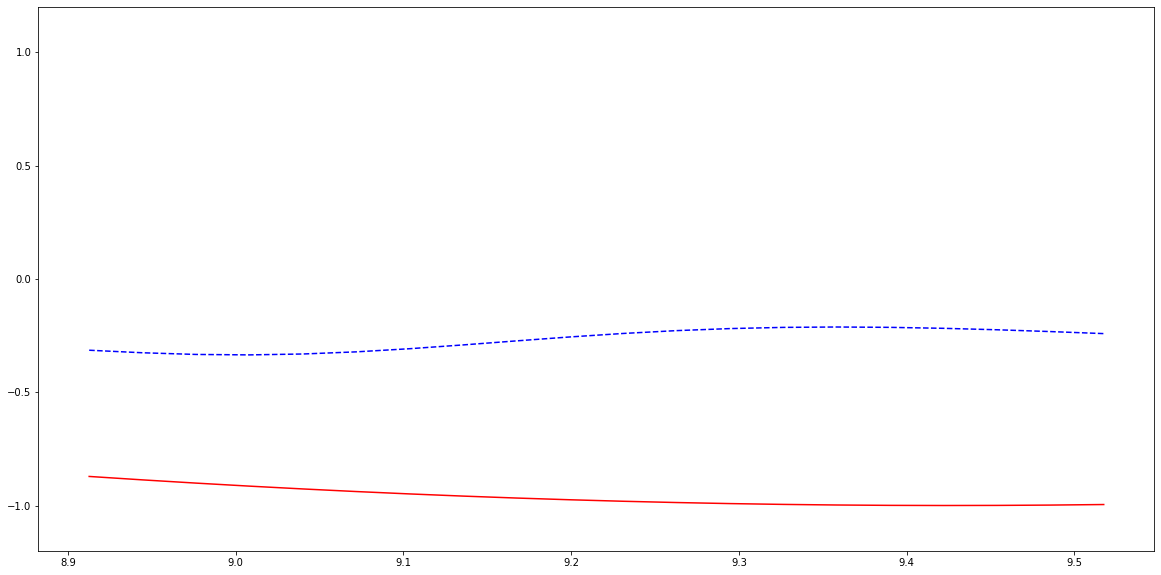

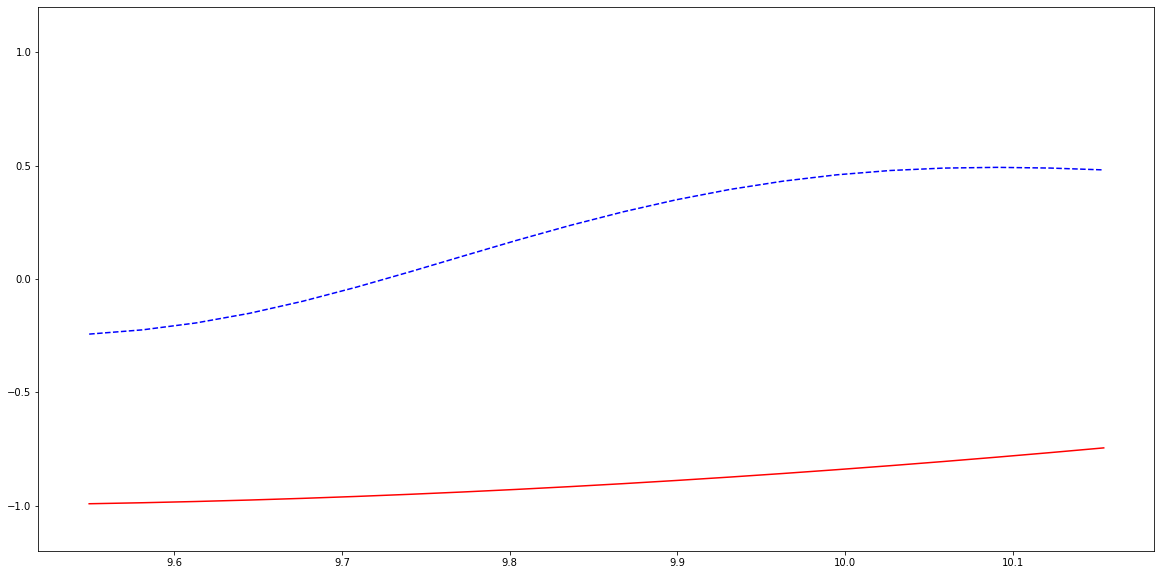

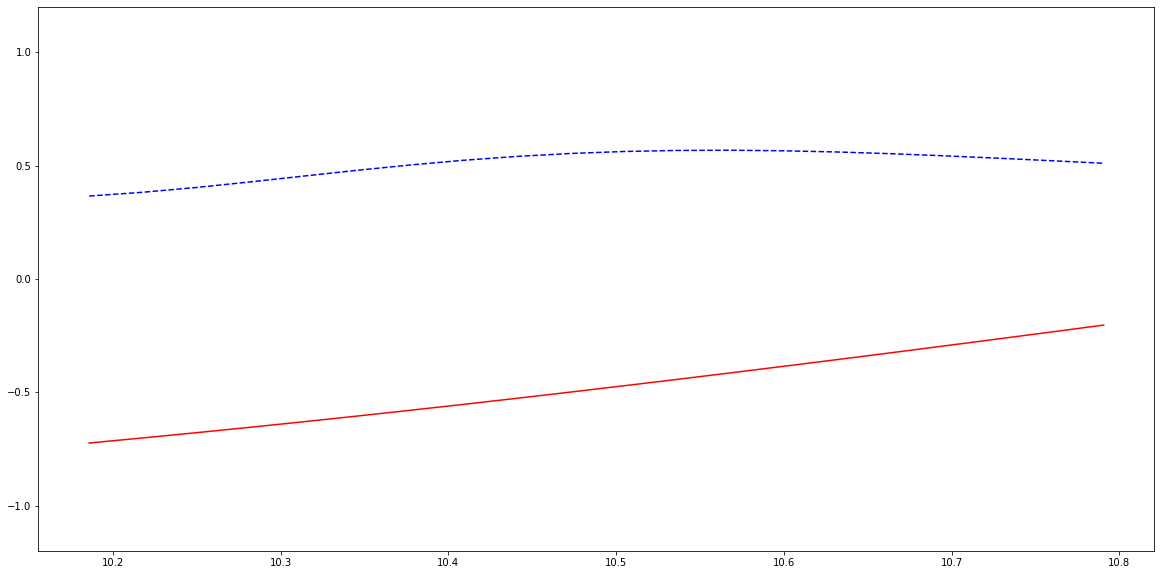

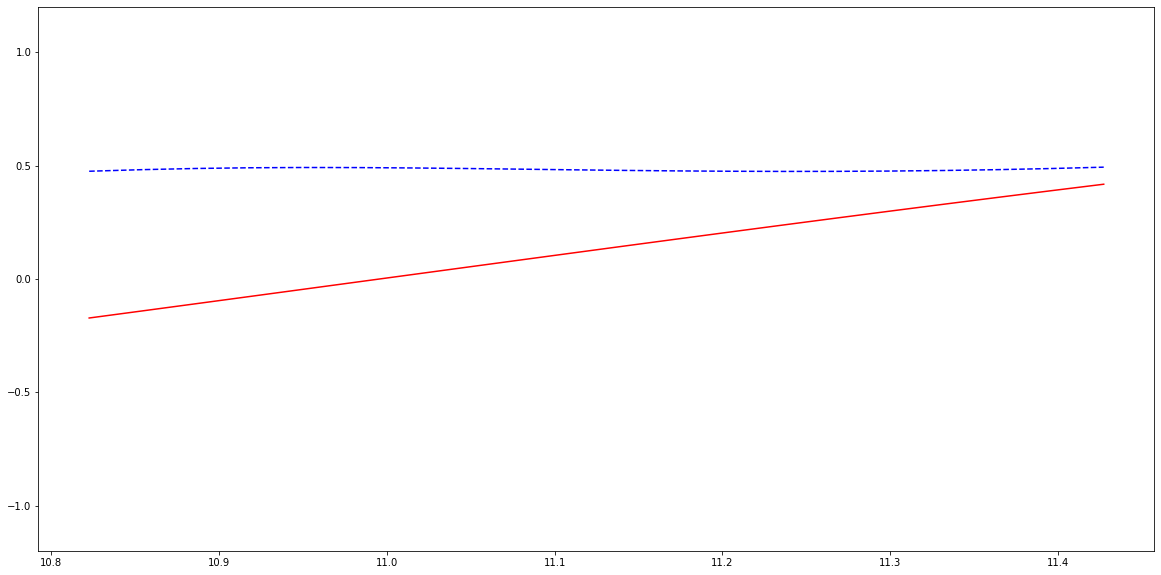

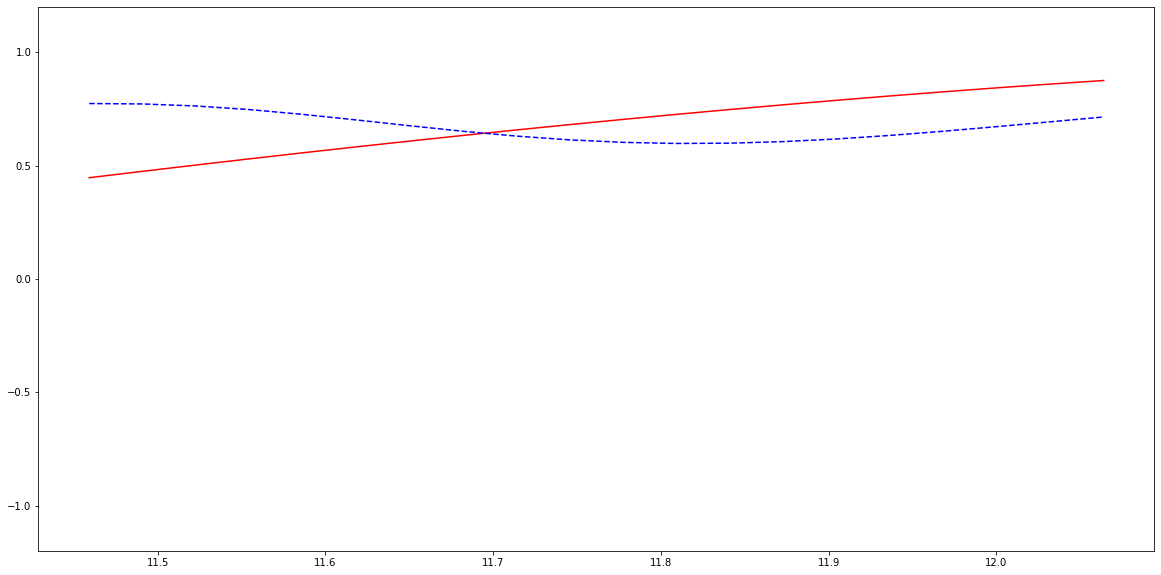

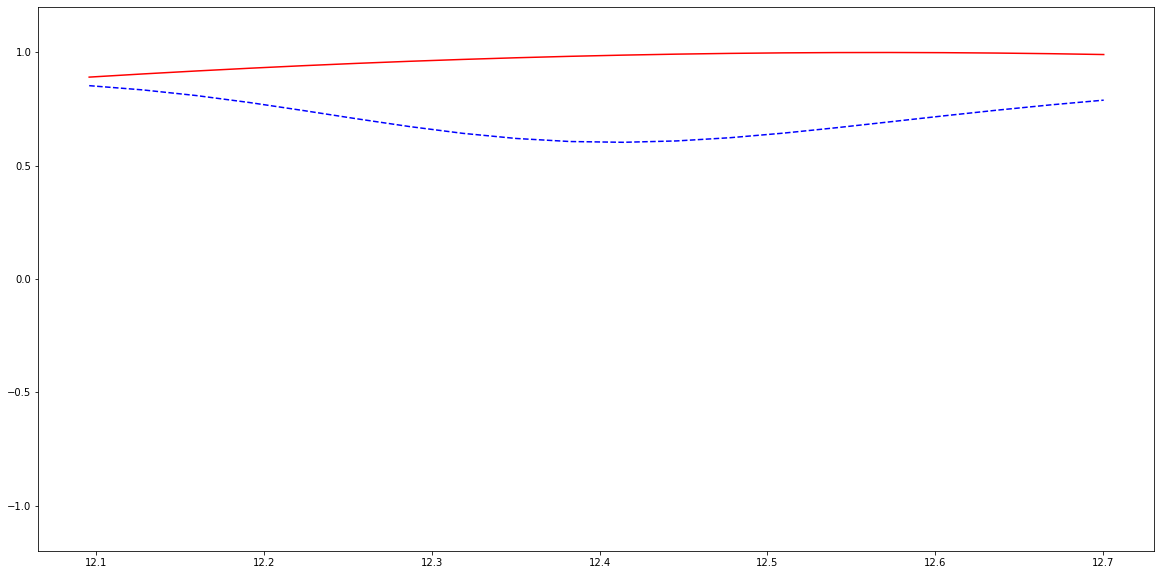

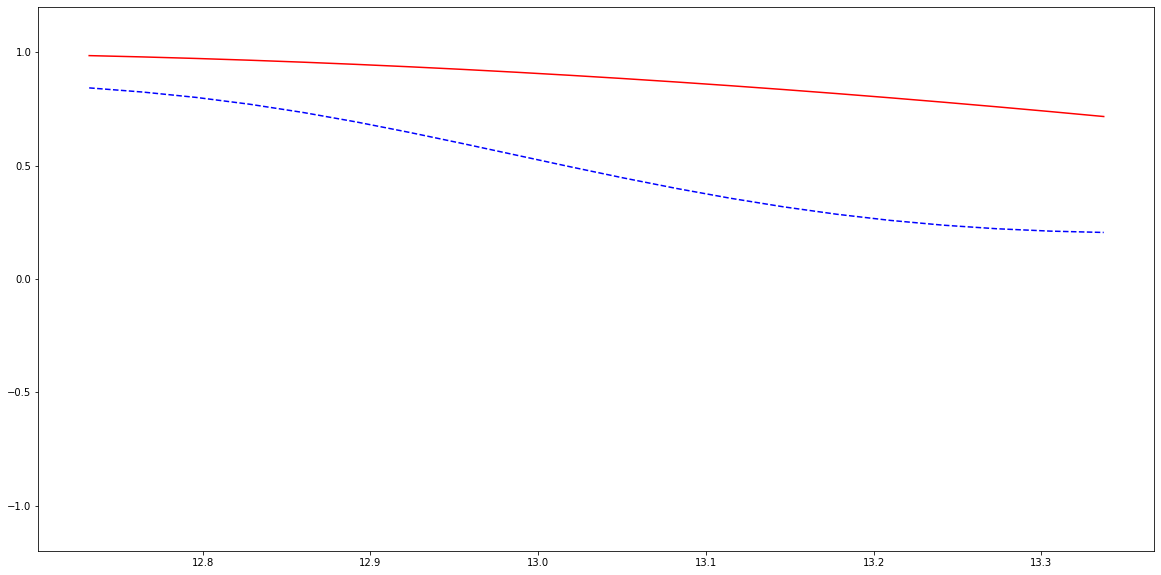

time cost: 0.09602754


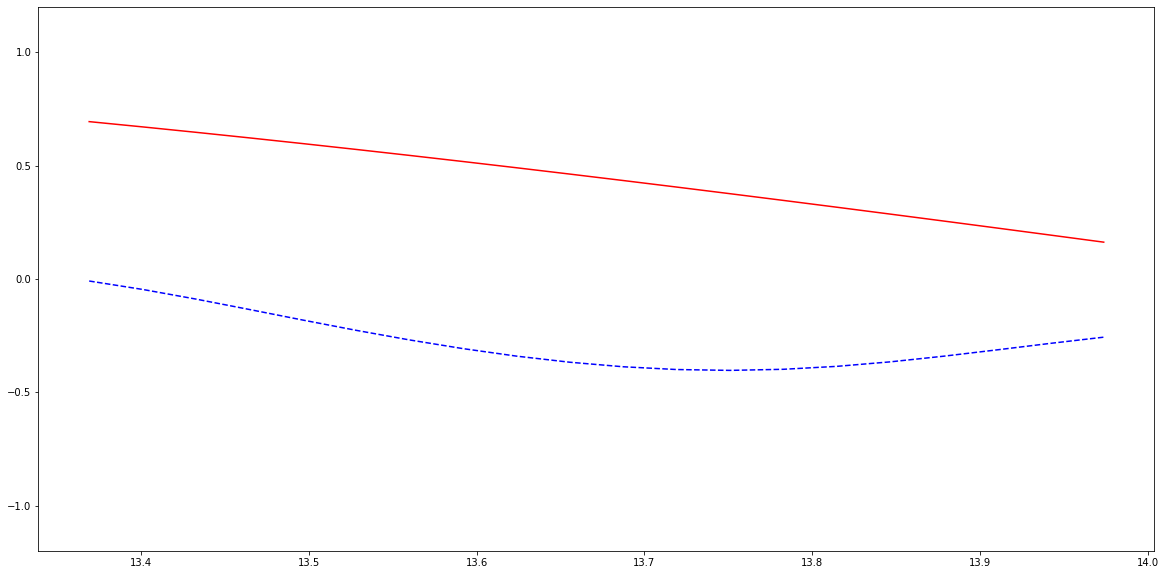

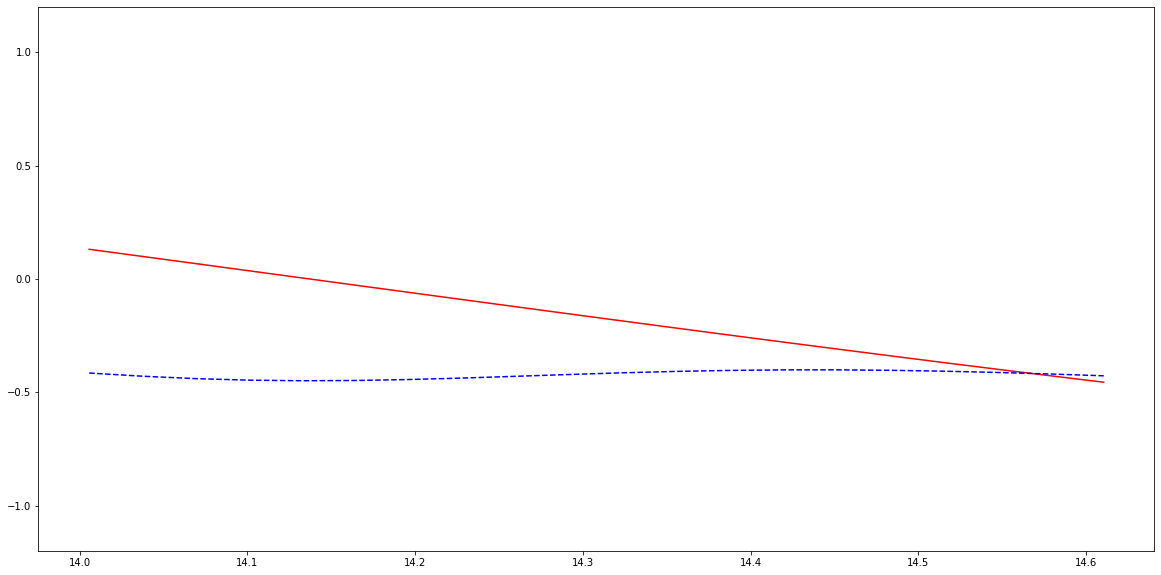

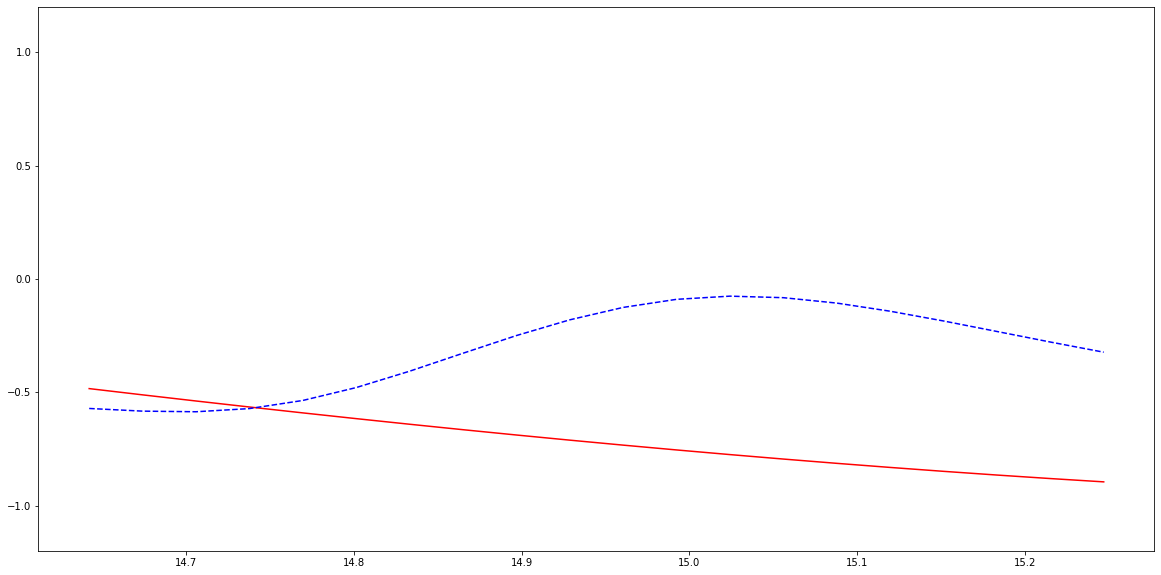

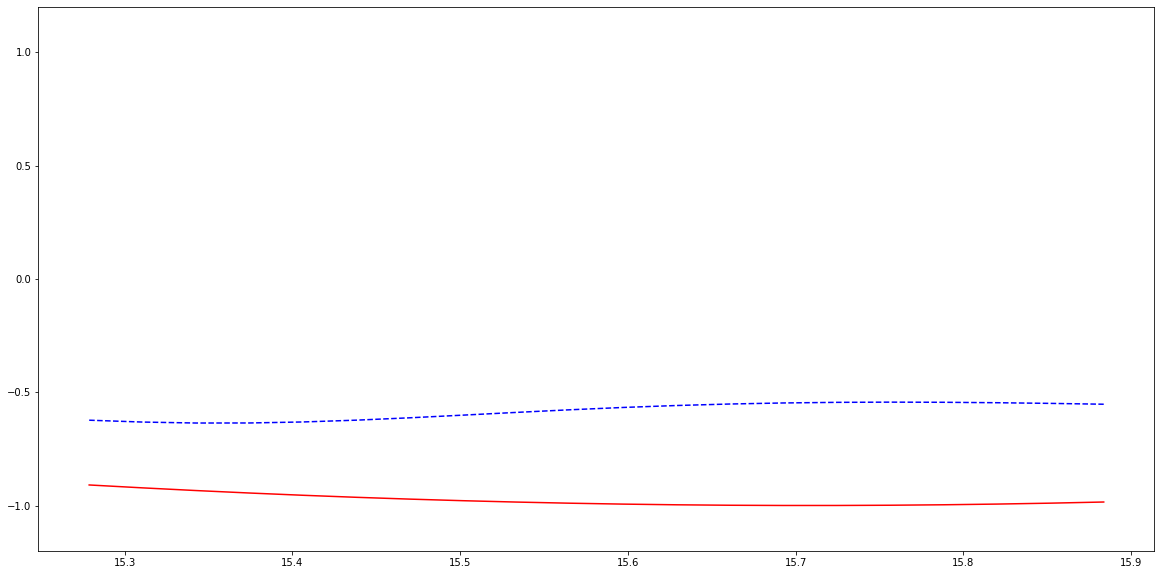

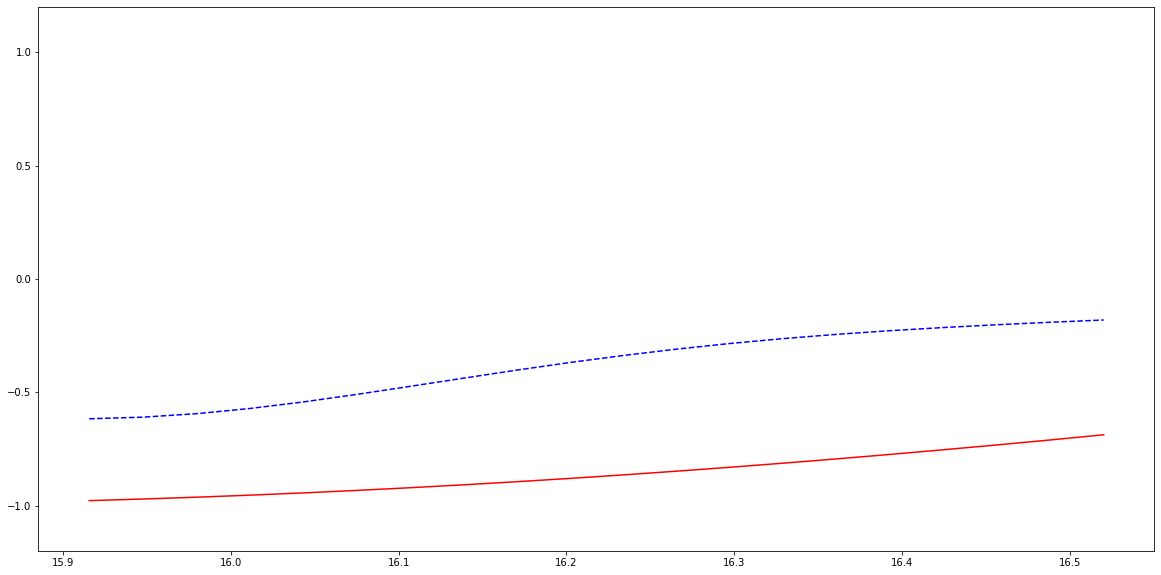

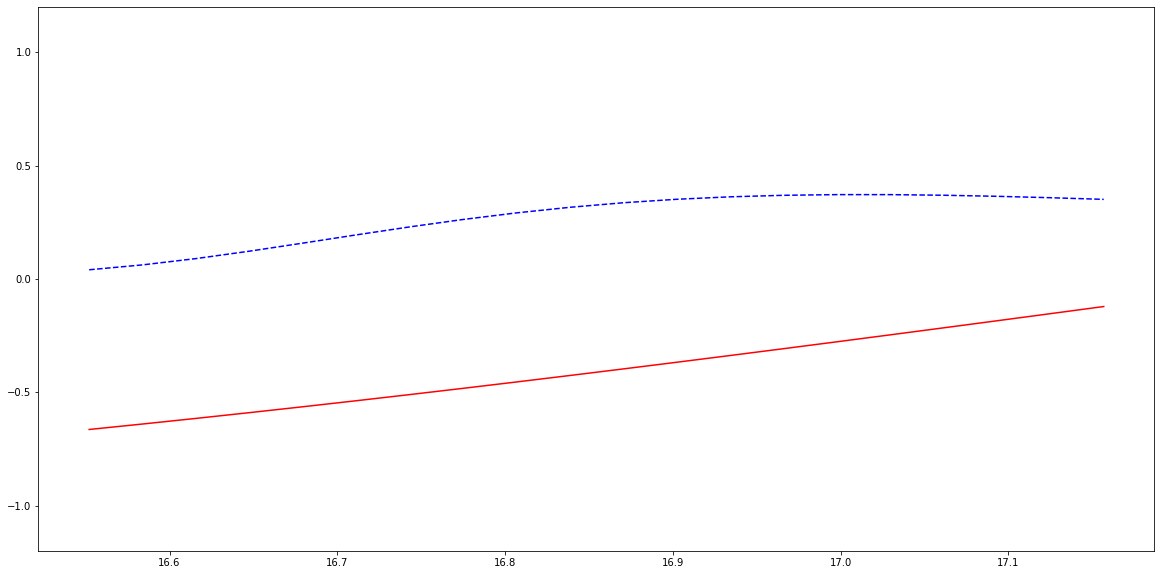

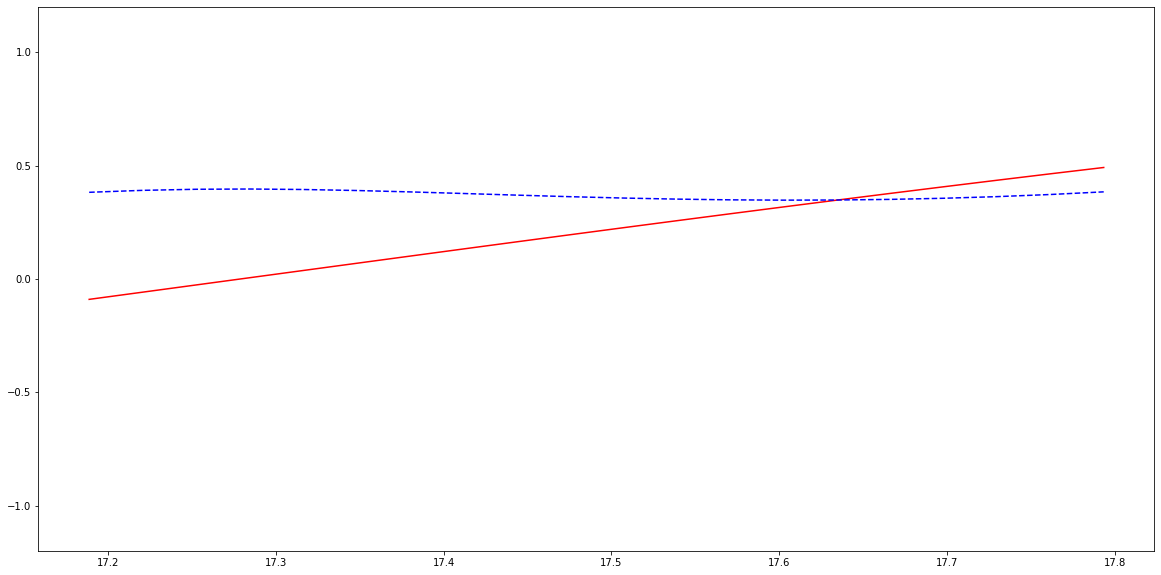

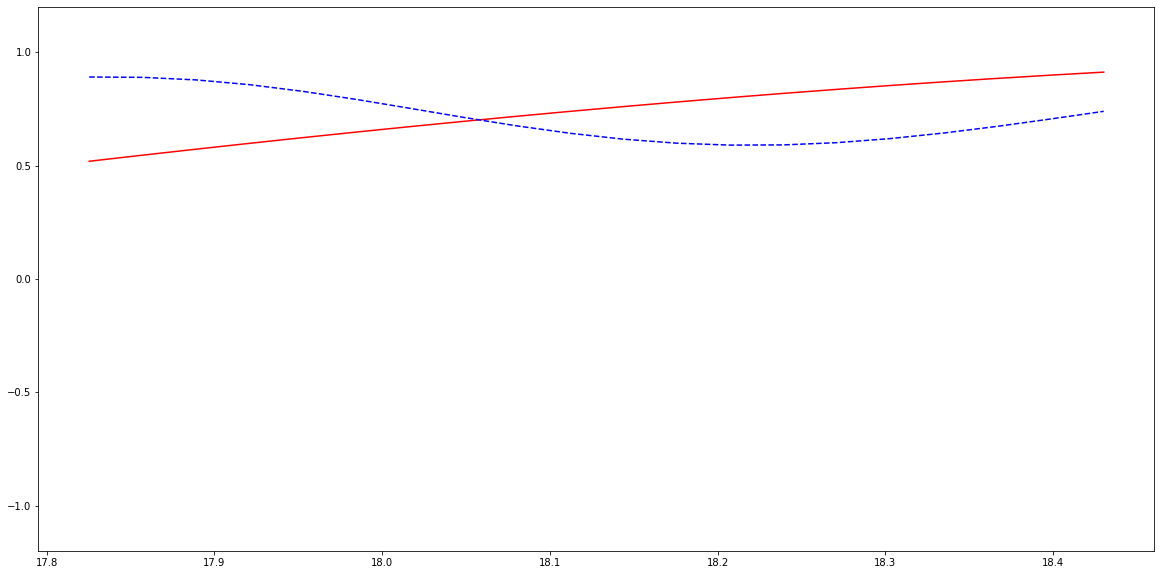

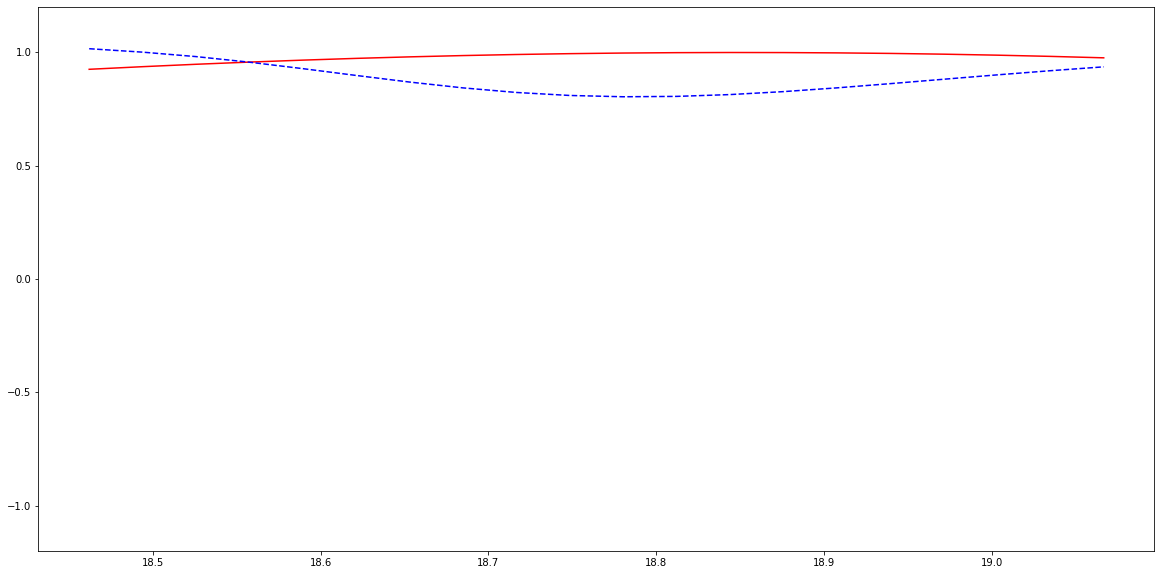

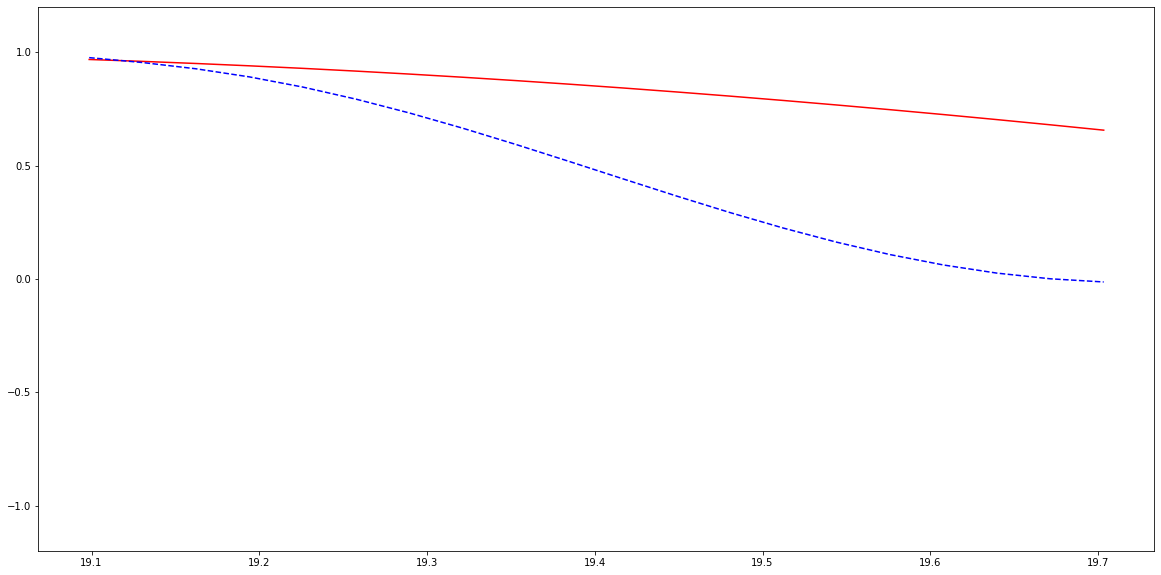

time cost: 0.06815899


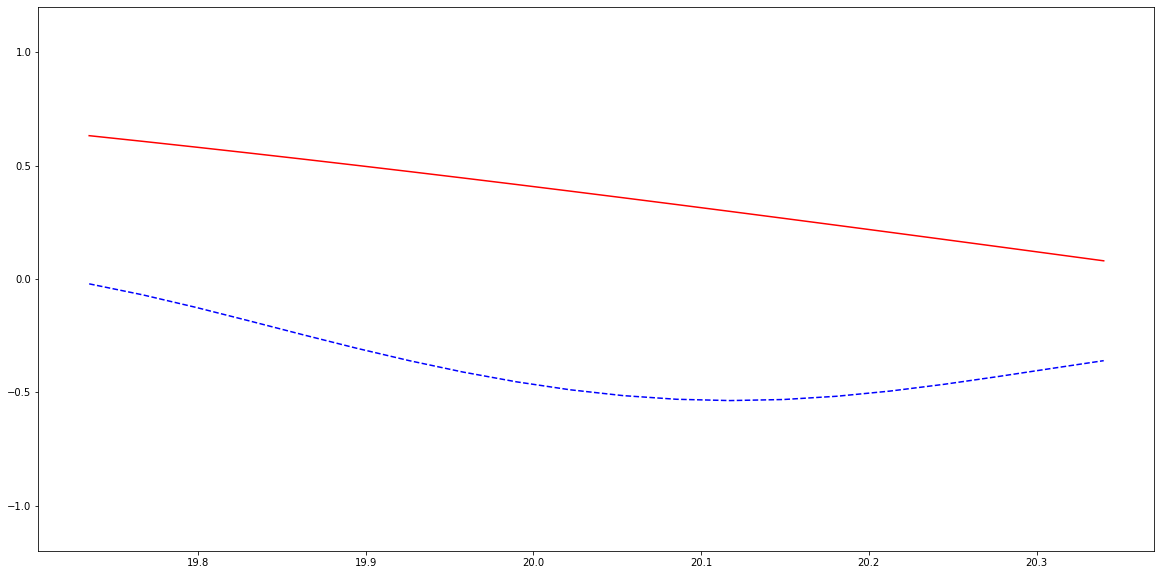

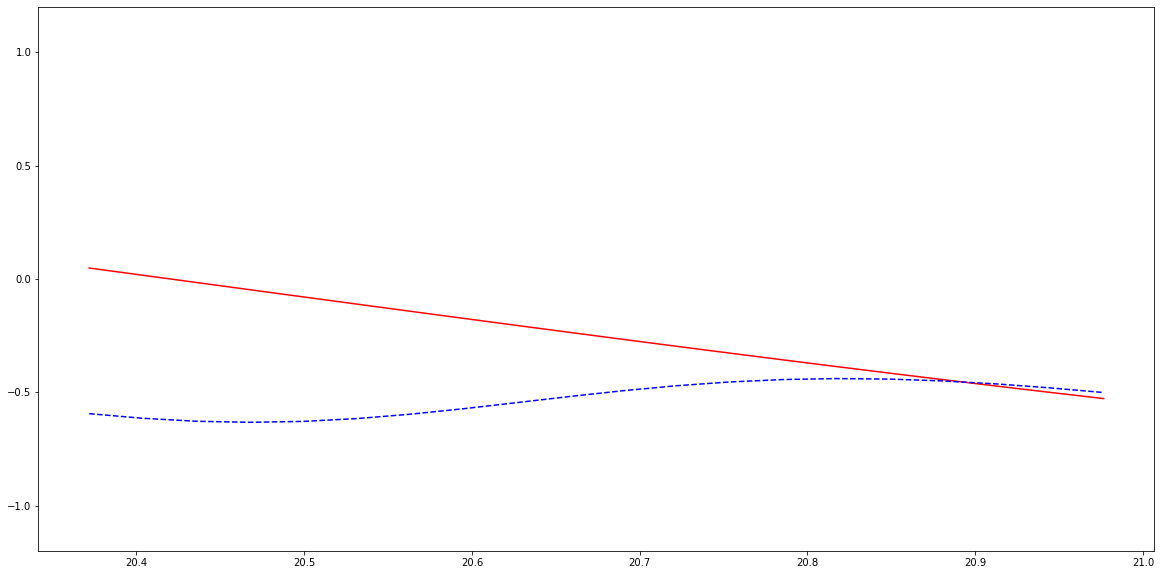

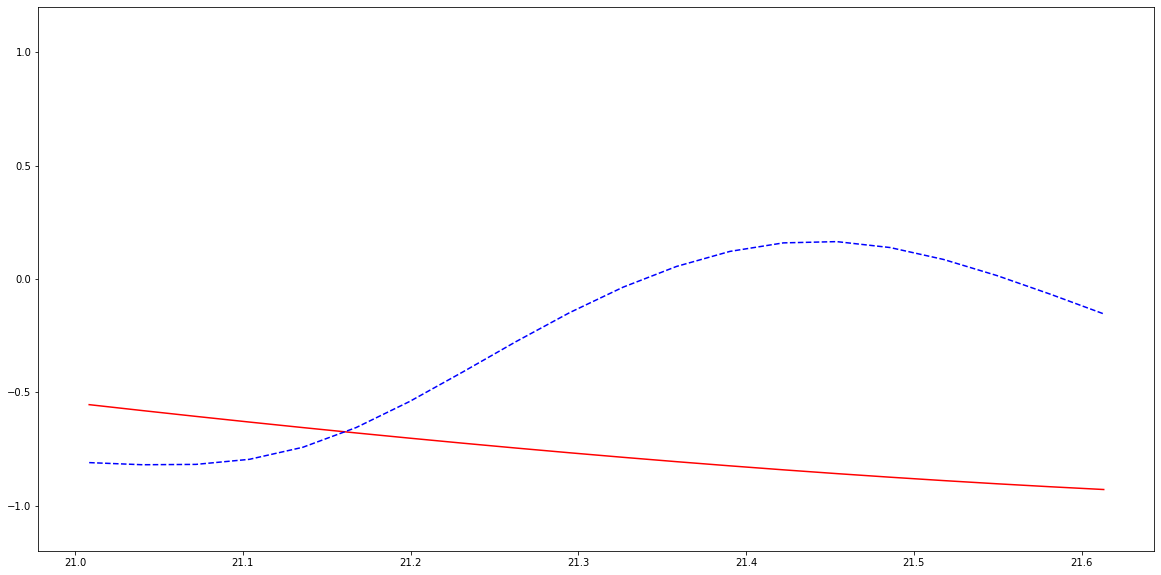

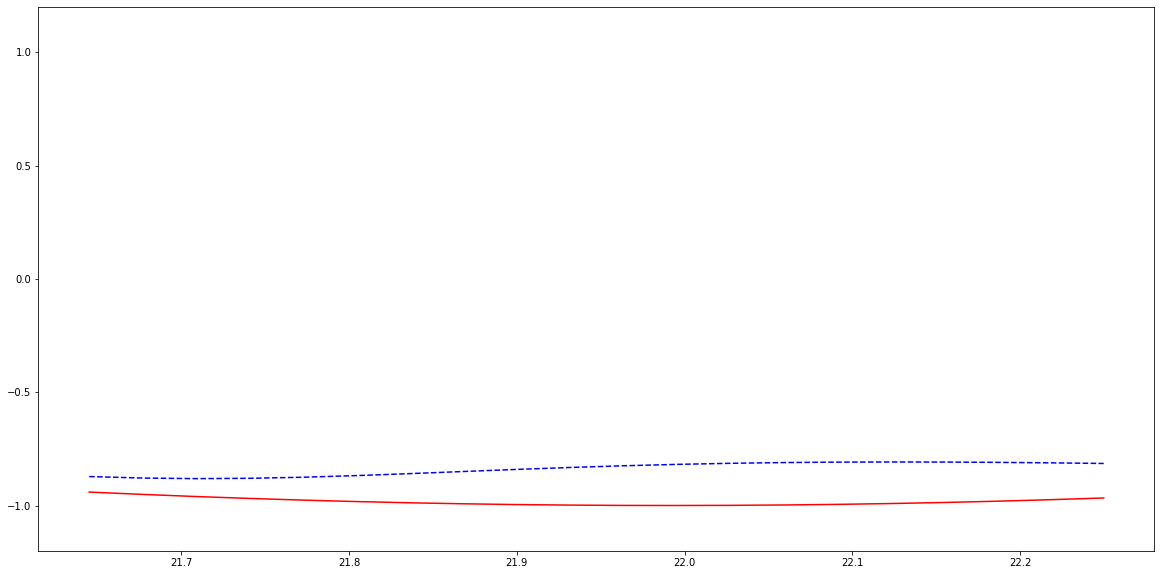

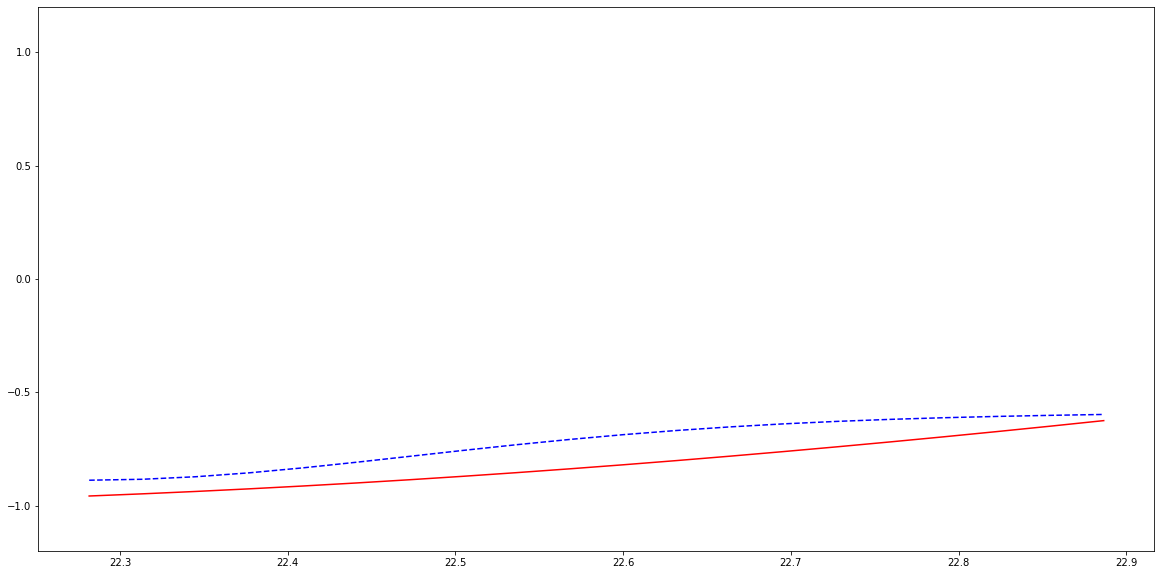

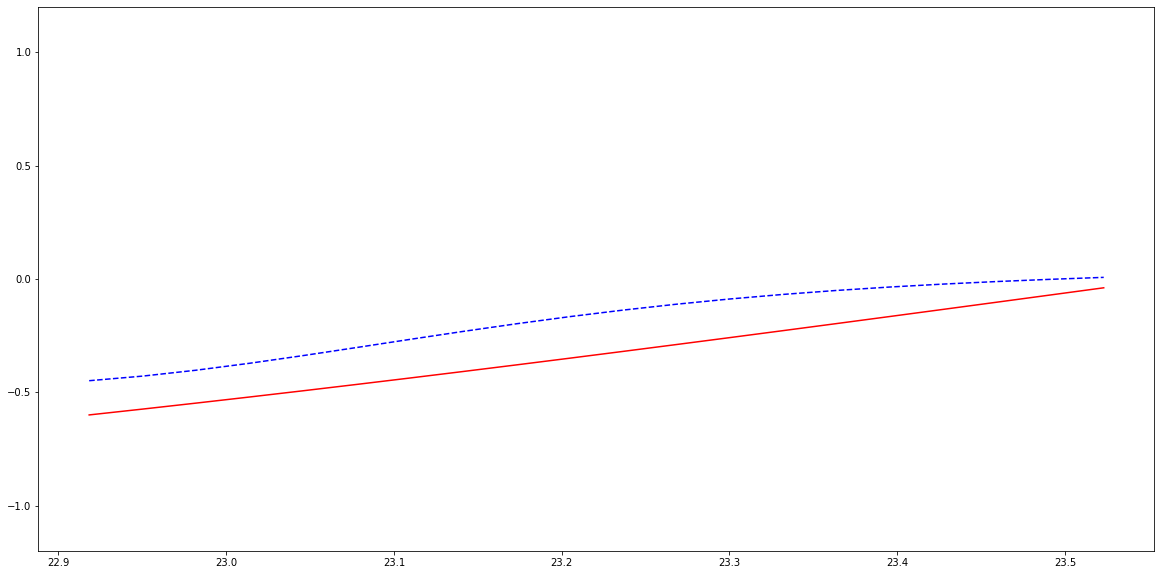

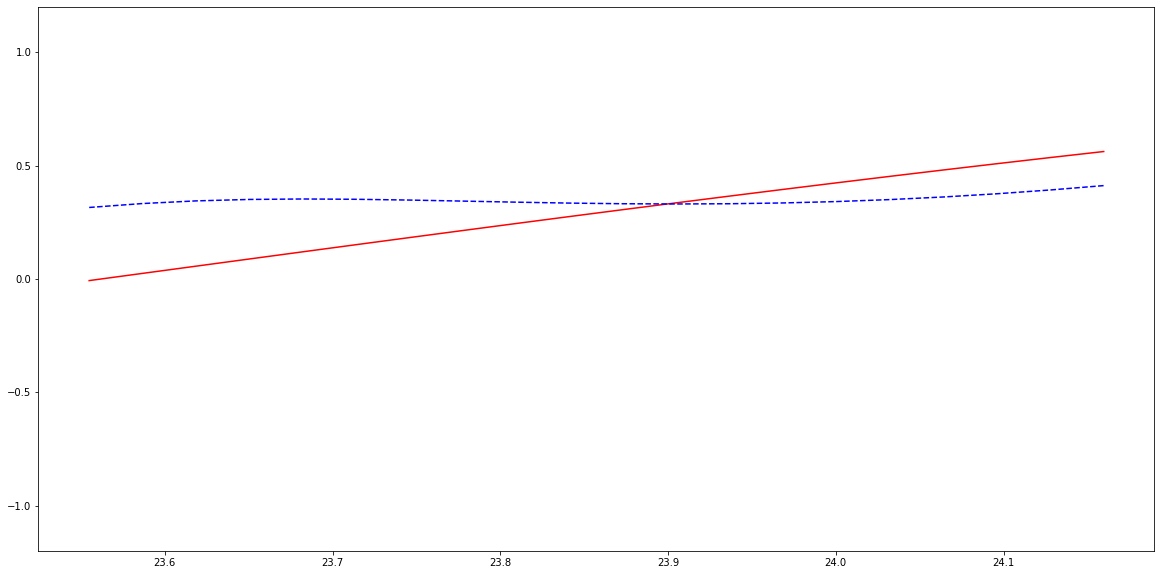

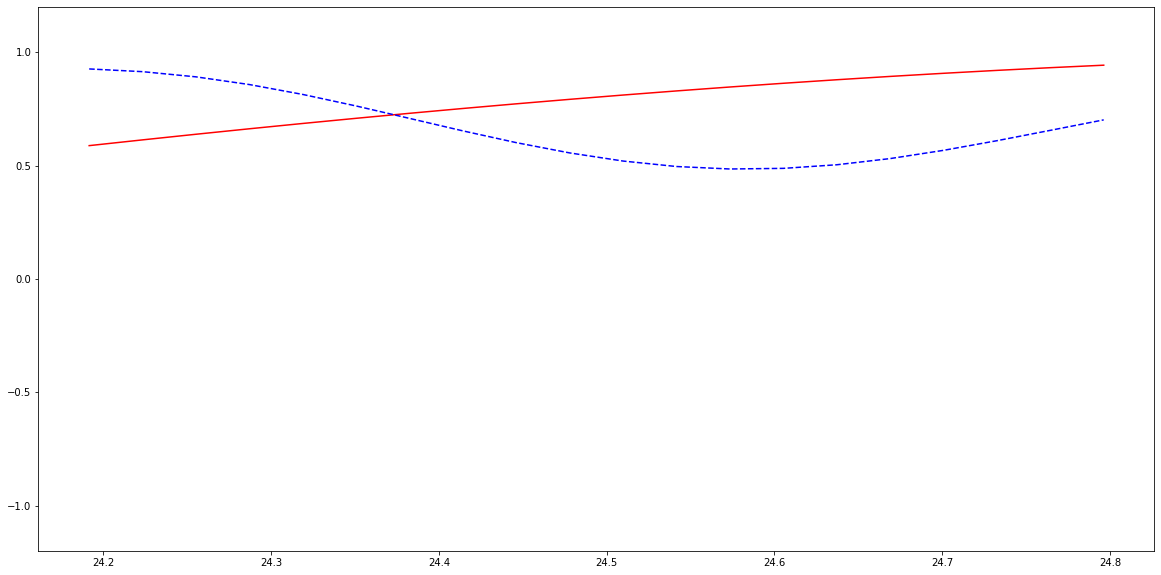

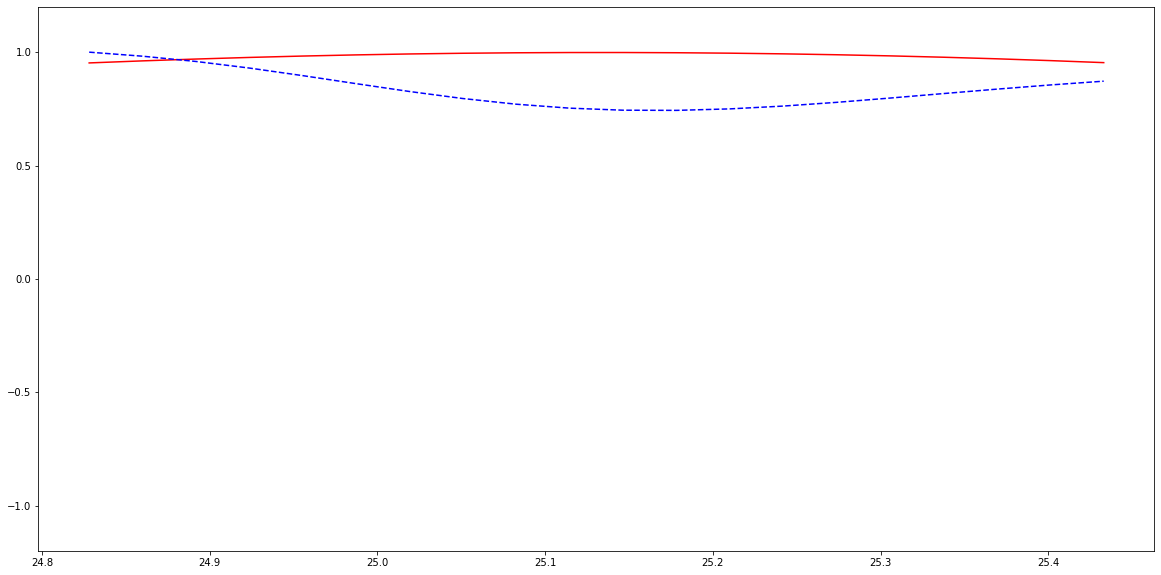

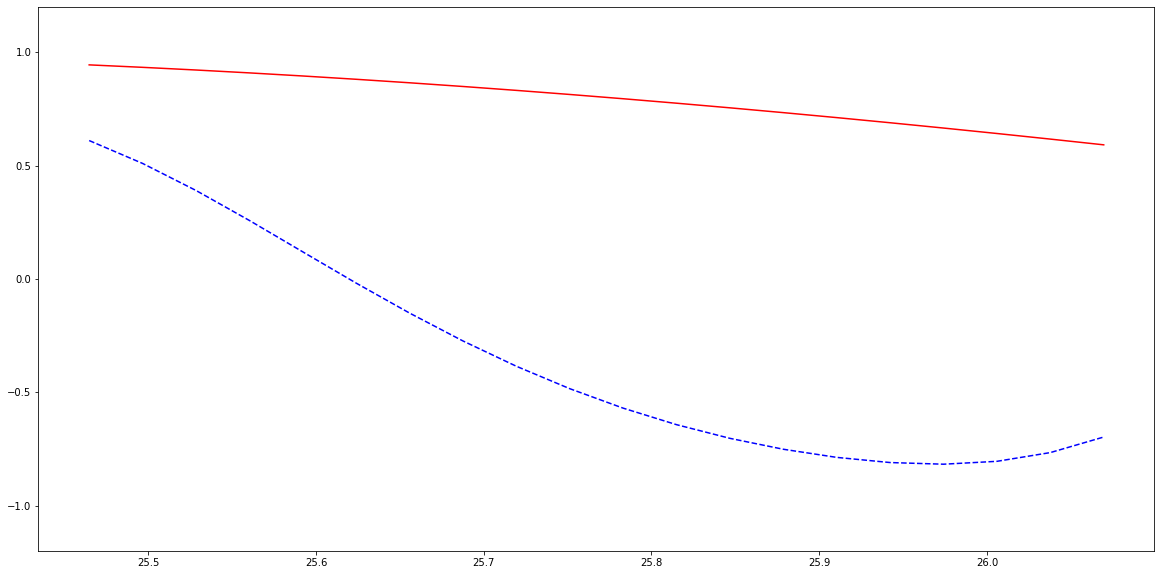

time cost: 0.054306842


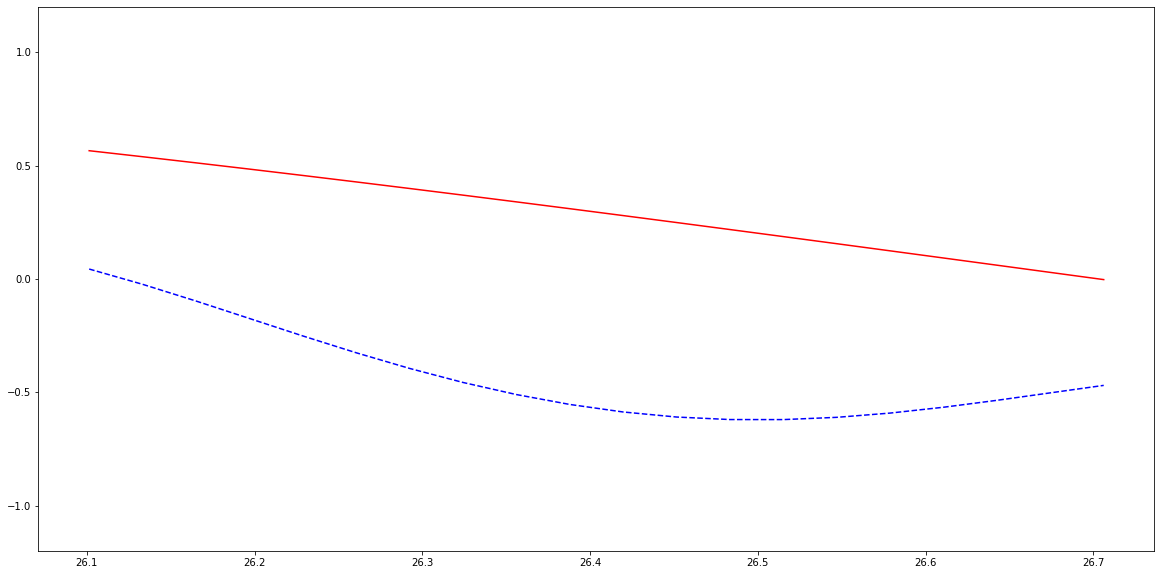

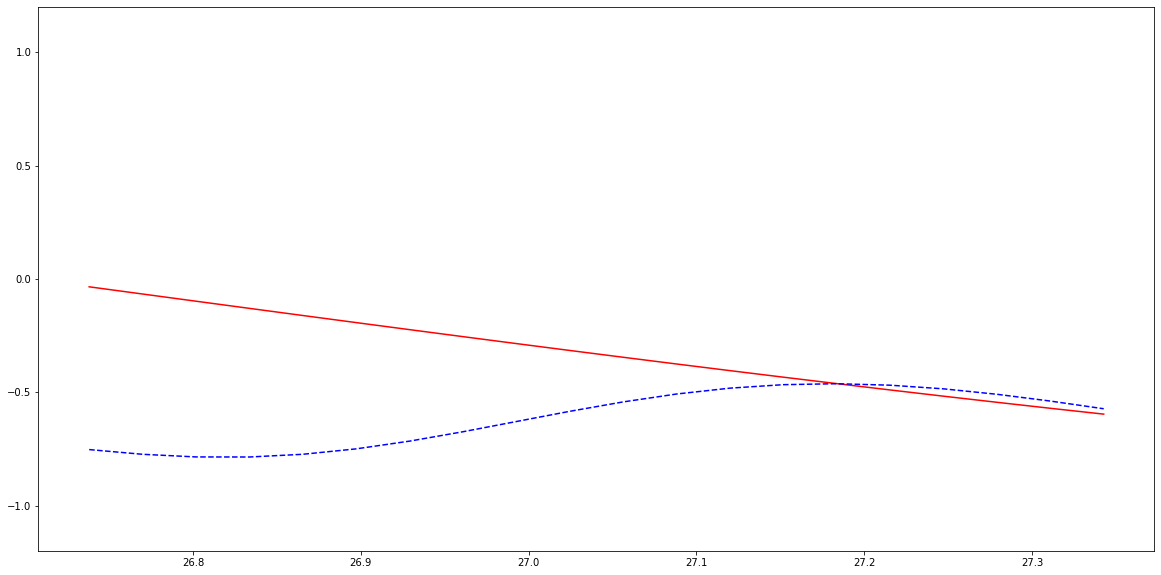

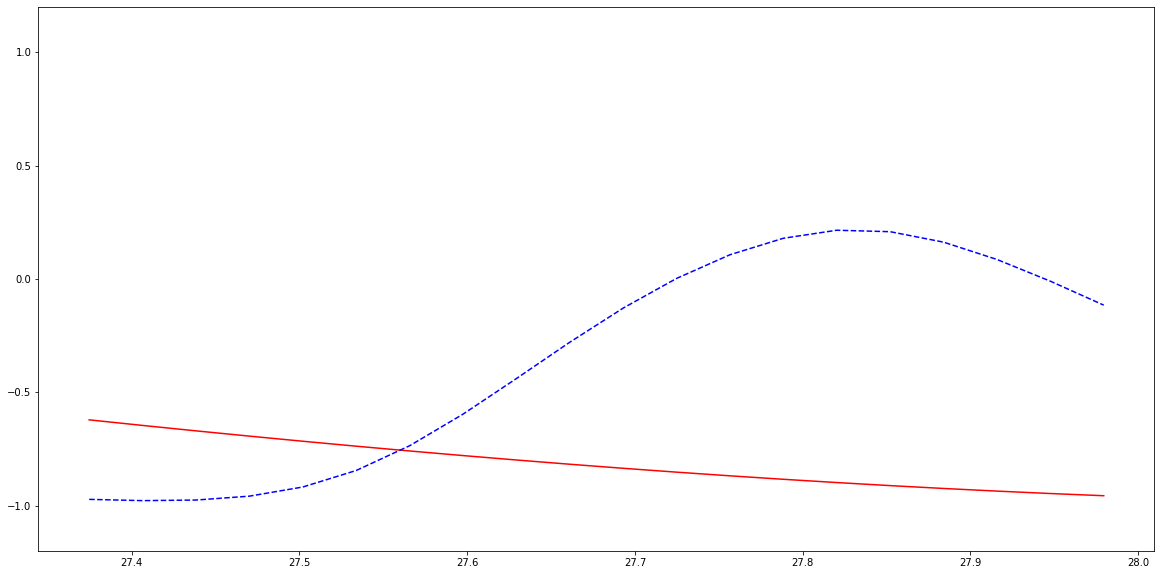

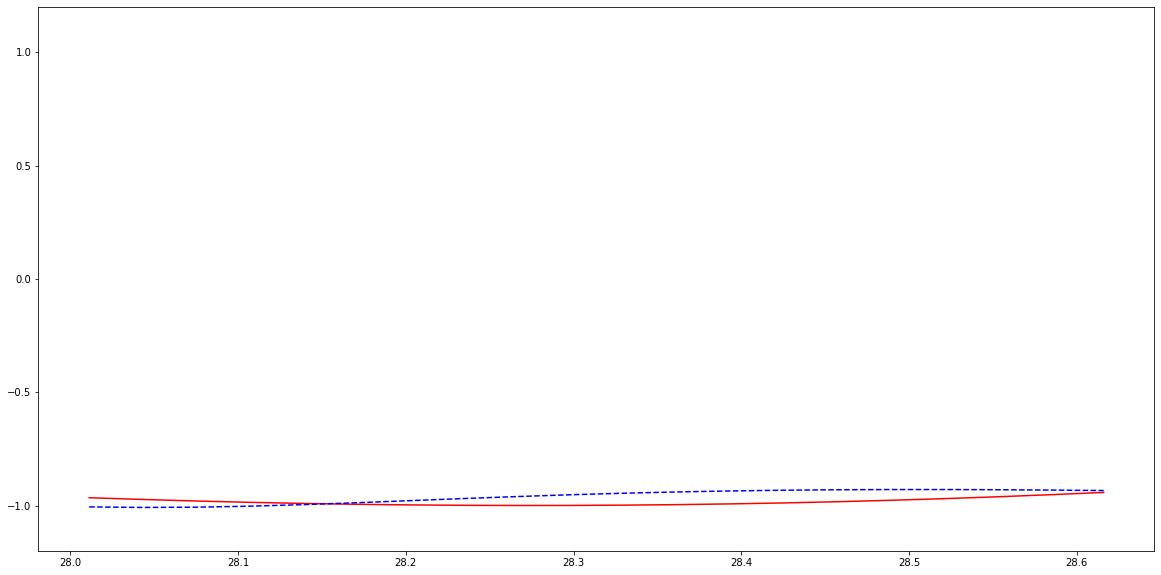

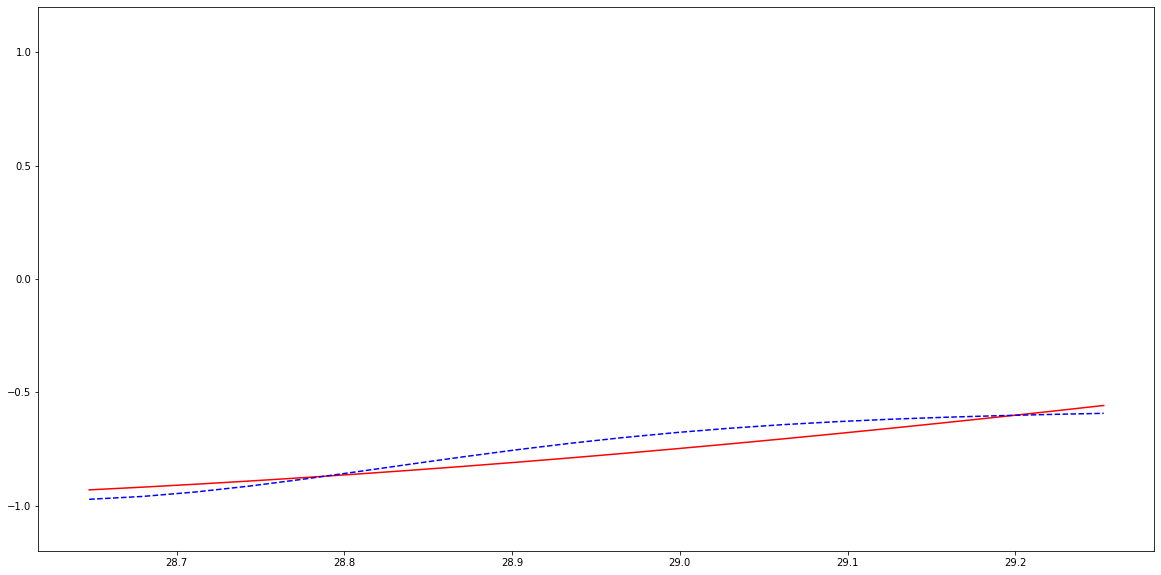

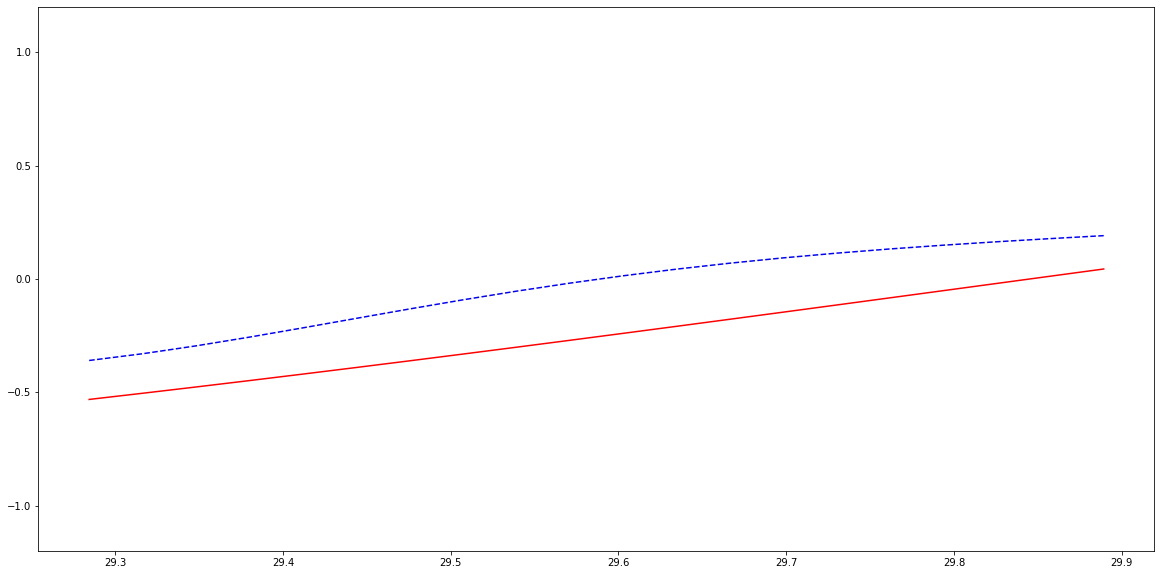

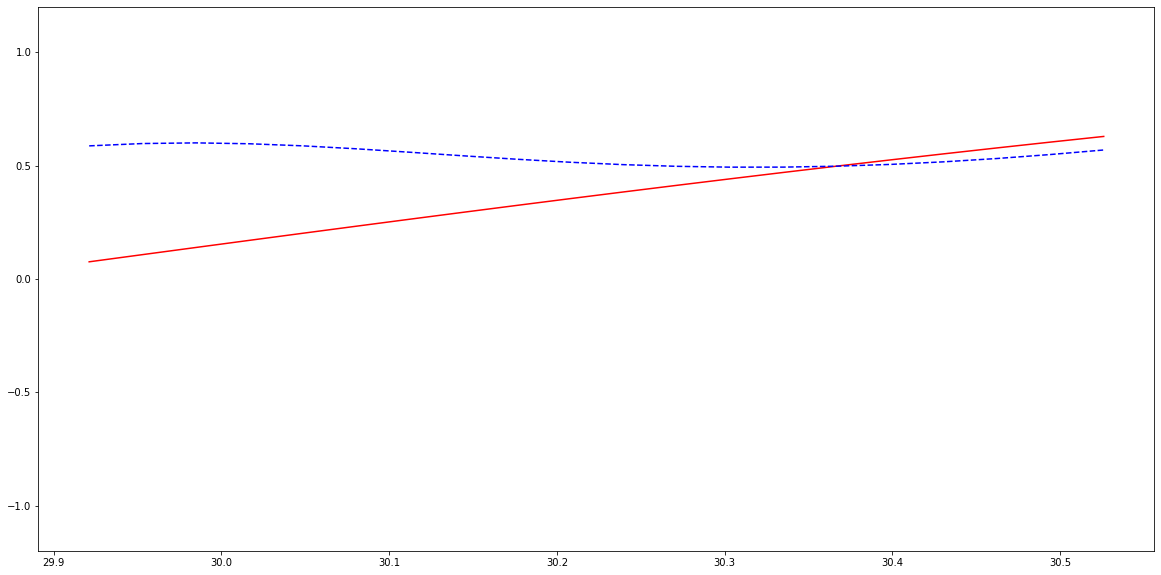

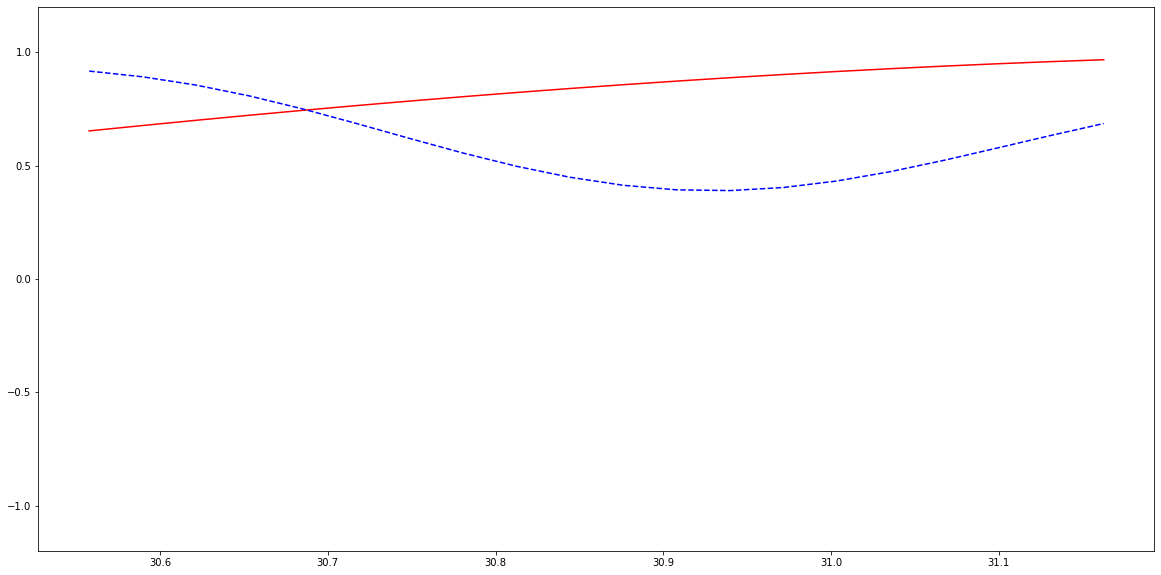

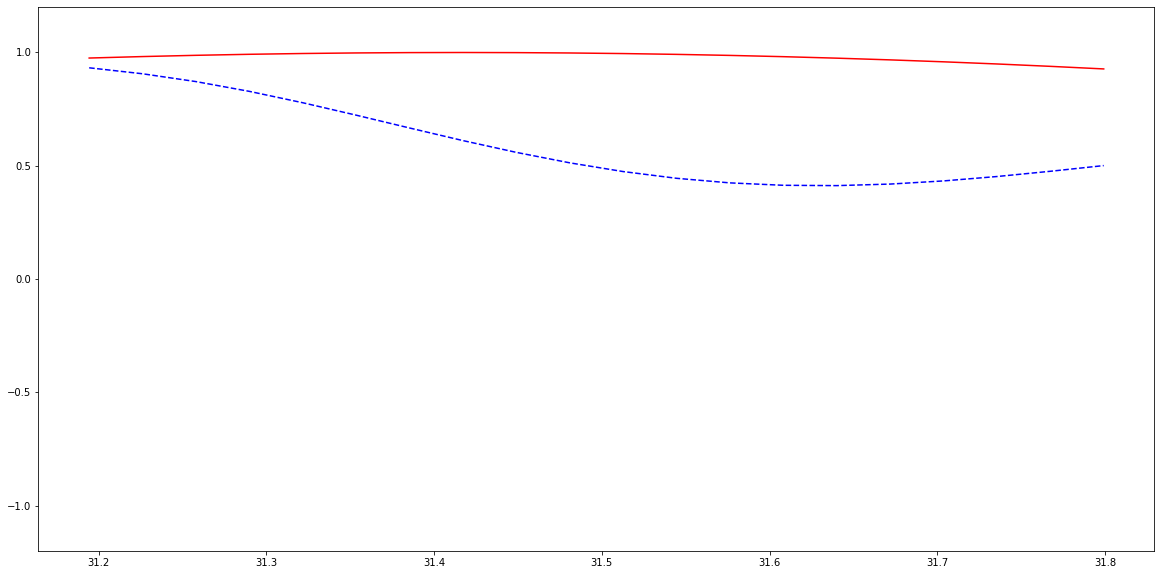

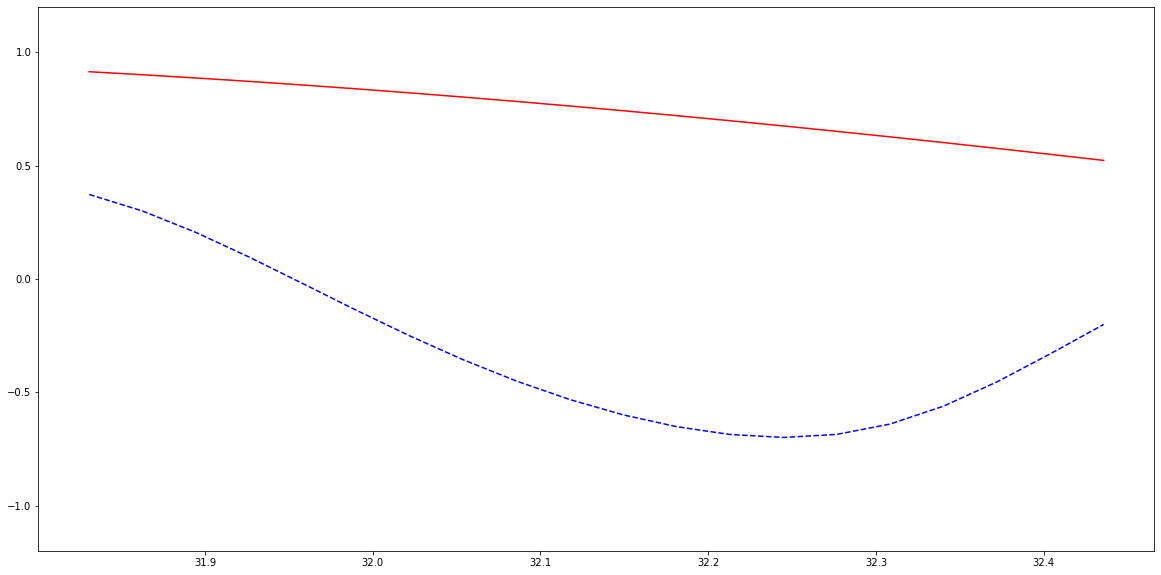

time cost: 0.061790895


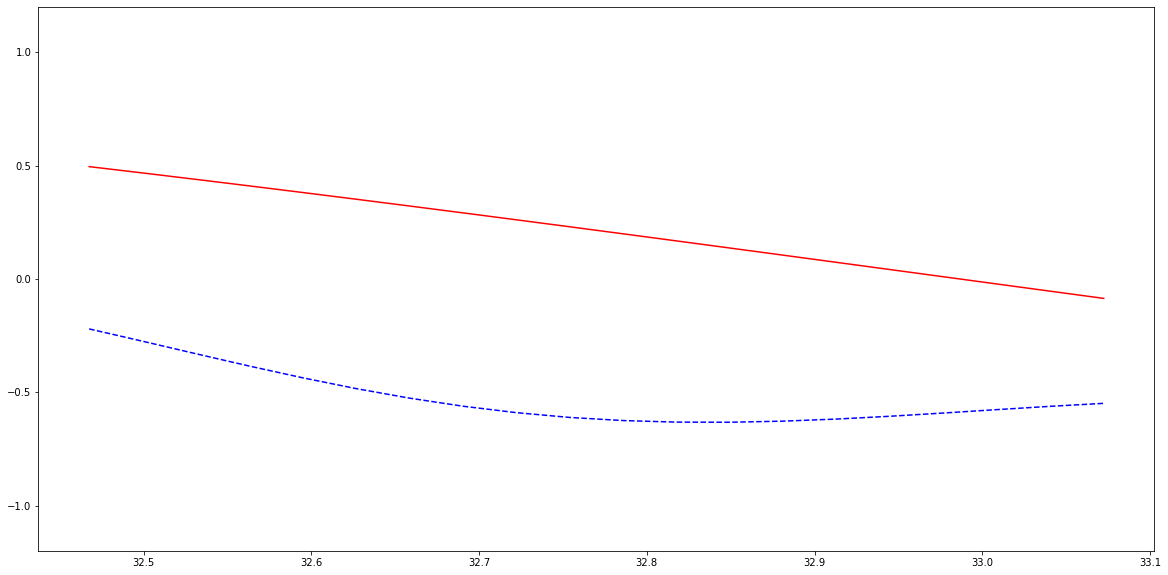

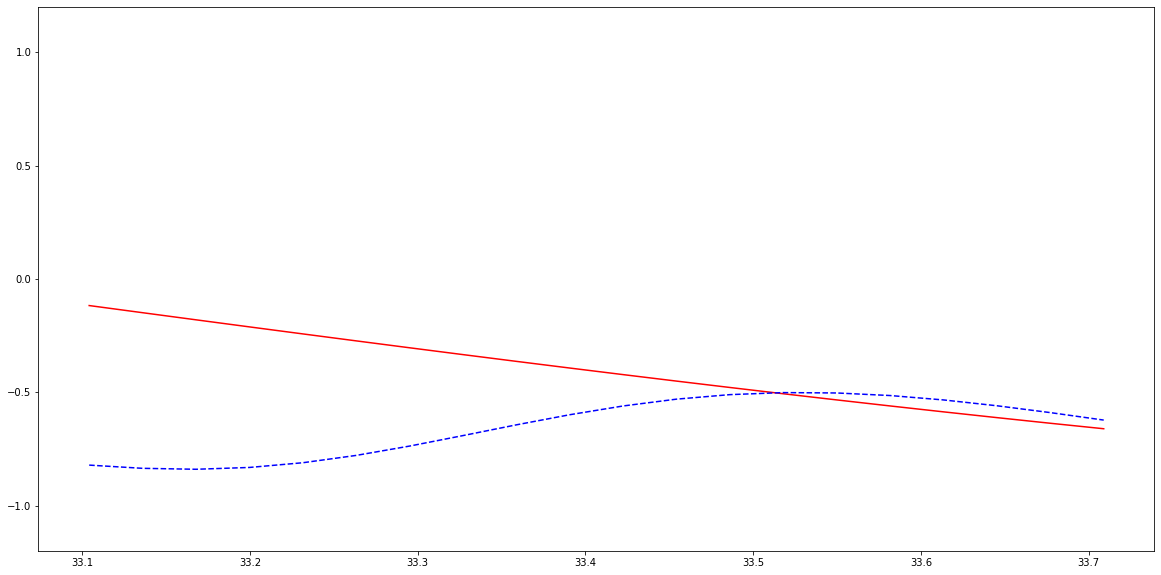

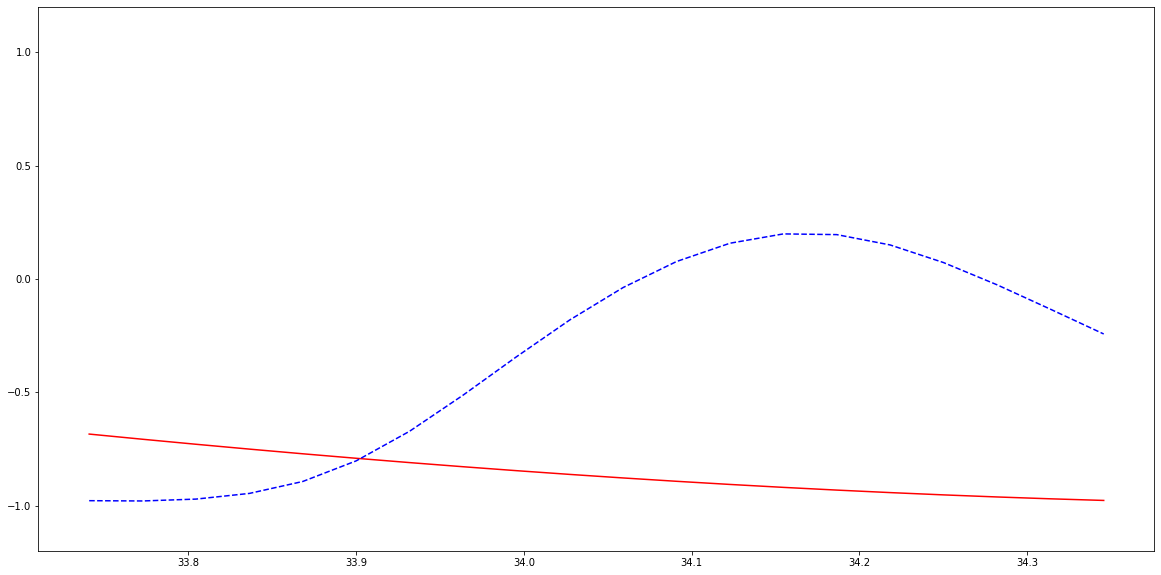

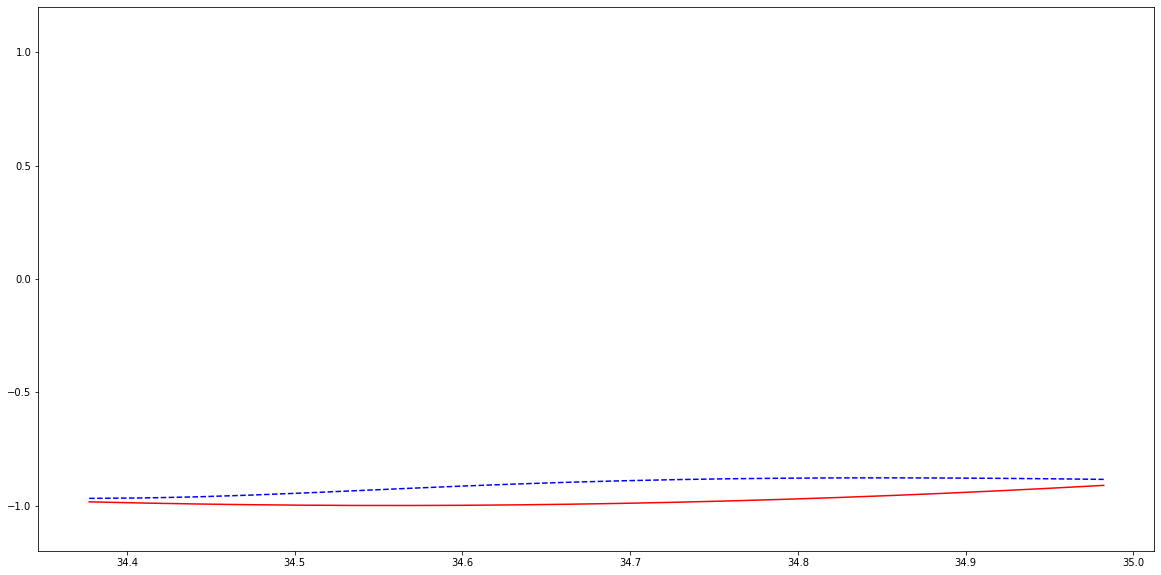

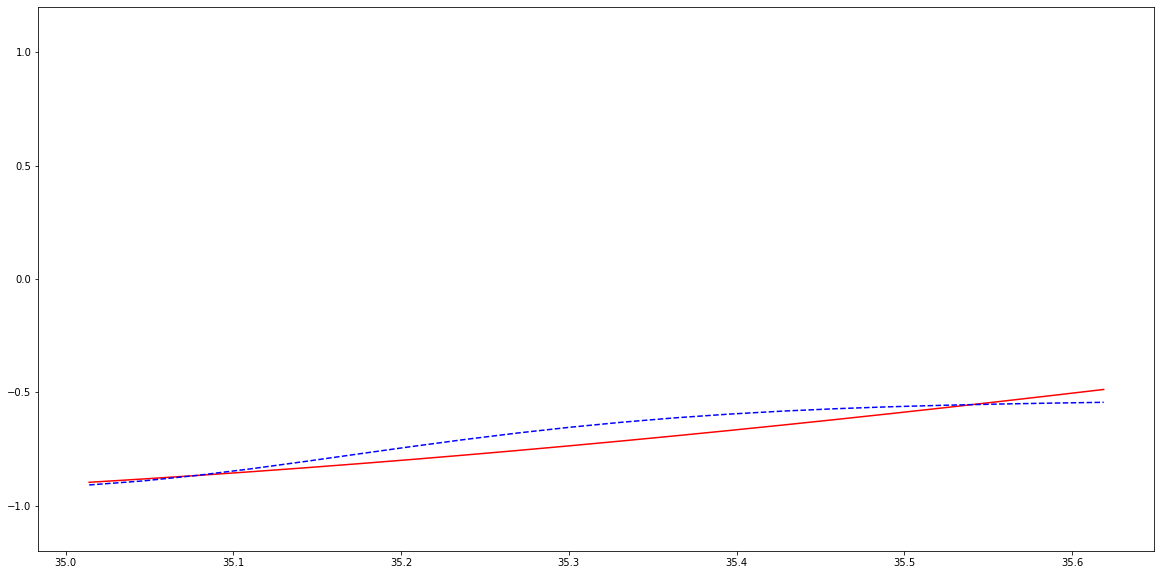

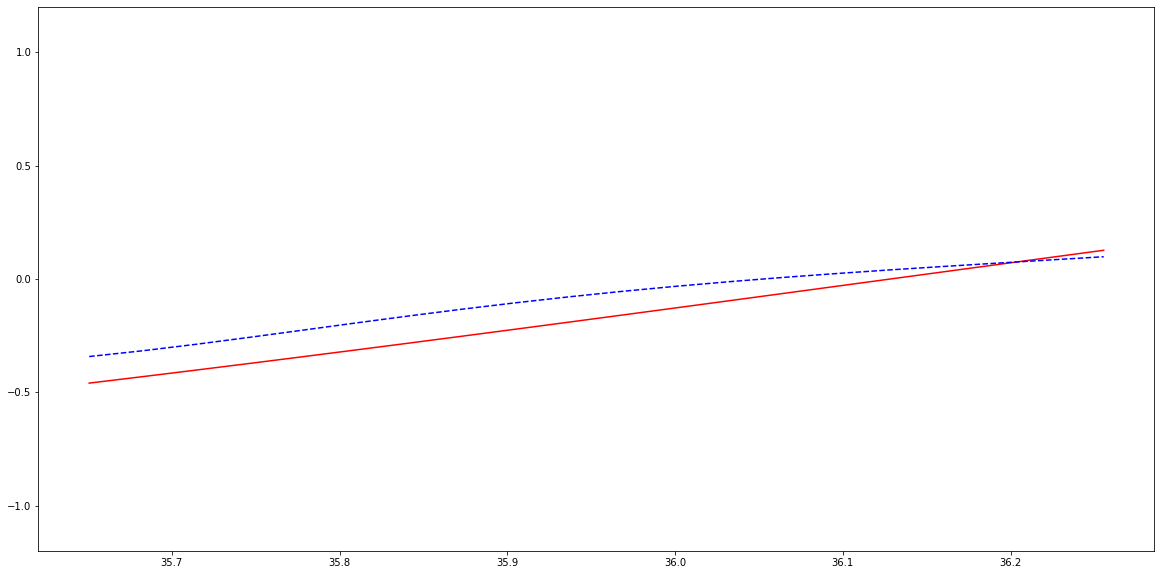

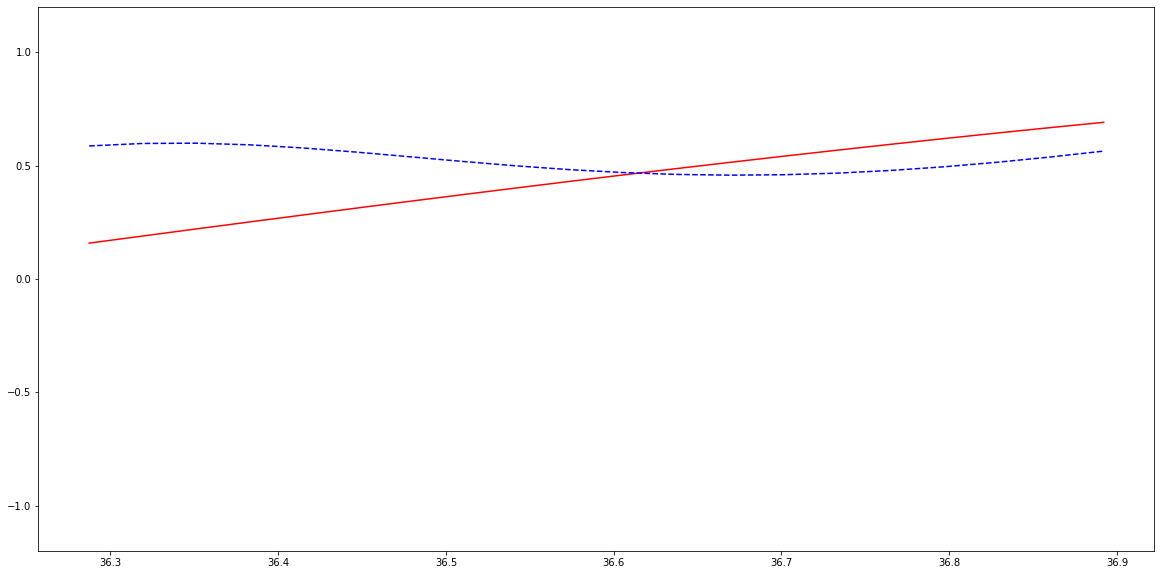

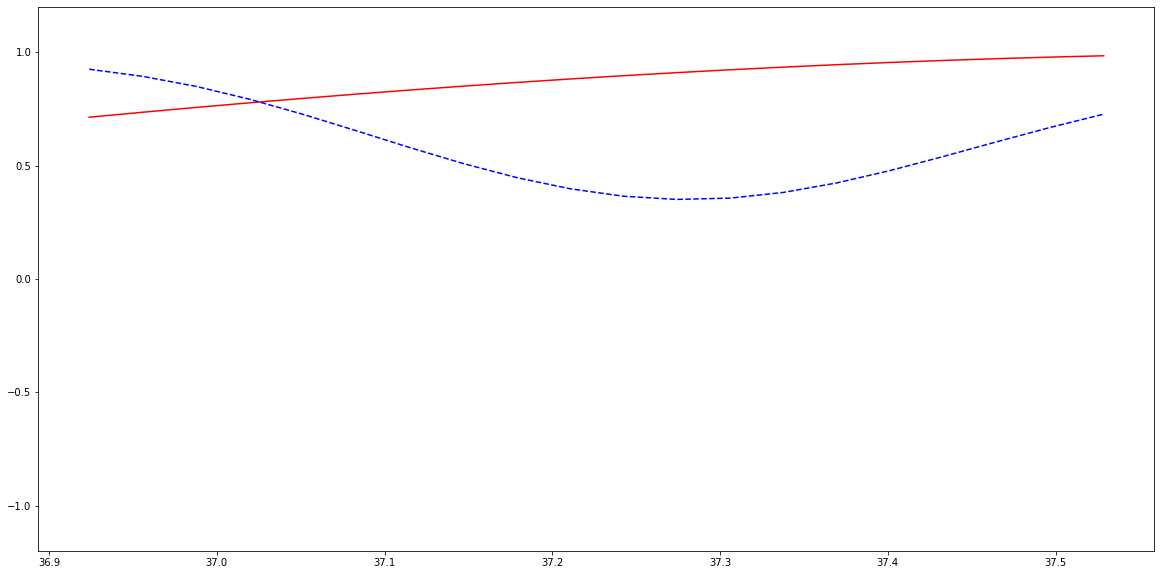

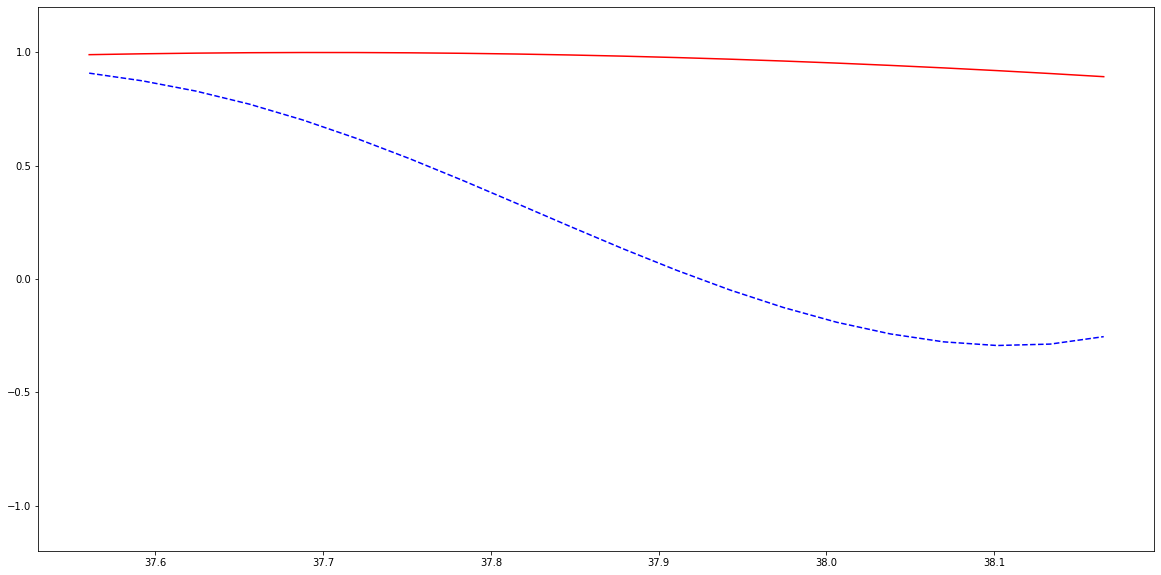

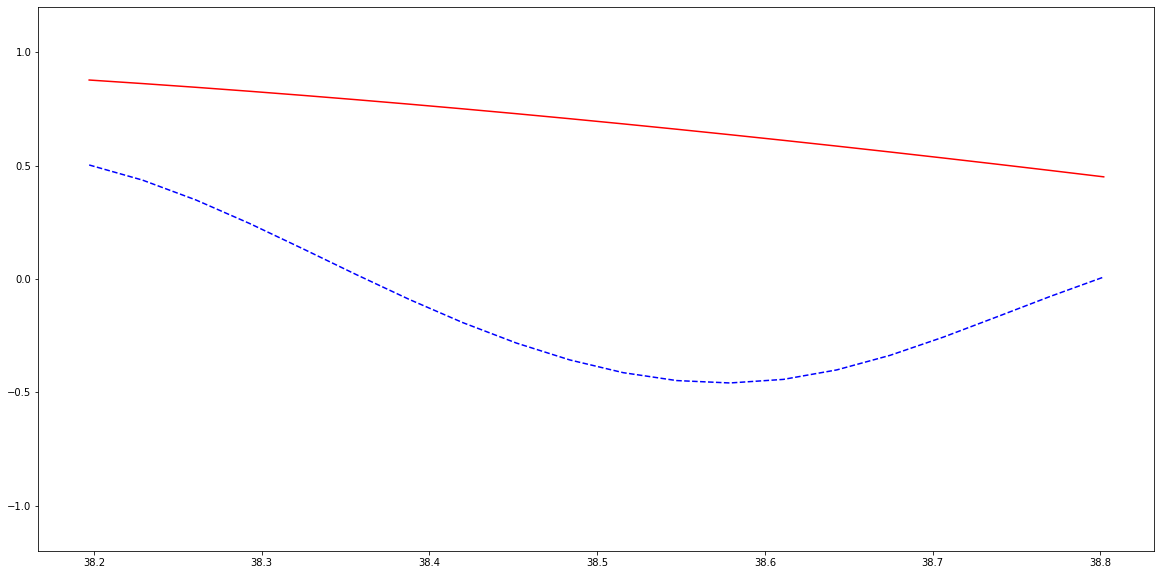

time cost: 0.035206478


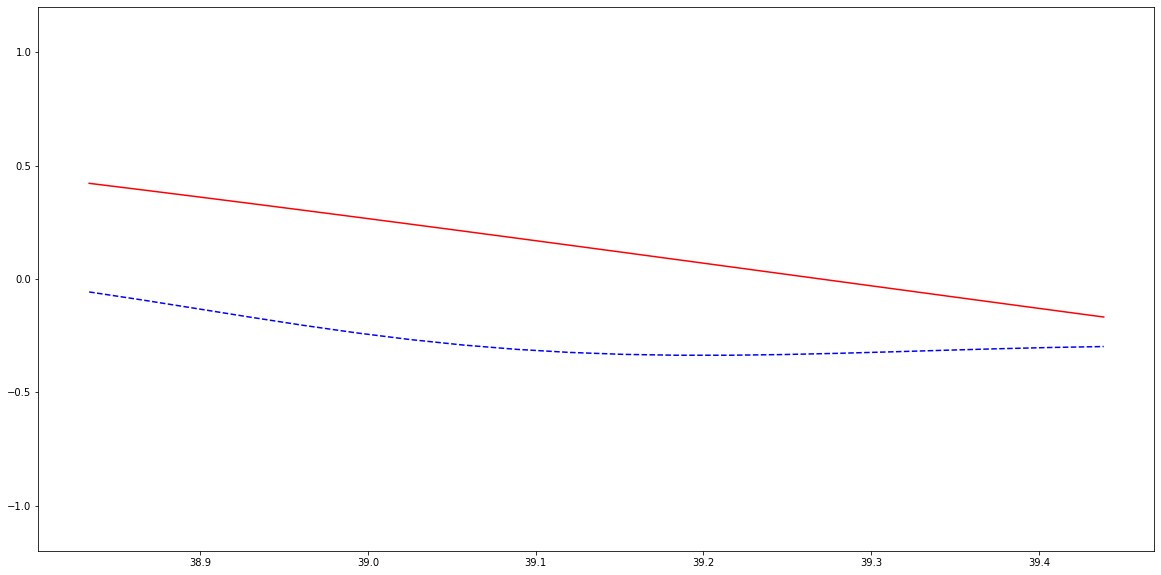

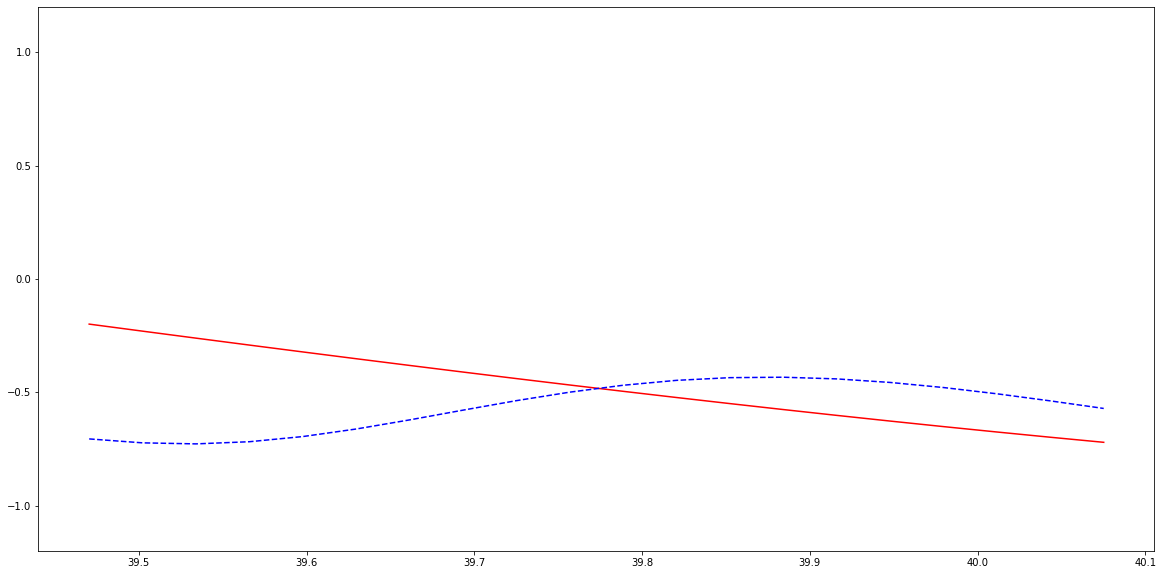

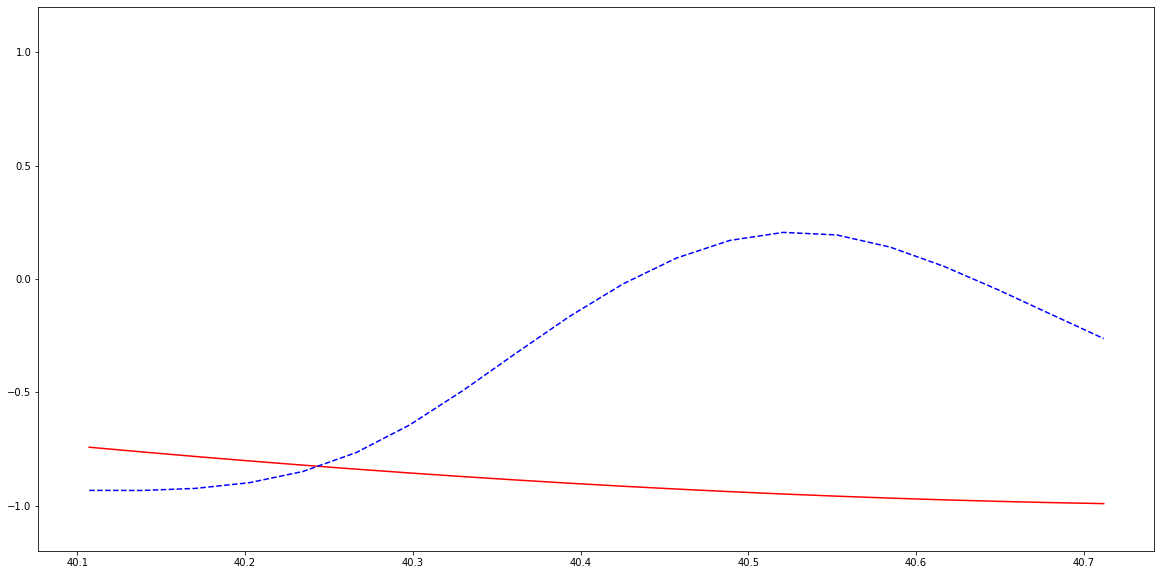

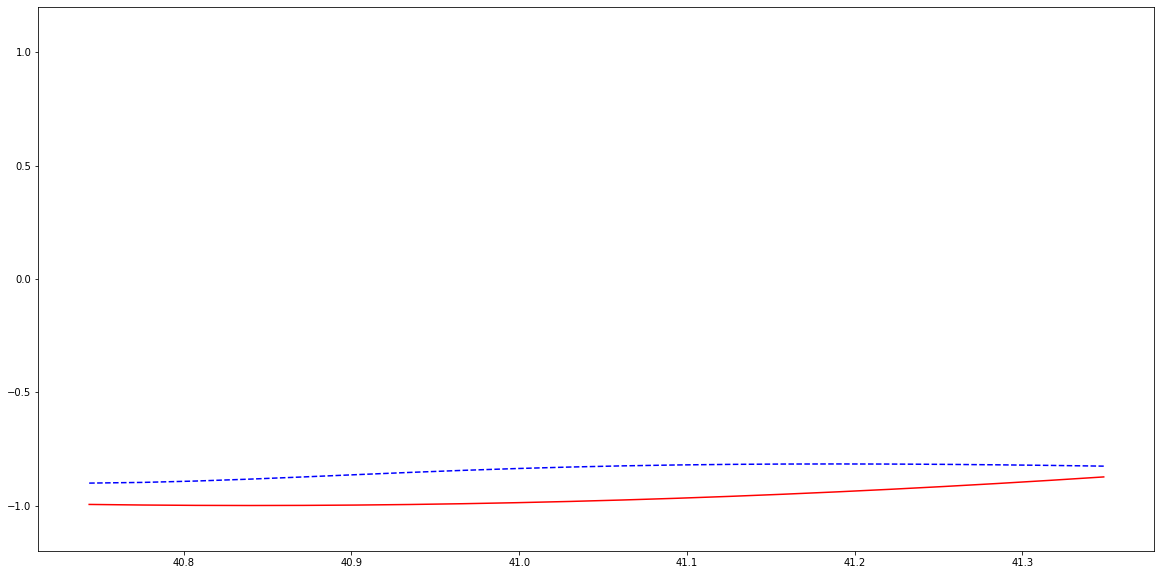

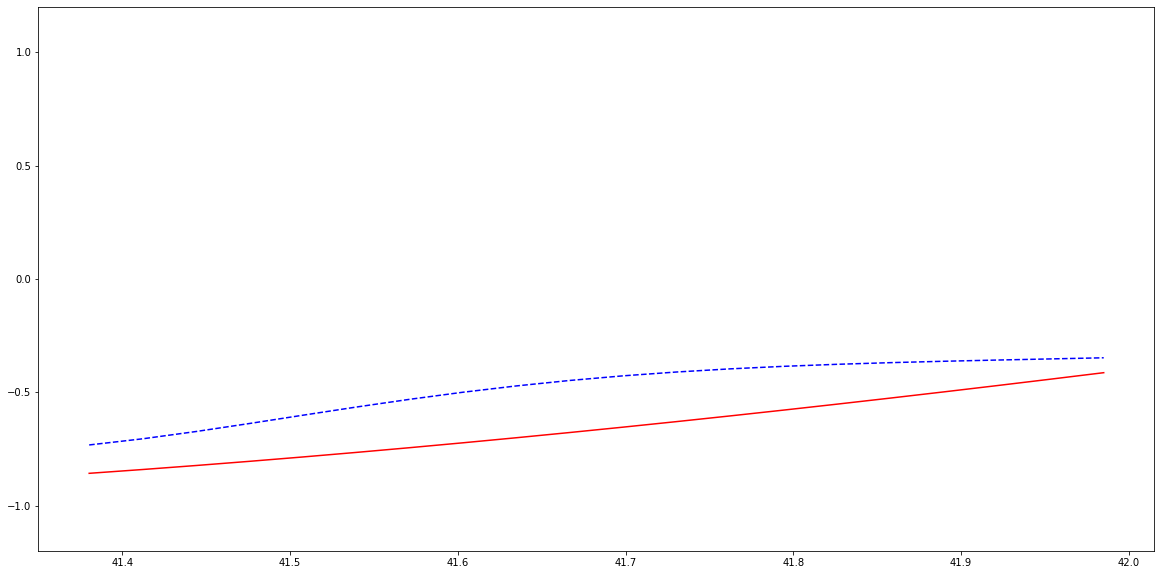

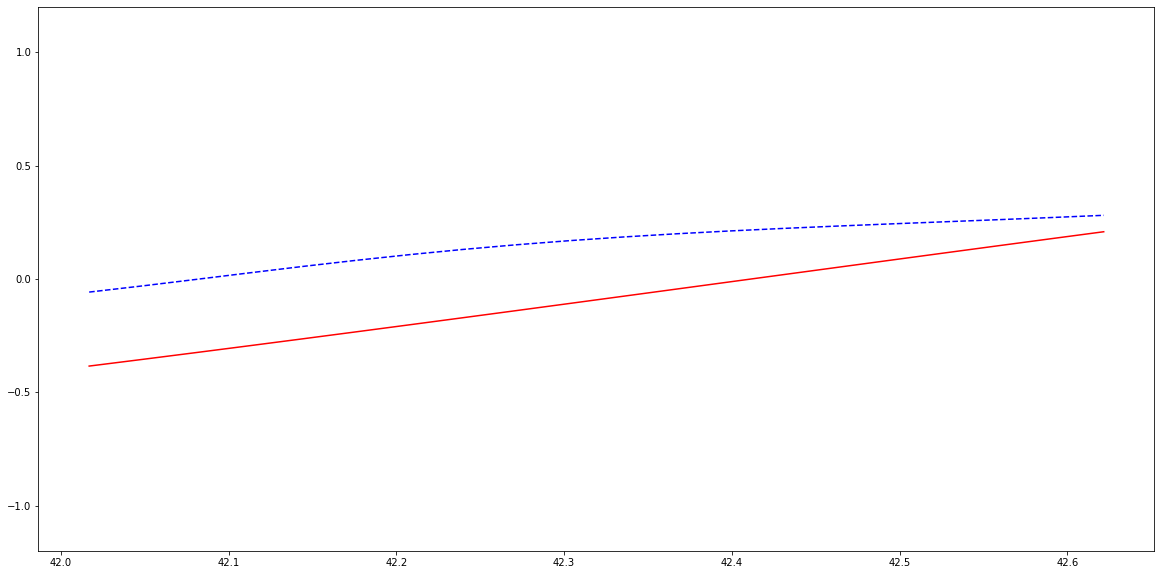

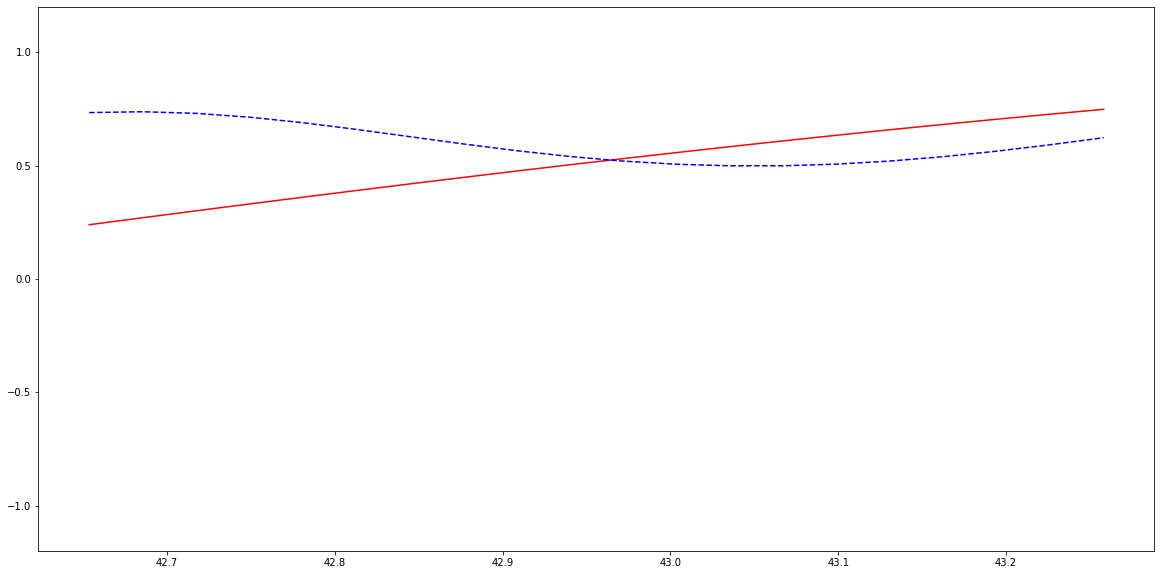

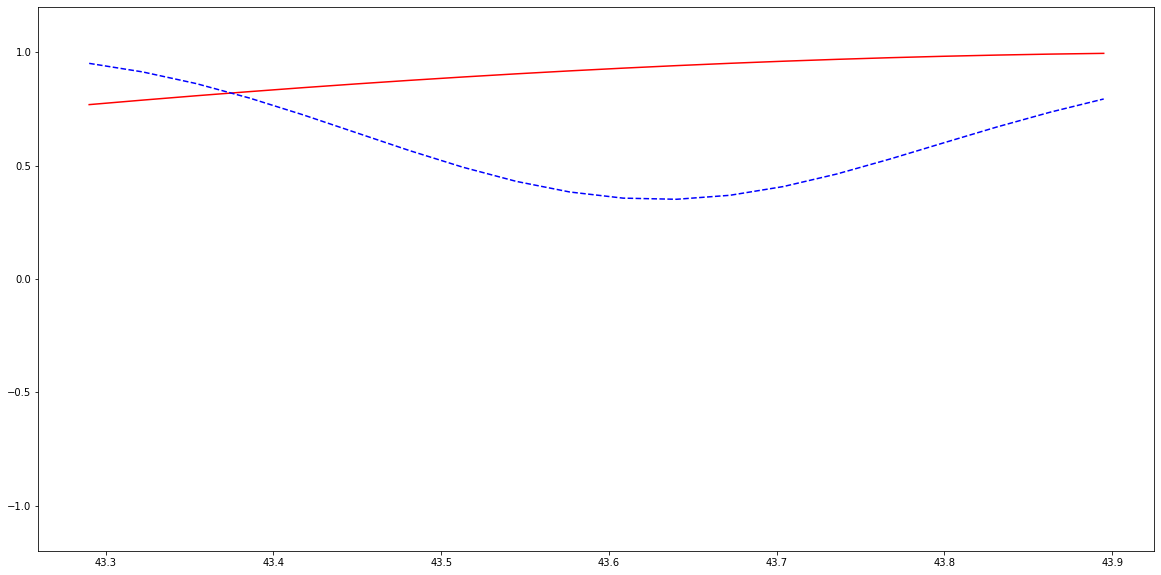

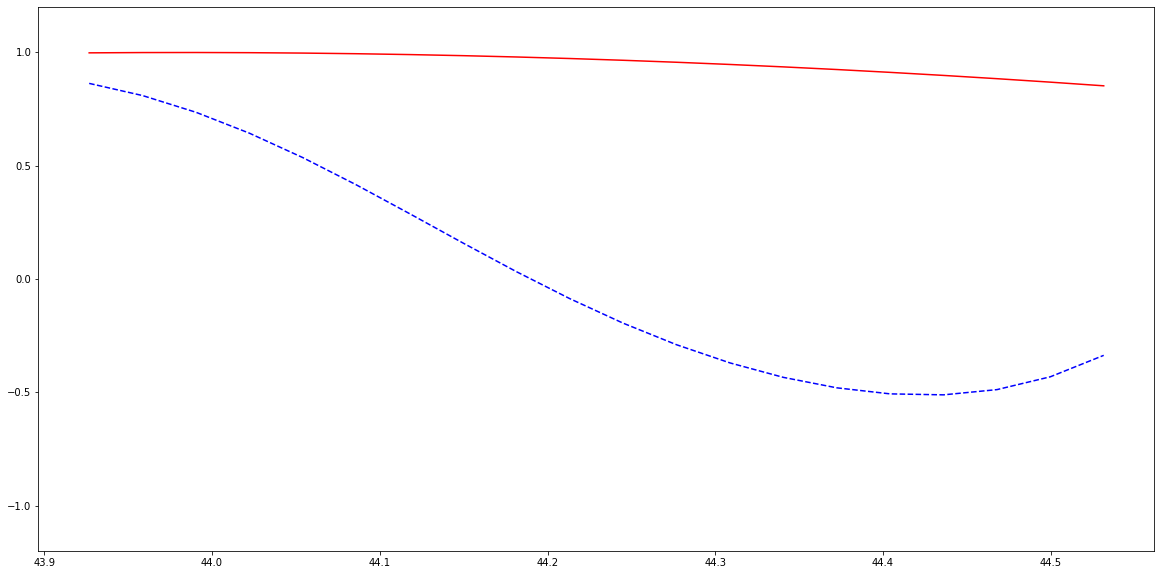

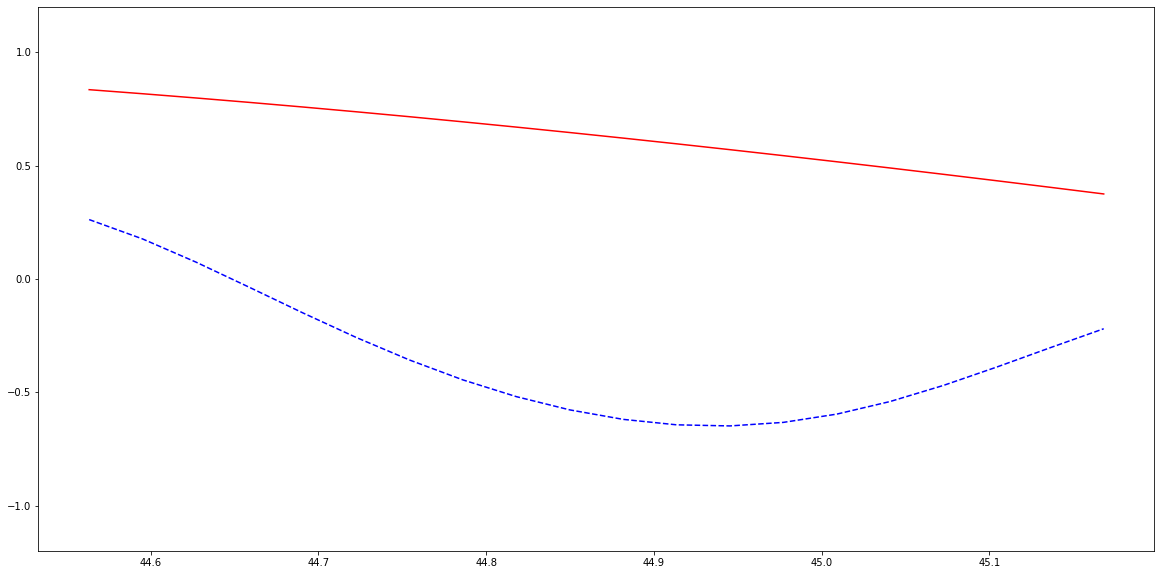

time cost: 0.034412444


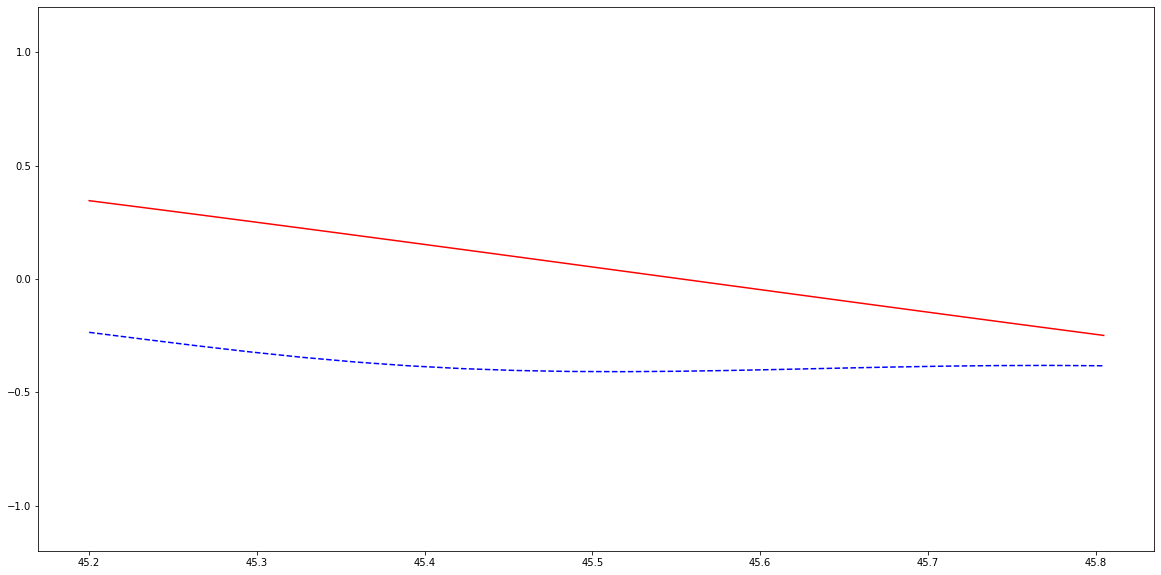

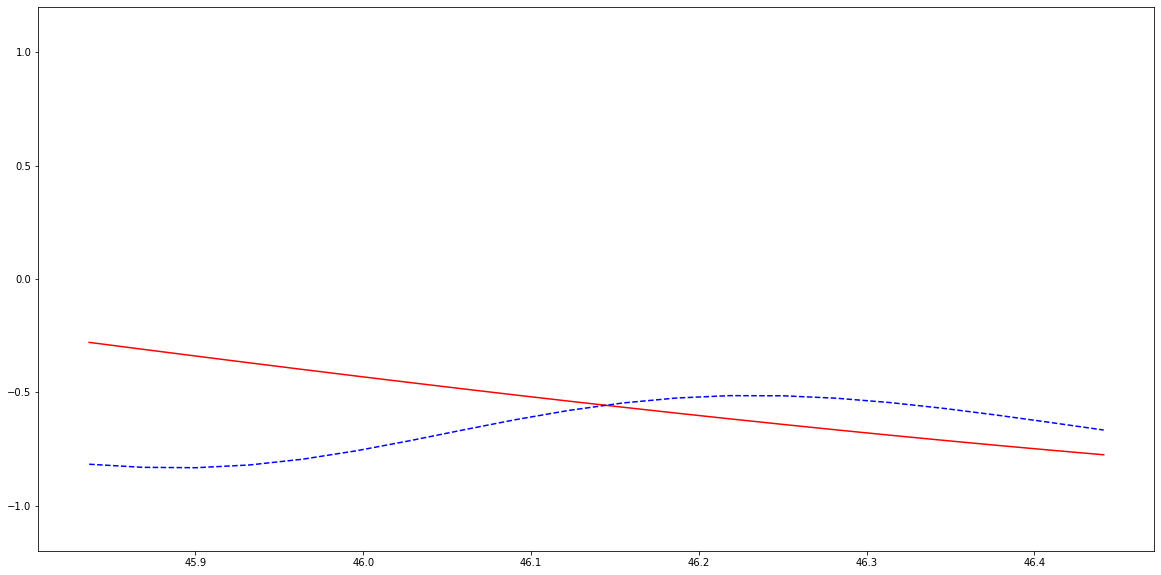

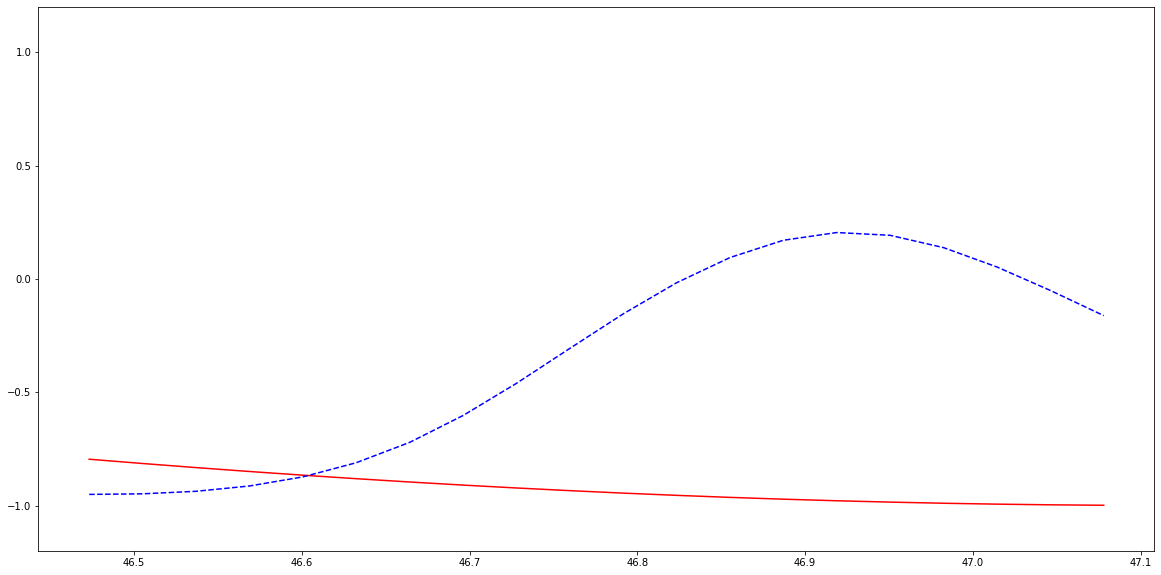

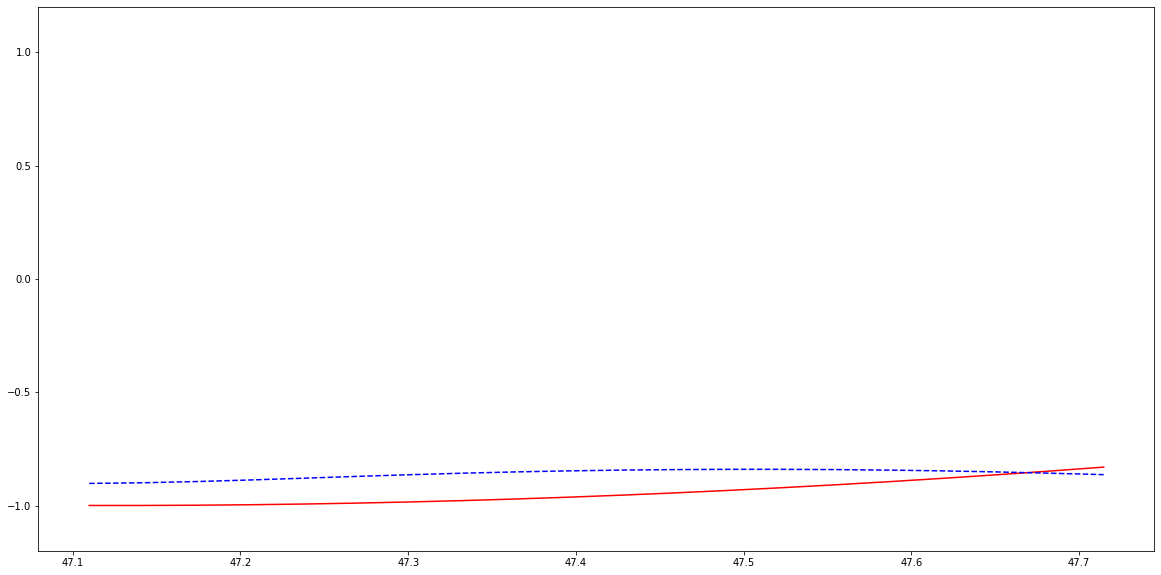

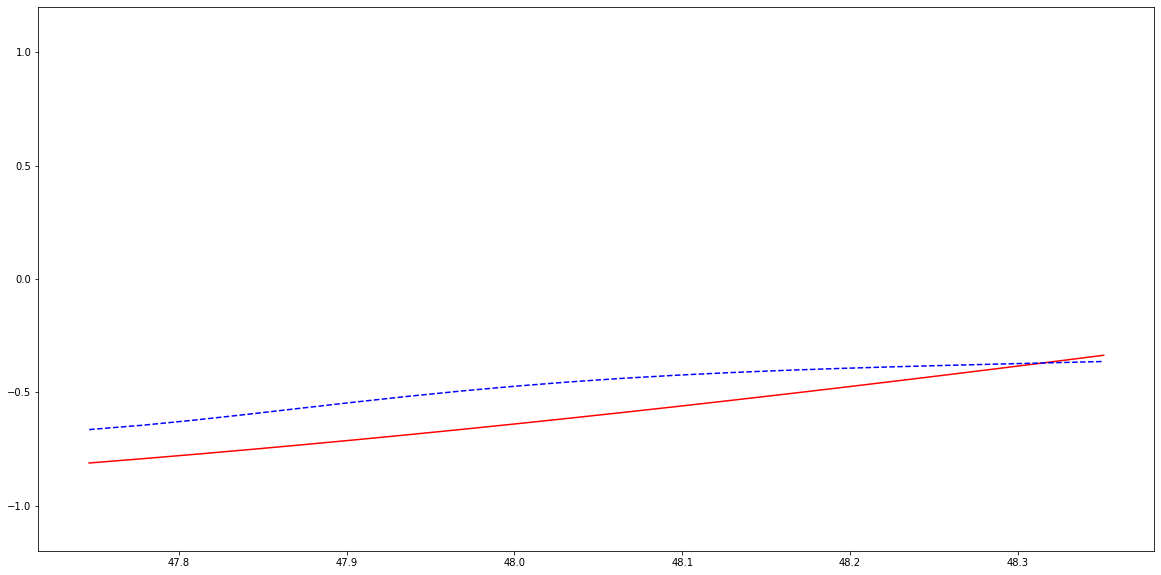

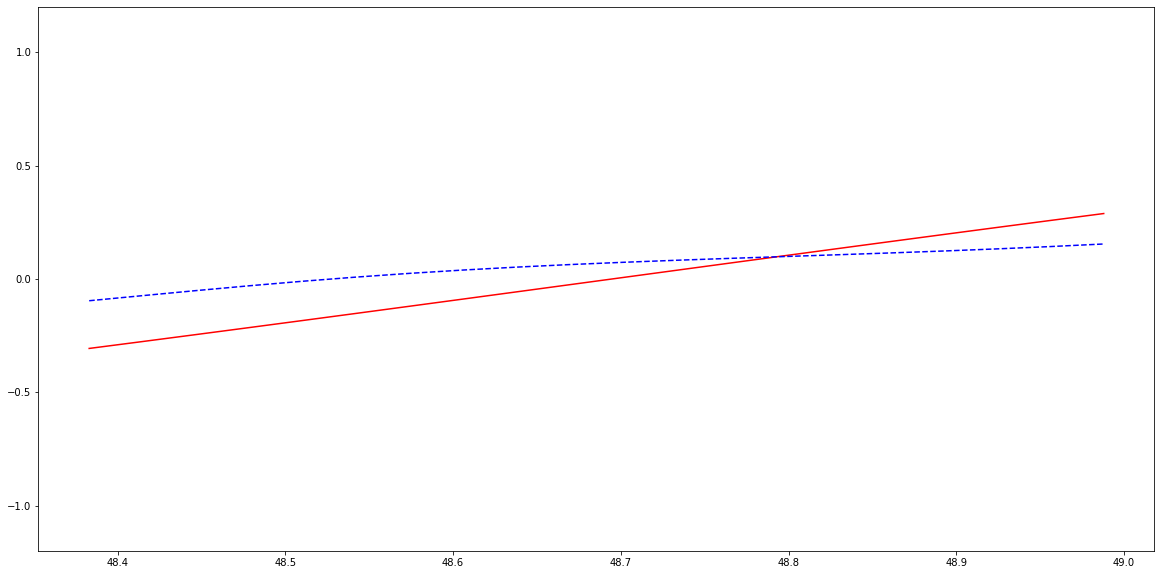

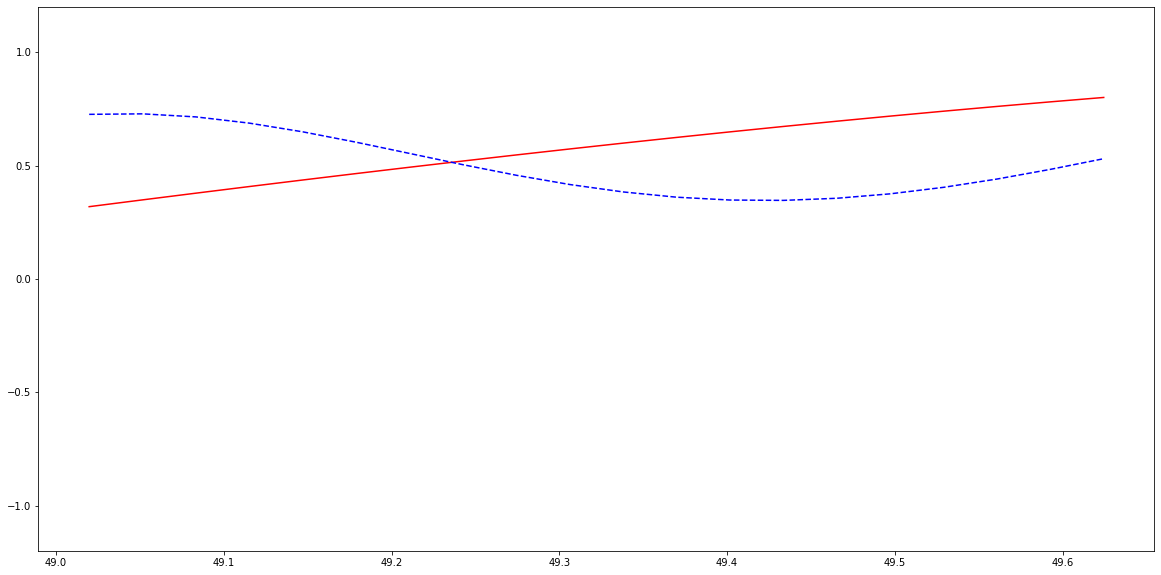

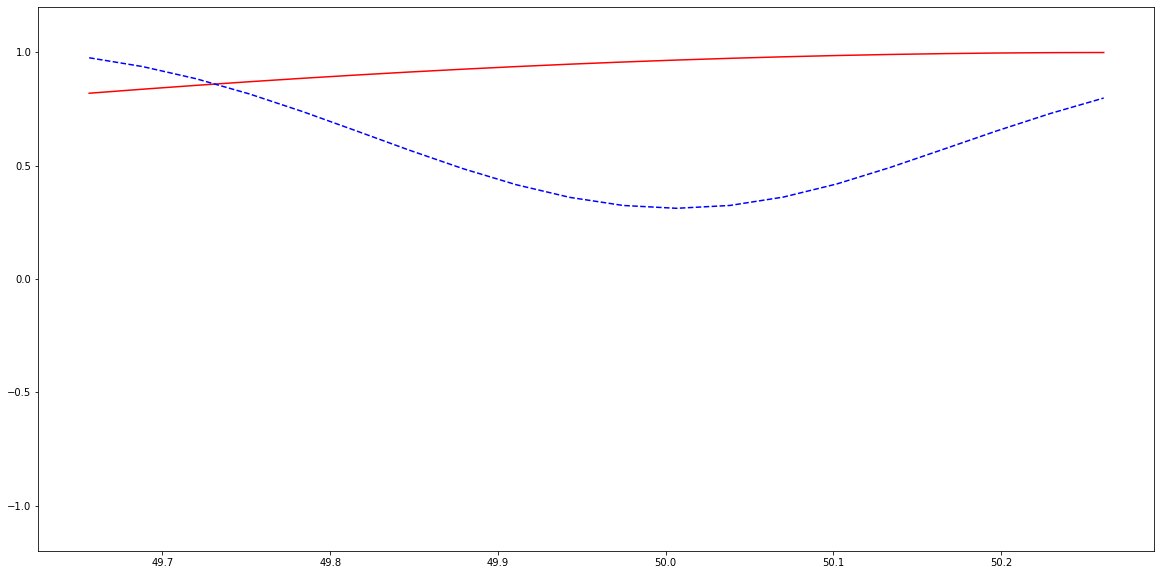

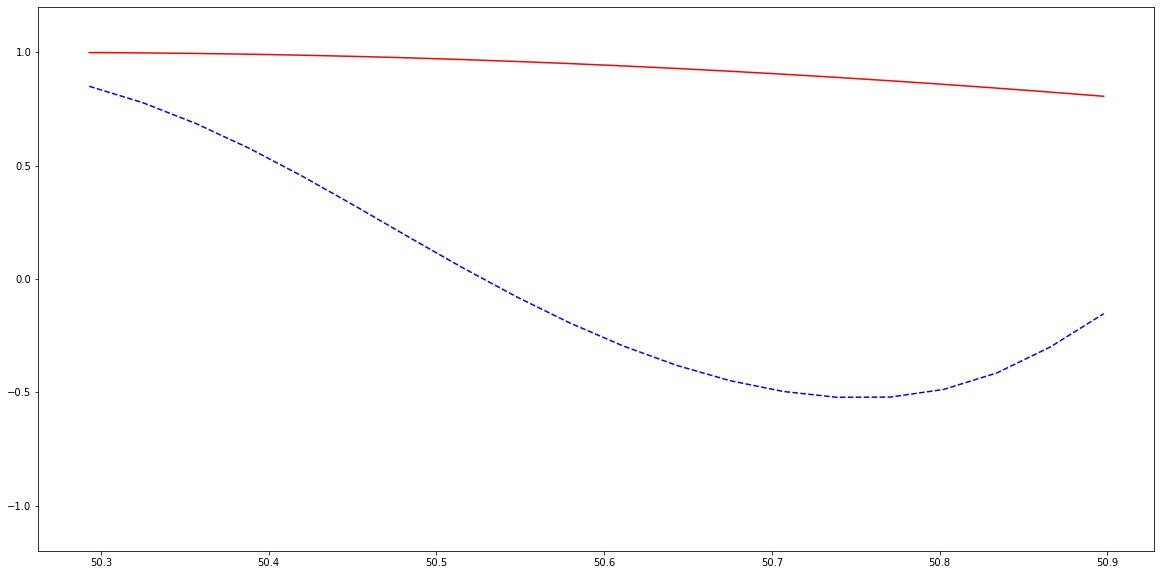

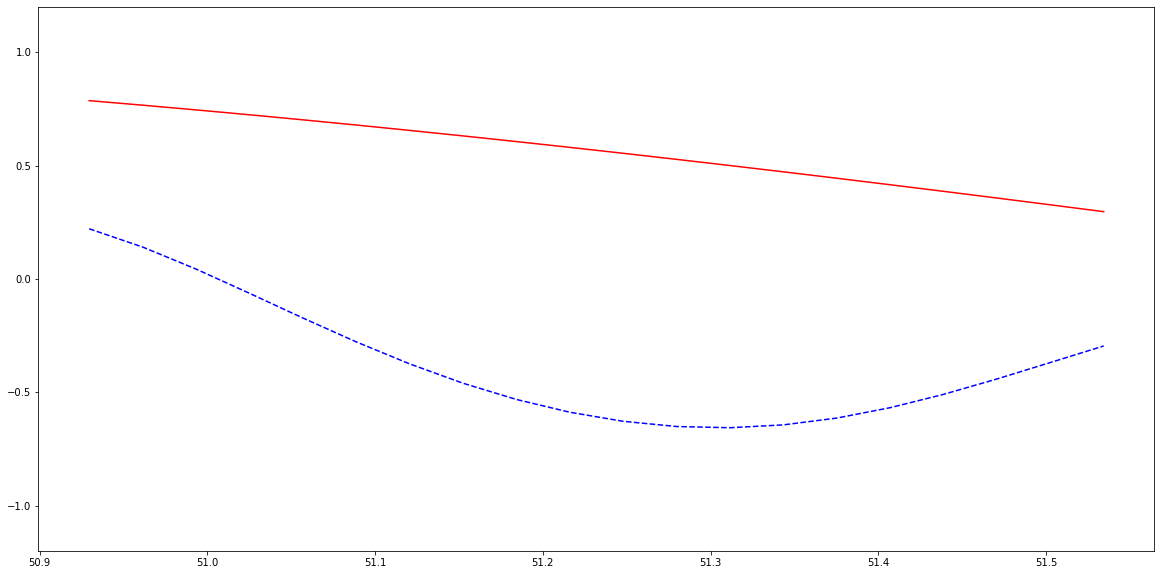

time cost: 0.029636232


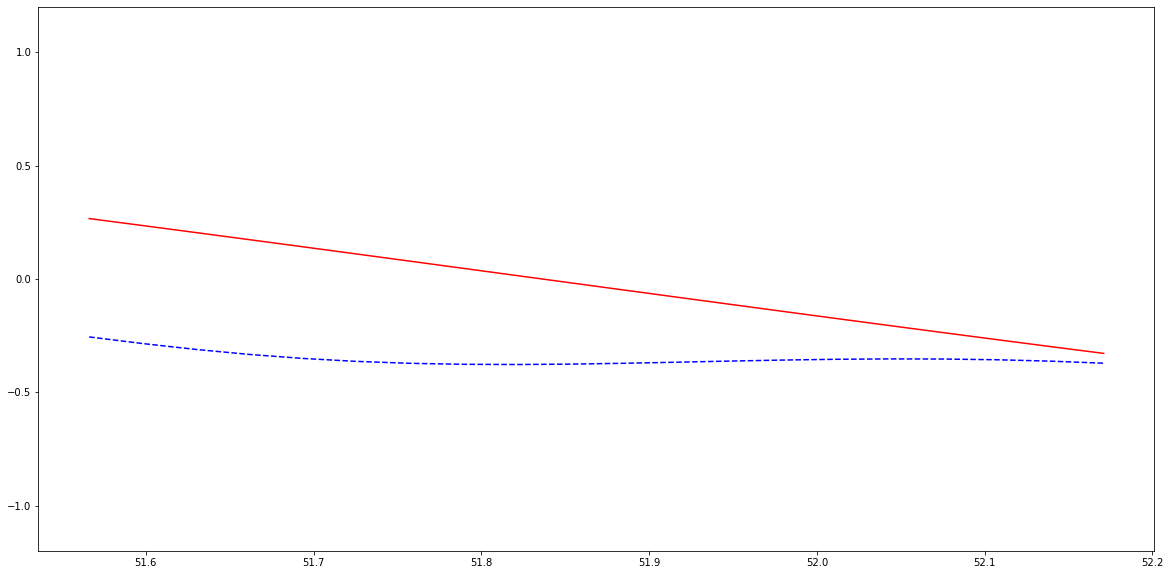

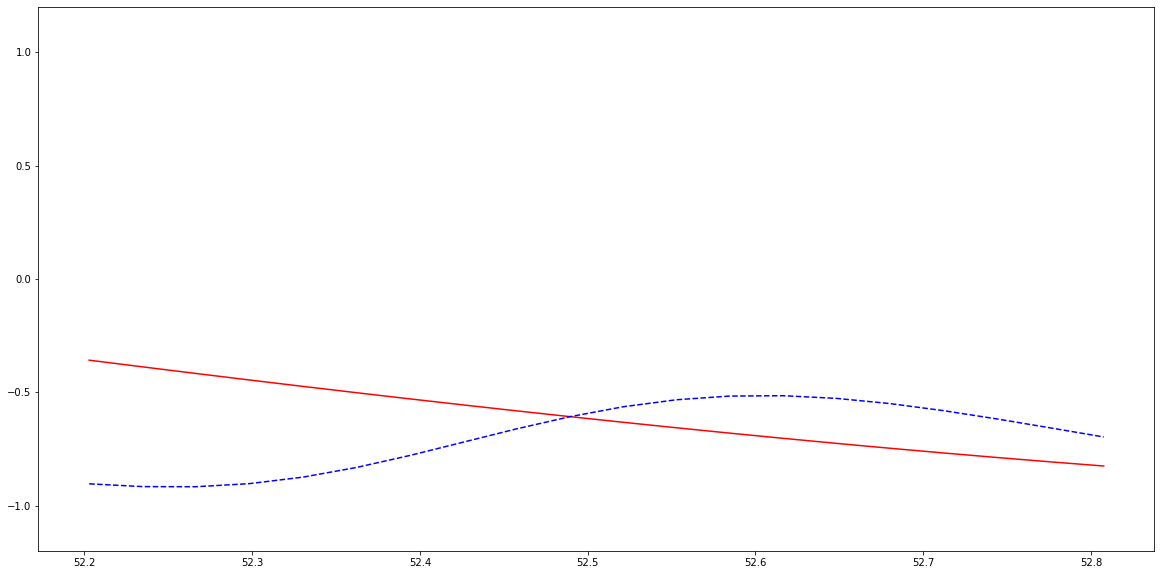

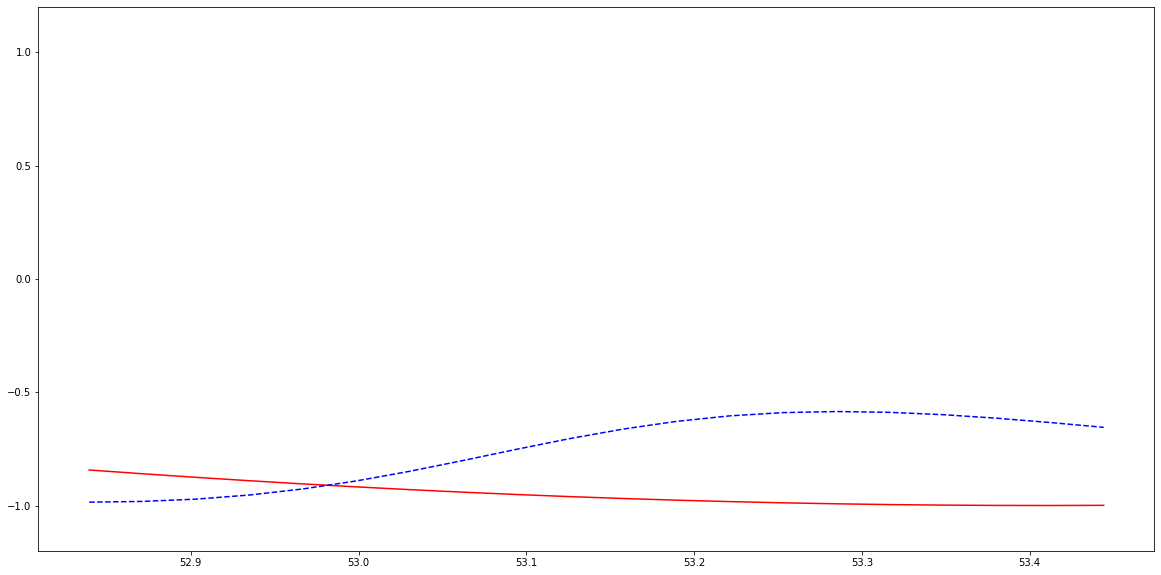

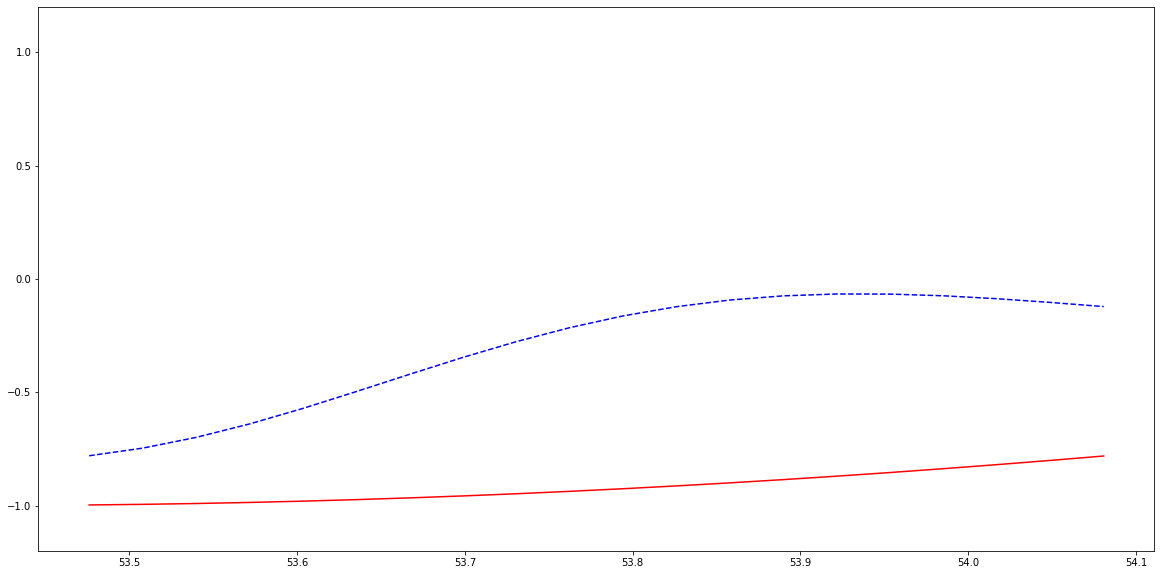

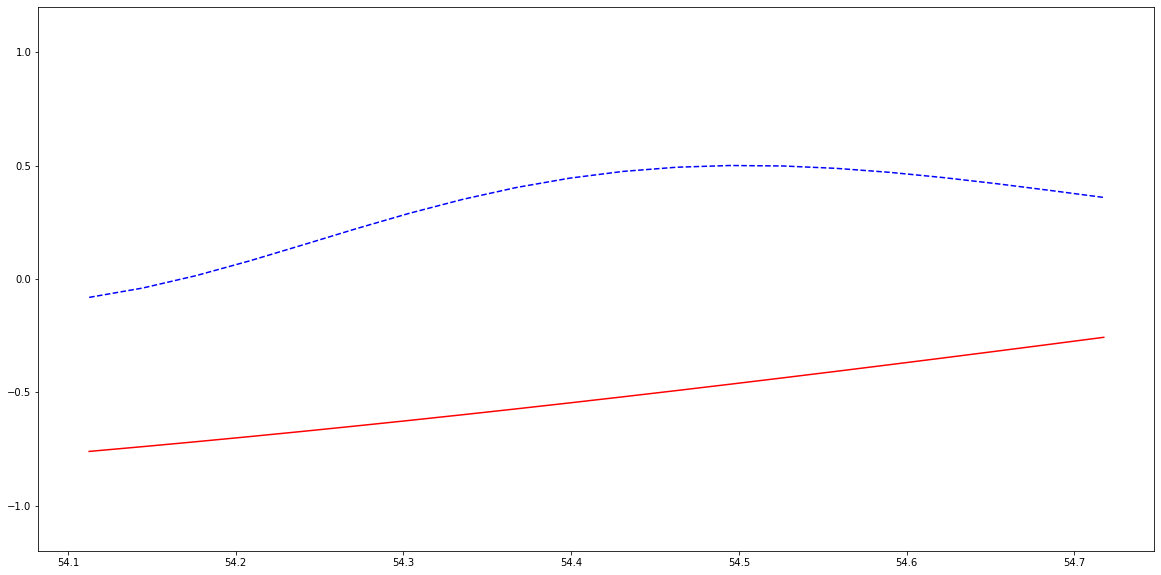

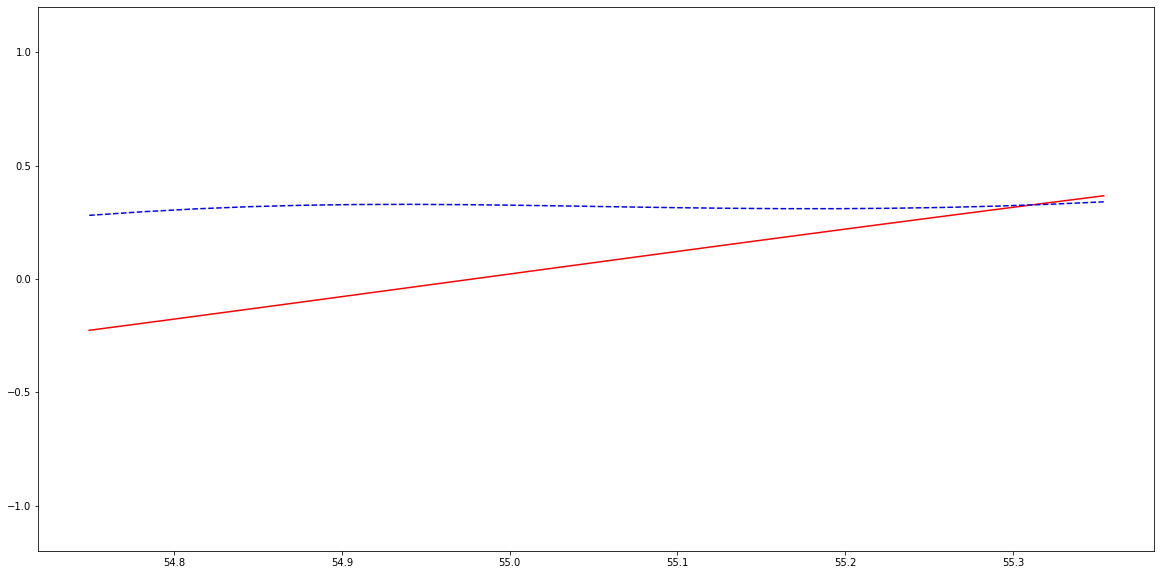

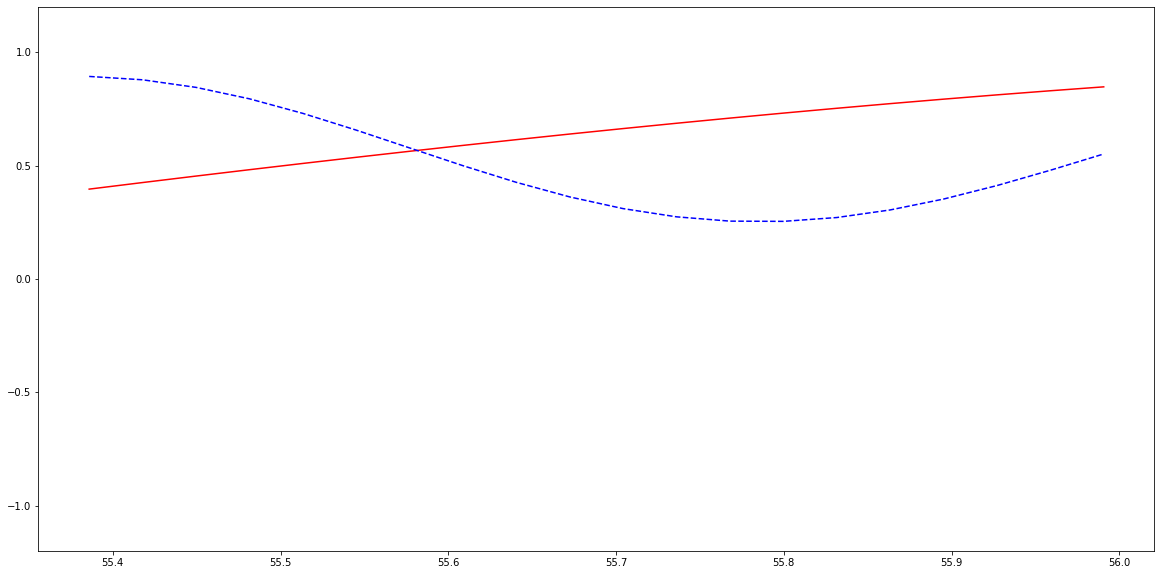

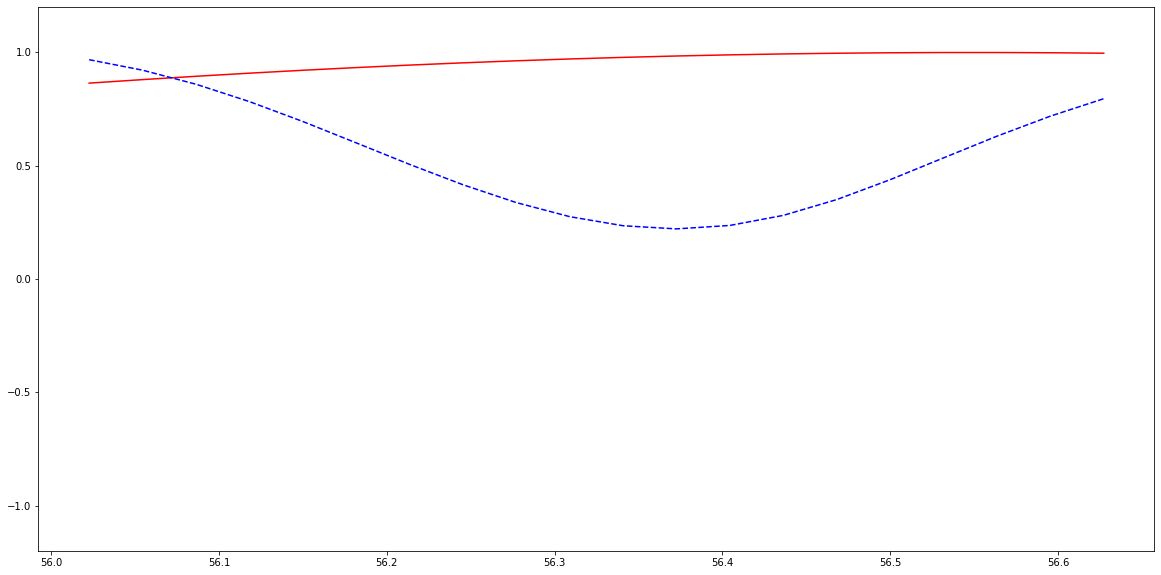

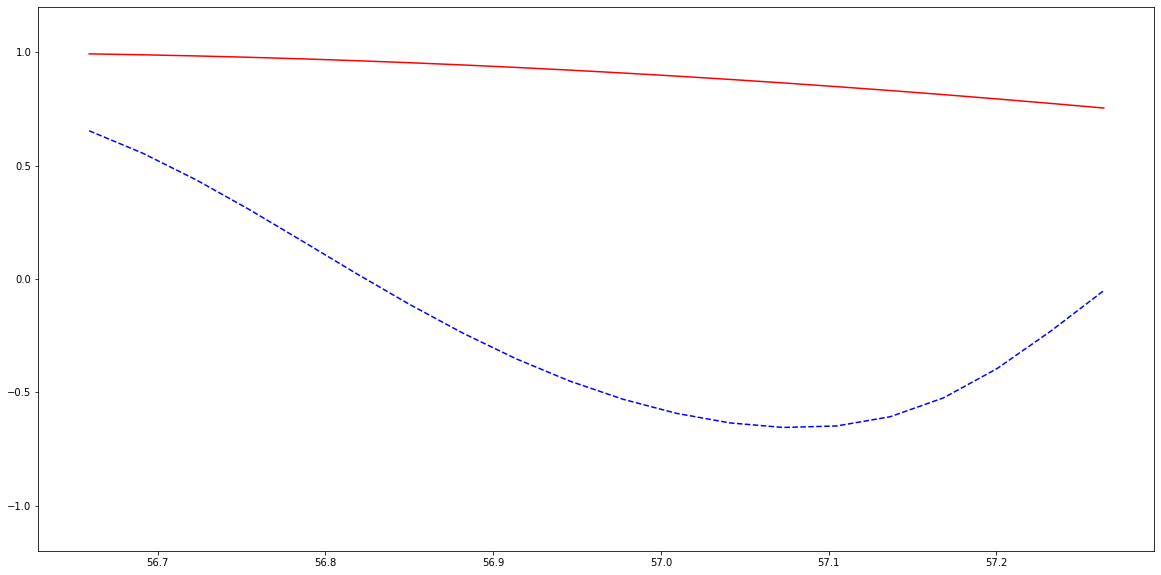

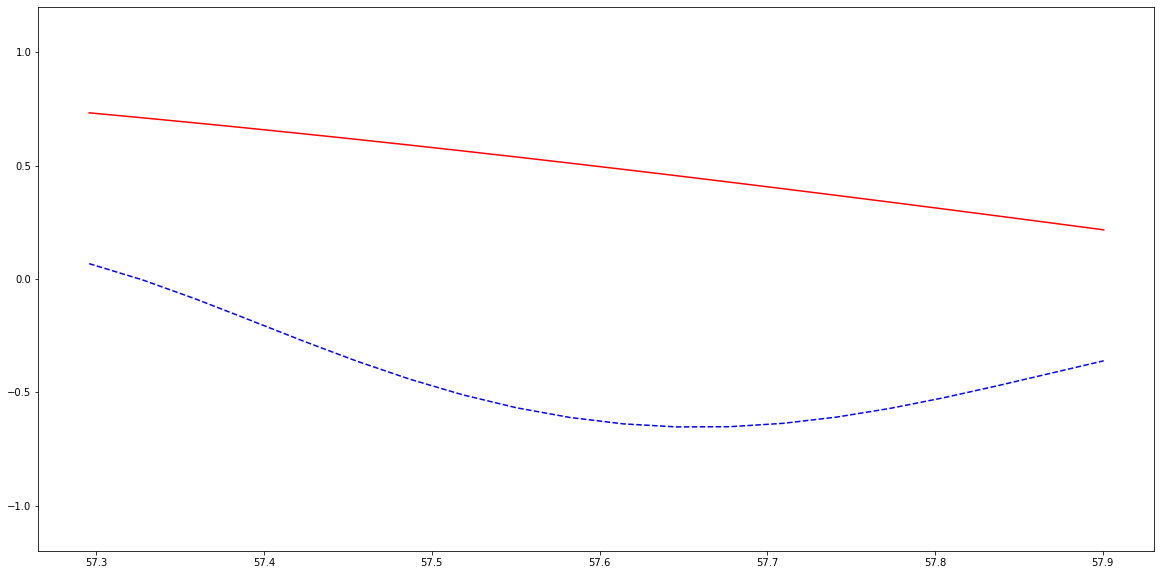

time cost: 0.039282054


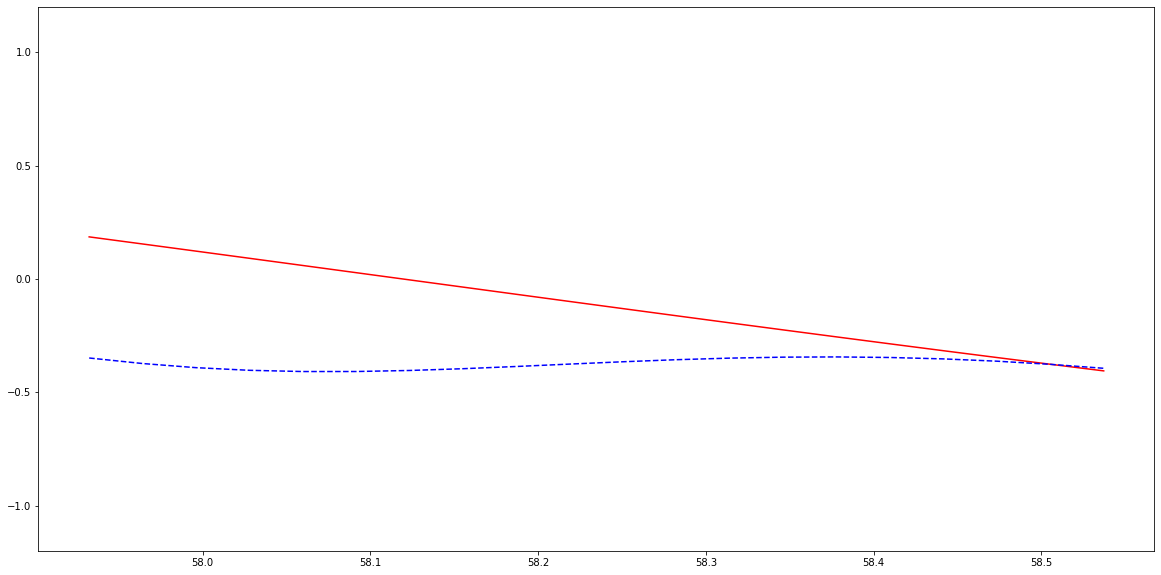

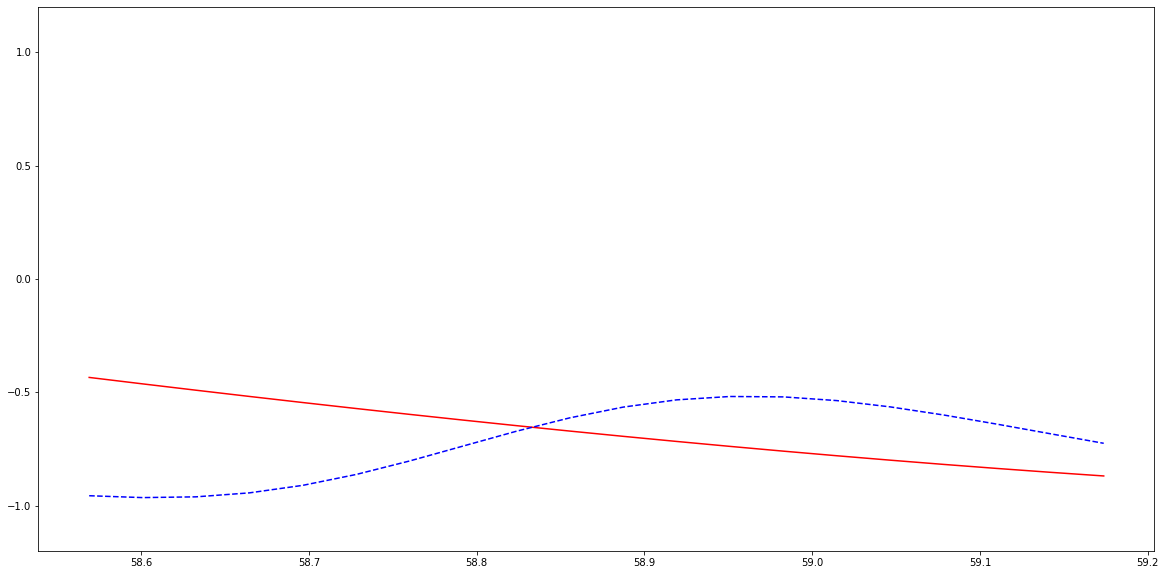

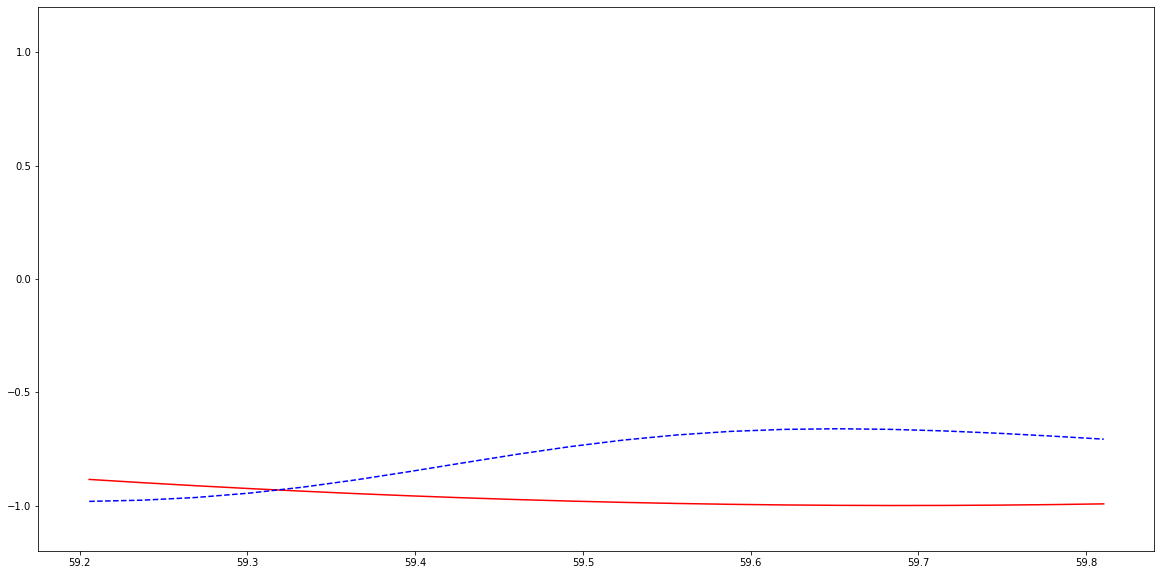

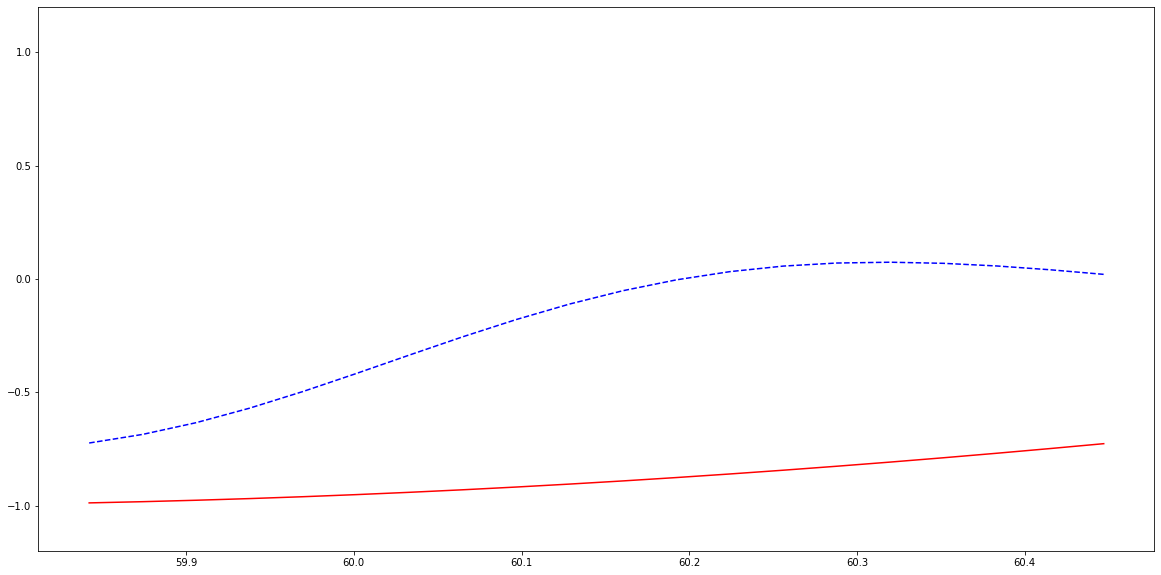

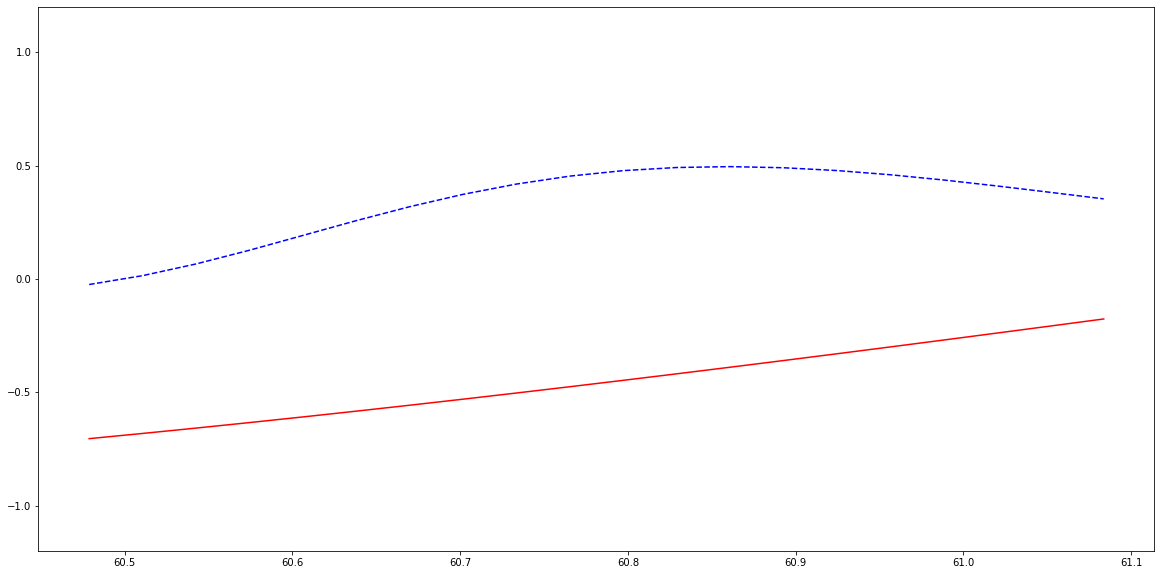

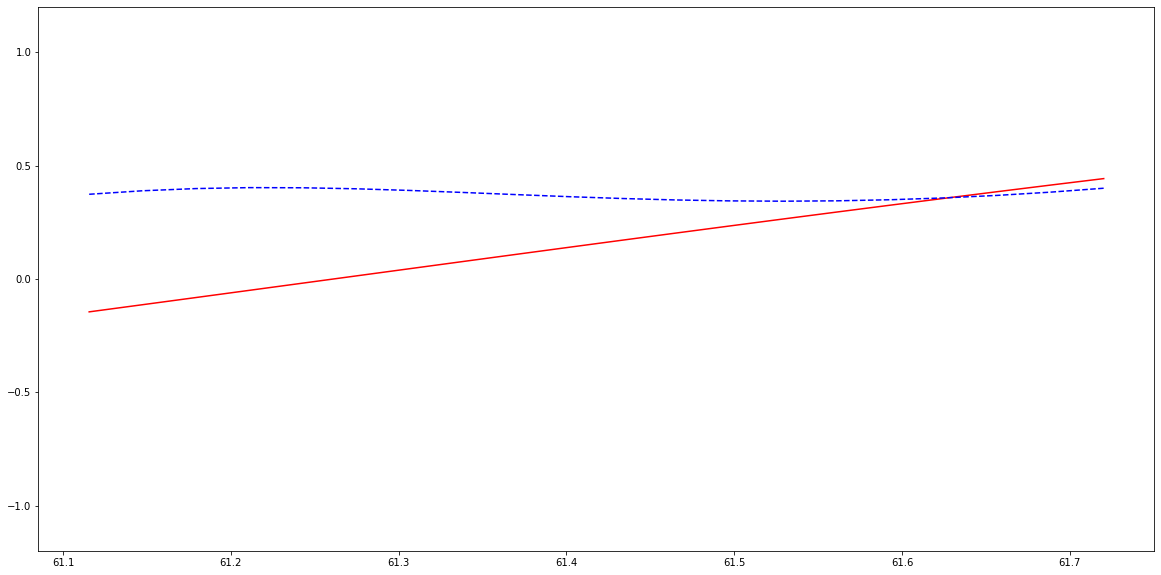

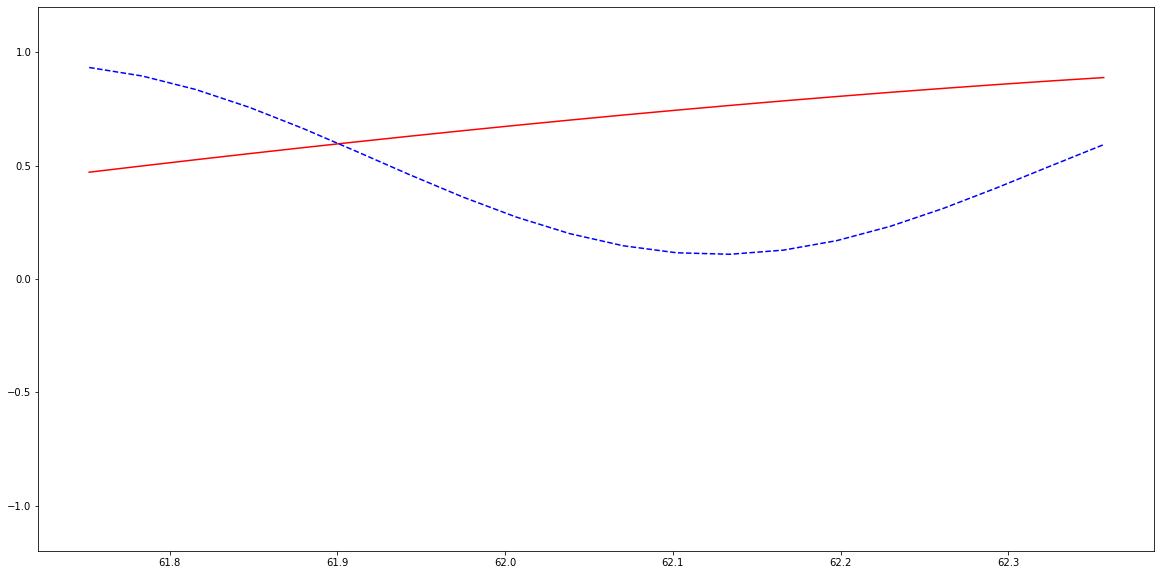

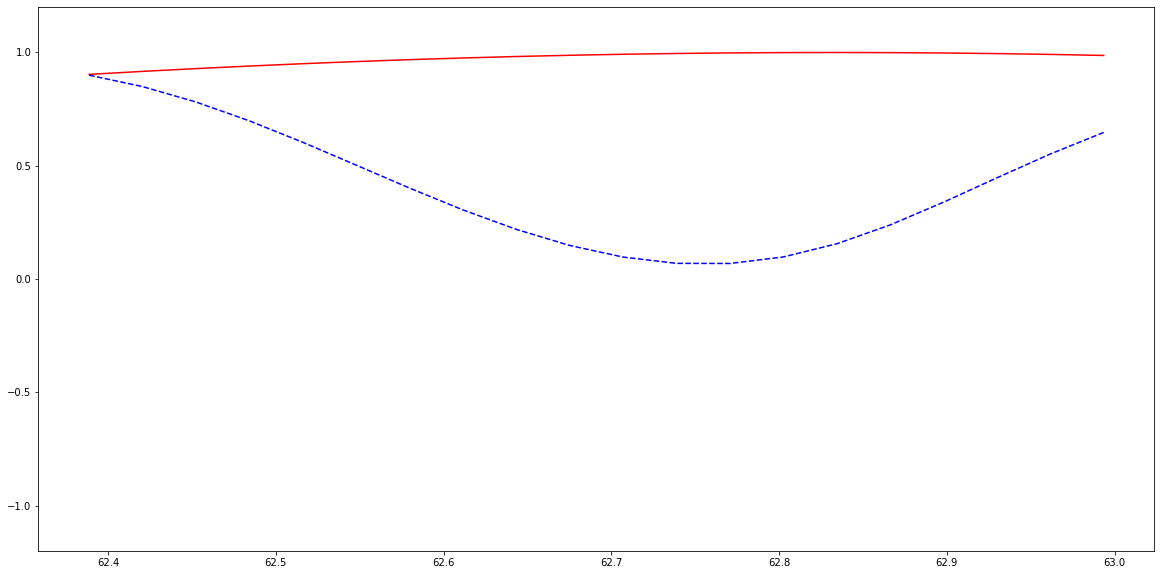

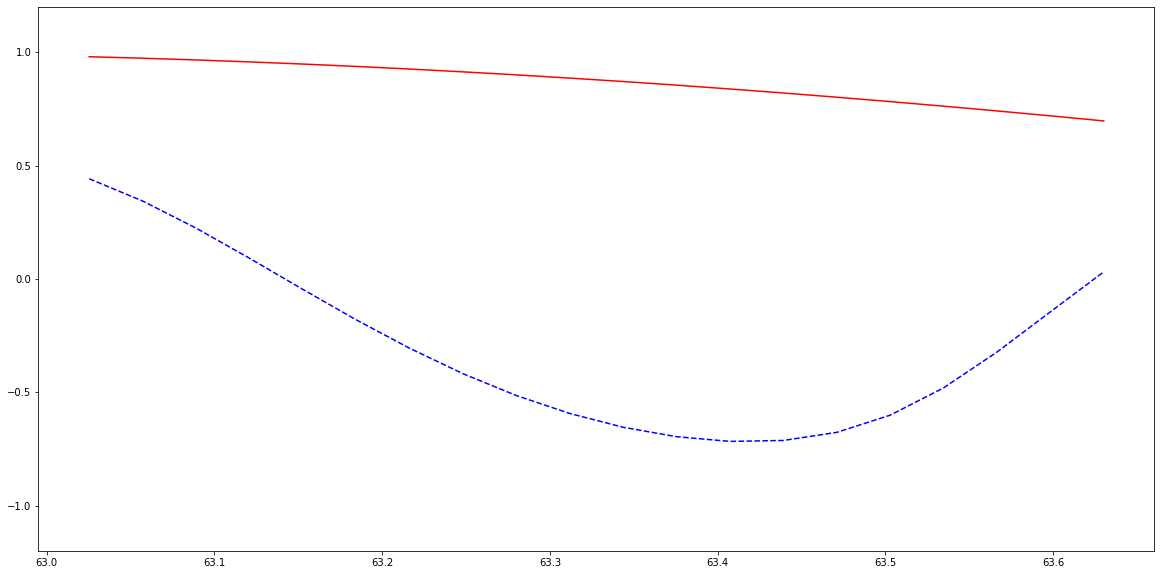

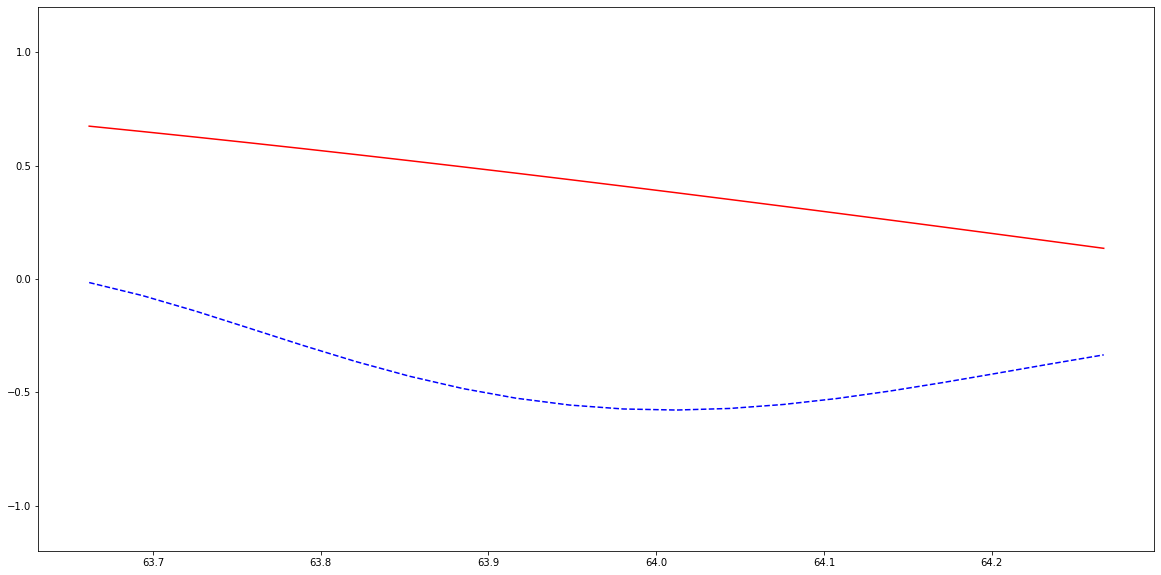

time cost: 0.030310426


In [3]:
# lstm RNN 處理regression

import numpy as np
np.random.seed(1337)  # for reproducibility
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense
from keras.optimizers import Adam

BATCH_START = 0
TIME_STEPS = 20
BATCH_SIZE = 50
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 20
LR = 0.001

def get_batch():
    global BATCH_START,TIME_STEPS
    # xs shape (50batch,20steps)
    xs = np.arange(BATCH_START,BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE,TIME_STEPS))/(10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
#     plt.plot(xs[0, :], res[0, :], 'r', xs[0, :], seq[0, :], 'b--')
#     plt.show()
    return [seq[:,:,np.newaxis],res[:,:,np.newaxis],xs]

model = Sequential()
# # build a LSTM RNN
model.add(LSTM(
    batch_input_shape = (BATCH_SIZE, TIME_STEPS ,INPUT_SIZE),
    output_dim = CELL_SIZE,
    return_sequences = True,
    stateful=True,
))
# # add output layer
model.add(TimeDistributed(Dense(OUTPUT_SIZE)))

adam =Adam(LR)
model.compile(optimizer = adam,
             loss = "mse",)

print("training~~")
for step in range(101):
    #data shape = (batch_num,steps,inputs/outputs)
    X_batch,Y_batch, xs = get_batch()
    cost = model.train_on_batch(X_batch,Y_batch)
    pred = model.predict(X_batch, BATCH_SIZE)
    plt.figure(figsize=(20,10))
    plt.plot(xs[0,:],Y_batch[0].flatten(),"r",xs[0,:], pred.flatten()[:TIME_STEPS],"b--")
    plt.ylim(-1.2,1.2)
    plt.draw()
    plt.pause(0.5)
    if step % 10 ==0:
        print("time cost:",cost)


In [3]:
import numpy as np

a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    print(y)
    return y

    
   



[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]
